In [682]:
import warnings
warnings.filterwarnings(action='ignore')

# import sys
# if 'google.colab' in sys.modules:
!pip install pdpbox
!pip install category_encoders
!pip install pandas-profiling
!pip install plotly
!pip install sklearn
!pip install eli5
!pip install shap
!pip install xgboost
!pip install scikit-learn  -U

## install Lightgbm in Mac
# pip uninstall lightgbm
# git clone --recursive https://github.com/Microsoft/LightGBM ; cd LightGBM
# export CXX=g++-8 CC=gcc-8

!pip install lightgbm
# catboost and visualization 
!pip install catboost
!pip install ipywidgets

!pip install tensorflow

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't c

In [683]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
from scipy.stats import randint, uniform

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from catboost import Pool, CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# Hyperparameter tuning & Scailing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import label_binarize # For Multiclass Roc-Auc Score 


# Tensorflow and Keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras import layers
from keras import metrics
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# save model
import pickle # The pickle API for serializing standard Python objects.
import joblib # The joblib API for efficiently serializing Python objects with NumPy arrays
%matplotlib inline

tf.random.set_seed(42)

# 0. 데이터 설명

* 18개의 특성과 타겟값으로 이루어짐

---

## <center>특성설명<center>

**특성** | **설명** | **분류**
--- | --- | ---
gender | 성별 | M or F
car | 차량 소유 여부 | Y or N
reality | 부동산 소유 여부 | Y or N
child_num | 자녀 수 | 
income_total | 연간 소득 | 
income_type | 소득 분류 | 'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'
edu_type | 교육 수준 | 'Higher education' ,'Secondary / secondary special', <br> 'Incomplete higher', 'Lower secondary', 'Academic degree'
family_type | 결혼 여부 | 'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'
house_type | 생활 방식 | 'Municipal apartment', 'House / apartment', 'With parents', <br> 'Co-op apartment', 'Rented apartment', 'Office apartment'
DAYS_BIRTH | 출생일 | 데이터 수집 당시 (0)부터 역으로 셈 <br> 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
DAYS_EMPLOYED | 업무 시작일 | 데이터 수집 당시 (0)부터 역으로 셈 <br> 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 <br> (단, 양수 값은 고용되지 않은 상태를 의미함)
FLAG_MOBIL | 핸드폰 소유 여부 | 
work_phone | 업무용 전화 소유 여부 |
phone | 전화 소유 여부 |
email | 이메일 소유 여부 |
occyp_type | 직업 유형 |											
family_size | 가족 규모 |
begin_month | 신용카드 발급 월 | 데이터 수집 당시 (0)부터 역으로 셈 <br> 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
**credit** | **사용자의 신용카드 대금 연체를 기준으로 한 신용도 (타겟값)** | 낮을 수록 높은 신용의 신용카드 사용자를 의미함
    
    
출처: https://www.dacon.io/competitions/official/235713/talkboard/402821/

# 1. 데이터 업로드

In [684]:
import os 
working_drectory = os.getcwd()

In [685]:
import pandas as pd
train = pd.read_csv(working_drectory + '/data/train.csv')
test = pd.read_csv(working_drectory + '/data/test.csv')
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [686]:
train.shape, test.shape

((26457, 20), (10000, 19))

In [687]:
# 타겟값과 특성값 분리
target = train['credit']
features = train.iloc[:,:-1]

# 결측값 확인

In [688]:
# 결측값 확인
features.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
dtype: int64

In [689]:
# 'No info'로 결측치 처리
features.fillna('No info', inplace = True)
test.fillna('No info', inplace = True)

## 필요없는 특성 처리

In [690]:
del_col = ['index', 'FLAG_MOBIL']
features.drop(del_col, axis = 1, inplace = True)
test.drop(del_col, axis = 1, inplace = True)


# 3. EDA

In [691]:
num_col = features.dtypes[features.dtypes != 'object'].index.to_list()
obj_col = features.dtypes[features.dtypes == 'object'].index.to_list()
print("숫자형 특성: {0}\n카테고리형 특성: {1}".format(num_col, obj_col))

숫자형 특성: ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']
카테고리형 특성: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


In [692]:
# 전체 특성 정보
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
dtypes: float64(3), int64(6), object(8)
memory usage: 3

## 숫자형 특성 탐색
- child_num
- income_total
- DAYS_BIRTH
- DAYS_EMPLOYED
- FLAG_MOBIL
- work_phone
- phone
- email
- family_size
- begin_month

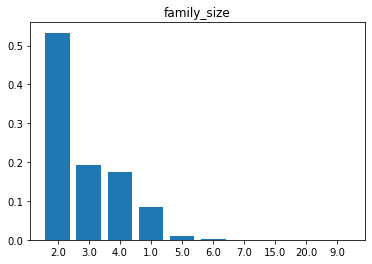

In [693]:
# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 10,
    }

 

def draw_barplot(feature_name, data):
    height = list(data[feature_name].value_counts(normalize = True))
    bars = tuple(data[feature_name].unique())
    x_pos = np.arange(len(bars))

    # Create bars
    plt.bar(x_pos, height)

    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    plt.title(feature_name)
    # Show graph
    plt.show()
draw_barplot('family_size', features)

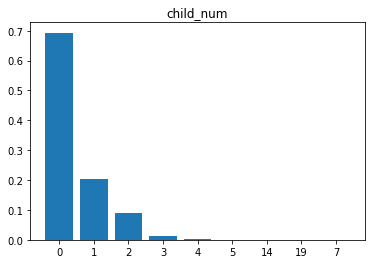

In [694]:
draw_barplot('child_num', features)

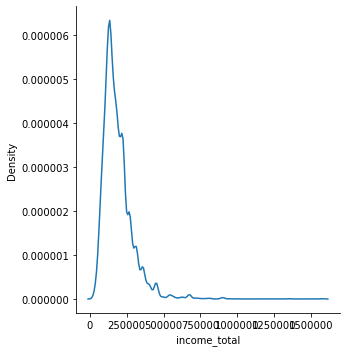

In [695]:
sns.displot(features, x = 'income_total', kind = 'kde')

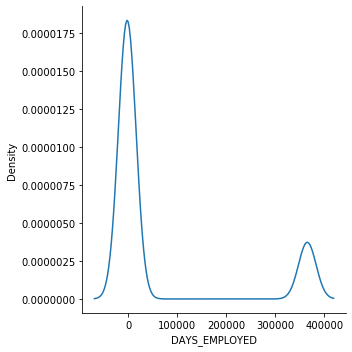

In [696]:
sns.displot(features, x = 'DAYS_EMPLOYED', kind = 'kde')

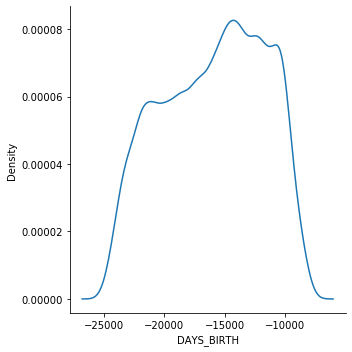

In [697]:
sns.displot(features, x = 'DAYS_BIRTH', kind = 'kde')

**요약**
- 연간 수입과 출생일은 정규분포를 따름
- 가족규모, 자녀수, 고용이후 날짜는 왼쪽으로 치우친 형태로 분포되어 있음

## 카테고리형 특성 탐색
- gender
- car
- reality
- income_type
- edu_type
- familiy_type
- house_type
- occyp_type

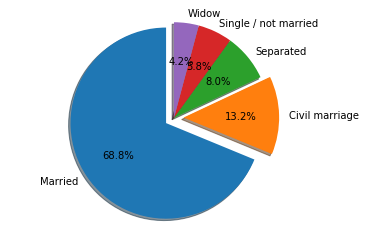

In [698]:
def draw_pitchart(feature_name, data, title_text = ''):
    labels = list(data[feature_name].unique())
    sizes = list(data[feature_name].value_counts(normalize = True))
    range_len = len(sizes)//2
    explode = [0.1 for _ in range(range_len)] + [0 for _ in range(len(sizes) - range_len)]  # only "explode" the 1st and 2nd slice

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title_text, fontdict = font_title)
    plt.show()
draw_pitchart('family_type', features, title_text = 'Family Type')

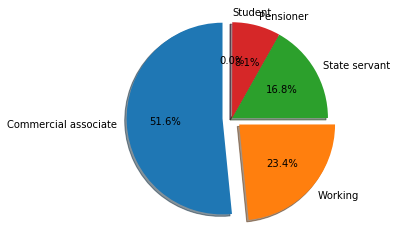

In [699]:
# features['income_type'].value_counts(normalize = True)
draw_pitchart('income_type', features, title_text = 'Income Type')

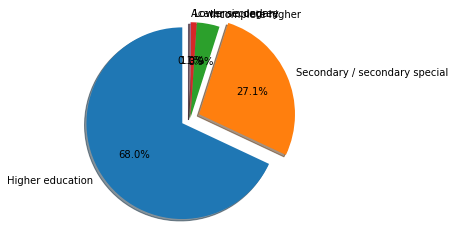

In [700]:
draw_pitchart('edu_type', features, title_text = 'Education Type')

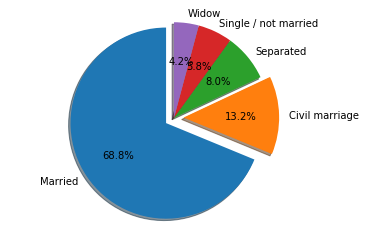

In [701]:
draw_pitchart('family_type', features, title_text = 'Family Type')

In [702]:
features['house_type'].value_counts(normalize = True) * 100

House / apartment      89.401671
With parents            4.751106
Municipal apartment     3.091809
Rented apartment        1.621499
Office apartment        0.718146
Co-op apartment         0.415769
Name: house_type, dtype: float64

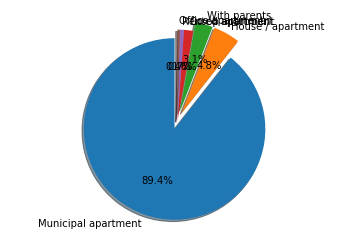

In [703]:
draw_pitchart('house_type', features, title_text = 'House Type')

In [704]:
features['occyp_type'].value_counts(normalize = True) * 100
# draw_pitchart('occyp_type', features, title_text = 'Family Type')

No info                  30.884076
Laborers                 17.054088
Core staff               10.001134
Sales staff               9.596704
Managers                  8.190649
Drivers                   5.953056
High skill tech staff     3.930907
Accountants               3.409306
Medicine staff            3.265676
Cooking staff             1.727331
Security staff            1.602600
Cleaning staff            1.523226
Private service staff     0.918471
Low-skill Laborers        0.480024
Waiters/barmen staff      0.468685
Secretaries               0.366633
Realty agents             0.238122
HR staff                  0.234343
IT staff                  0.154968
Name: occyp_type, dtype: float64

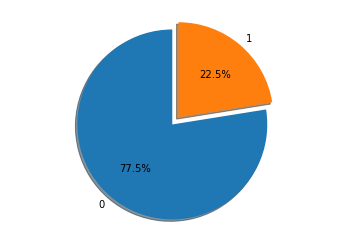

In [705]:
draw_pitchart('work_phone', features, title_text = 'If a Person Has a Work Phone')

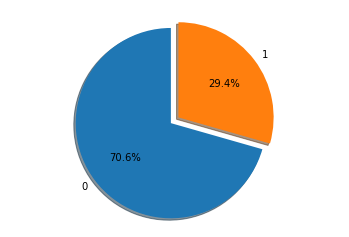

In [706]:
draw_pitchart('phone', features, title_text = 'If a Person Has a Telephone')

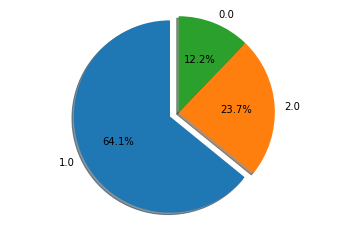

In [743]:
draw_pitchart('credit', train, title_text = 'Credit')

In [745]:
target.value_counts(normalize = True)

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64

In [707]:
phone_col = ['work_phone','phone']
features[phone_col].corr()

,work_phone,phone
work_phone,1.000000,0.310256
phone,0.310256,1.000000


# Feature Engineering

2. 수입 중 outlier 확인
3. family_size 7 이상인 사람 의심
4. income_total/family_size
5. family_size - child_num
6. 법정 최저생계비 - 1인: 1096699 2인: 1852847 3인: 2390370, 4: 2925774 5인 가구: 3454424 6인 3977162 7인 4498319
   (2021년도 기준 중위소득 및 최저생계비 보건복지부 고시 제 2020-170호)
7. family_size - child_num 이 결혼시 2인 초과일때(조부모?), 미혼시 1인 초과일때(부모?)
8. 출생일 -  고용일 : 고용전 일
9. 고용일 - 카드 가입일 : 고용 이후 가입날짜
10. 모든 시간요소에 월, 주 추가

In [708]:
# 데이터 wrangling
# ## Family type
# # 미혼 / 비혼 / 이혼 으로 큰 카테고리 필

# features['family_type'].value_counts(normalize = True)

# features['Marriage_status'] = features['family_type'].apply(lambda x: 'Marriage' if x in ['Married', 'Civil marriage'] 
#                                                   else ('Was Married' if x in ['Separated', 'Widow'] else 'Single'))

# features['Marriage_status'].value_counts(normalize = True)

# features.groupby(by = 'family_type')[['family_size', 'child_num']].median()

# # df[cond_genre].groupby(by = 'Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(legend = True)


## income_type
# student 및 비율 낮은 카테고리 조정 필


# features['income_type'].value_counts()

# round(features.groupby(by = 'income_type')['income_total'].describe()[['mean','min','max']], 2)

# # ## House / Apartment
# # # 89% 차지

# # features['reality'].value_counts()

# # features['house_type'].value_counts()

# # house_type vs reality
# features.groupby(by = ['house_type', 'reality'])['gender'].count()
# ## Occpy_type
# # 너무 많은 카테고리 - 재조정 필

# features['occyp_type'].value_counts()

# g_occyp_income = features.groupby(by = 'occyp_type').agg(['mean','min','max'])['income_total'].reset_index()
# g_occyp_income.sort_values('max', ascending=False)


## 전처리 Summary

In [709]:
def preprocess_data(df):
    # 자녀 수가 5 이상인 경우, 가족규모에서 자녀수를 빼고 자녀수 0으로 치환
    cond_child = (df['child_num'] > 5)
    df.loc[cond_child, 'family_size'] -= df.loc[cond_child,'child_num']
    df.loc[cond_child,'child_num'] = 0

    # 카드 발급날짜
    ## 음수를 양수로 전환
    df['begin_month']  = df['begin_month'].apply(lambda x: -1 * x if x < 0 else 0)
    ## 년도, 월
    df['begin_year'] = df['begin_month'].apply(lambda x: x//12)
    df['begin_month'] = np.floor( df['begin_month'] - df['begin_year']*12 )

    # 출생날짜 
    ## 음수를 양수로 전환
    df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -1 * x)
    ## 나이
    df['age'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365, 2))
    ## 년도, 월, 주
    df['Year_birth'] = np.floor(df['DAYS_BIRTH'] /365)
    df['Month_birth'] = np.floor(df['DAYS_BIRTH']/30) - np.floor(df['Year_birth']*12)
    df['Weeks_birth'] = df['DAYS_BIRTH'].apply(lambda x: x % 4)

    # 근속날짜
    ## 음수를 양수로 전환
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -1 * x if x < 0 else 0)
    ## 근속 년도, 월, 주
    df['Year_Employed'] = df['DAYS_EMPLOYED'].apply(lambda x: x//365 if x > 0 else 0)
    df['Month_Employed'] = (df['DAYS_EMPLOYED'] // 30) - (df['Year_Employed']*12 )
    df['Week_Employed'] = df['DAYS_EMPLOYED'].apply(lambda x: x % 4)

    # Before Employed (month and weeks)
    df['before_employed_months'] = df['Month_birth'] - df['Month_Employed']
    df['before_employed_weeks'] = df['Weeks_birth'] - df['Week_Employed']

    # 고용 후 발급날짜 차이
    df['diff_employed_begin_year'] = df['Year_Employed'] - df['begin_year']
    df['diff_employed_begin_month'] = df['Month_Employed'] - df['begin_month']

    # income_total 로그변환
    df['income_total'] = np.log1p(1+df['income_total'])
    
    # 부양가족 당 수입비율
    df['income_family_ratio'] = df['income_total']/df['family_size']

    # 자녀 외 부양가족 수
    df['family_w/o_child_size'] = df['family_size'] - df['child_num']
    cond = (df['family_w/o_child_size'] < 0) # 0 보다 작은 수를 0으로 치환
    df.loc[cond, 'family_w/o_child_size'] = 0

    # 결혼여부
    df['Marriage_status'] = df['family_type'].apply(lambda x: 'Marriage' if x in ['Married', 'Civil marriage'] 
                                                    else ('Was Married' if x in ['Separated', 'Widow'] else 'Single'))

    # 중복되는 사용자를 파악하기 위한 고유번호 
    ## 1. 나이 + 자녀수 + 연간수입 + 
    df['Unique_ID'] = df['occyp_type'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['car'].astype(str) + '_' + df['child_num'].astype(str) + '_' + \
    df['edu_type'].astype(str) + '_' + df['family_size'].astype(str) + '_' + \
    df['gender'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['Marriage_status'].astype(str) + '_' + df['house_type'].astype(str) + '_' + \
    df['age'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str)

    # 숫자로 대체 가능한 카테고리 특성 변환
    ## 교육수준 (숫자가 작을 수록 높은 학업)
    edu_ordinal = {'Academic degree': 1, 'Higher education': 2,'Incomplete higher': 3, 
                 'Secondary / secondary special': 4,'Lower secondary': 5}

    df['edu_type'] = df['edu_type'].apply(lambda x: edu_ordinal.get(x))
    ## gender(F = 1, M = 0), car(Y = 1, N = 0), reality(Y = 1, N = 0)
    df['gender'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)
    df['car'] = df['car'].apply(lambda x: 1 if x == 'Y' else 0)
    df['reality'] = df['reality'].apply(lambda x: 1 if x == 'Y' else 0)
    

    return df


# 모델링

In [710]:
# Test 데이터 전처리
train_pre = preprocess_data(features)
test_pre = preprocess_data(test)

## 스케일링


In [711]:
scal_col = ['income_family_ratio', 'Year_Employed','Year_birth','begin_year']
scaler = StandardScaler()
train_pre[scal_col] = scaler.fit_transform(train_pre[scal_col])
test_pre[scal_col] = scaler.transform(test_pre[scal_col])

## 인코딩

In [712]:
# 카테고리 특성 호출
obj_col = features.dtypes[features.dtypes == 'object'].index.to_list()

# 카테고리 특성 인코딩
## 인코딩 메소드 호출
encoder = TargetEncoder() 
## 인코딩 훈련 및 변환 (train, test)
train_pre[obj_col] = encoder.fit_transform(train_pre[obj_col], target) 
test_pre[obj_col] = encoder.transform(test_pre[obj_col])

# train, test 분리하기
X_train, X_val, y_train, y_val = train_test_split(train_pre, target, test_size = 0.2, stratify = target)
X_train.shape, y_train.shape

X_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,Month_Employed,Week_Employed,before_employed_months,before_employed_weeks,diff_employed_begin_year,diff_employed_begin_month,income_family_ratio,family_w/o_child_size,Marriage_status,Unique_ID
15362,1,1,1,0,12.419174,1.531119,4,1.529237,1.521625,16098,...,4,1,4.0,1,9.0,-6.0,-0.105423,2.0,1.523549,1.870790
24778,0,1,0,0,12.660334,1.514474,2,1.529237,1.521625,15825,...,4,0,7.0,1,10.0,-3.0,-0.063952,2.0,1.523549,1.977215
7819,1,0,1,0,11.967193,1.515397,4,1.529237,1.521625,22742,...,0,0,14.0,2,-1.0,-2.0,-0.183146,2.0,1.523549,0.812942
12565,1,0,1,0,12.586227,1.514474,2,1.501144,1.521625,17388,...,7,2,8.0,-2,4.0,2.0,2.087658,1.0,1.501144,1.402150
23109,1,1,0,1,11.407587,1.526927,4,1.529237,1.535452,13891,...,8,0,-1.0,3,19.0,2.0,-0.933268,2.0,1.523549,1.444470


# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Chi-Squared Test
fs = SelectKBest(score_func = chi2, k = 'all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)

In [ ]:
fs_df = pd.DataFrame(data= fs.scores_, index = [X_train.columns], columns = ['Feature_Importance'])
fs_df.sort_values(by=['Feature_Importance'], ascending = False)

# for i in range(len(fs.scores_)):    
#     print('%s: %f' % (X_train.columns[i], fs.scores_[i]))
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

In [ ]:
fs_df2 = fs_df.loc[fs_df['Feature_Importance'] > 5, ].reset_index()
import_features = list(fs_df2['level_0'])
import_features

In [191]:
train_pre.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,Year_Employed,Month_Employed,Week_Employed,before_employed_months,before_employed_weeks,diff_employed_begin_year,diff_employed_begin_month,income_family_ratio,family_w/o_child_size,Unique_ID
0,1,0,0,0,12.218505,Commercial associate,2,Married,Municipal apartment,13899,...,12,12,1,-5.0,2,12.0,6.0,-0.139930,2.0,No info_Commercial associate_N_0_Higher educat...
1,1,0,1,1,12.419174,Commercial associate,4,Civil marriage,House / apartment,11380,...,4,3,0,4.0,0,4.0,-2.0,-0.817298,2.0,Laborers_Commercial associate_N_1_Secondary / ...
2,0,1,1,0,13.017007,Working,2,Married,House / apartment,19087,...,12,3,2,9.0,1,11.0,-7.0,-0.002618,2.0,Managers_Working_Y_0_Higher education_2.0_M_13...
3,1,0,1,0,12.218505,Commercial associate,4,Married,House / apartment,15088,...,5,9,0,1.0,0,2.0,8.0,-0.139930,2.0,Sales staff_Commercial associate_N_0_Secondary...
4,1,1,1,0,11.967193,State servant,2,Married,House / apartment,15037,...,5,10,1,-1.0,0,3.0,8.0,-0.183146,2.0,Managers_State servant_Y_0_Higher education_2....


## Logistic Regression


In [717]:
# Logistic 모델 메소드 호출 및 훈련
## newton-cg L2 패널티
mod_logistic = LogisticRegressionCV(random_state = 42, cv = 5, multi_class = 'multinomial')
mod_logistic.fit(X_train, y_train)  

# prediction
y_pred_val = mod_logistic.predict(X_val)
y_pred_train = mod_logistic.predict(X_train)

# 다중클래스 roc_auc_score 구하기 전 사전 작업
## 라벨링 
labels = [0,1,2]
# Binarize ytest with shape (n_samples, n_classes)
## prediction
y_pred_val_logistic = label_binarize(y_pred_val, classes=labels)
y_pred_train_logistic = label_binarize(y_pred_train, classes=labels)
## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)


# Unlike 'ovr', 'ovo' is insensitive to class imbalance
logistic_score_train = roc_auc_score(y_pred_train_logistic, y_train_binarize, average='macro',multi_class='ovo')
logistic_score_val = roc_auc_score(y_pred_val_logistic, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", logistic_score_train)
print("Validation:", logistic_score_val)


------------------------------------------------
------Roc-Auc Curve-----
Train: 0.7691105041400831
Validation: 0.7726843029219097


## Random Forest

In [718]:
pipe_rf = make_pipeline(
                        RandomForestClassifier(n_estimators = 500, class_weight='balanced')
                        )

param_dict = {
    "randomforestclassifier__max_depth": randint(10, 50),
    'randomforestclassifier__max_features': uniform(0,1),
    'randomforestclassifier__min_samples_split': randint(10, 50),
    'randomforestclassifier__min_samples_leaf': randint(10, 50),
}
            
random_grid_rf = RandomizedSearchCV(pipe_rf,
                                 param_distributions = param_dict,
                                 n_iter = 100,
                                 scoring = 'roc_auc_ovo',
                                 random_state = 42,
                                 cv = 3,
                                 verbose = 1,
                                 n_jobs = -1
                                 )
random_grid_rf.fit(X_train, y_train)
print("Best parameter:",random_grid_rf.best_params_)
print('Roc-Auc Curve: ', random_grid_rf.best_score_)

# ---------------------------scoring -------------------------#

# The best Random Forest Model
best_rf = random_grid_rf.best_estimator_

# ROC-AUC Curve / ROC Curve
y_pred_val_rf = best_rf.predict(X_val)
y_pred_train_rf = best_rf.predict(X_train)

## binarize for multiclasses
y_pred_val_rf_binarize = label_binarize(y_pred_val_rf,  classes = labels)
y_pred_train_rf_binarize = label_binarize(y_pred_train_rf, classes = labels)

## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)


rf_score_train = roc_auc_score(y_pred_train_rf, y_train_binarize, average='macro',multi_class='ovo')
rf_score_val = roc_auc_score(y_pred_val_rf_binarize, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", rf_score_train)
print("Validation:", rf_score_val)



Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameter: {'randomforestclassifier__max_depth': 48, 'randomforestclassifier__max_features': 0.906828441545754, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__min_samples_split': 36}

Roc-Auc Curve:  0.8548107056079096

------Roc-Auc Curve-----

Train: 0.8089594619338359

Validation: 0.7336512526845212

In [719]:
# Best Random Forest Model
best_rf = RandomForestClassifier(n_estimators = 500, class_weight='balanced',
                                     max_depth =  48, max_features = 0.9068, 
                                     min_samples_leaf= 10, min_samples_split= 36)
# Fit the model
best_rf.fit(X_train, y_train)
# Prediction
y_pred_val_rf = best_rf.predict(X_val)
y_pred_train_rf = best_rf.predict(X_train)
y_pred_train_rf

array([2., 2., 0., ..., 0., 0., 2.])

## XGBoost


In [720]:
from xgboost import XGBClassifier
pipe_xgb = make_pipeline(
                        XGBClassifier(objective = 'multi:softmax', 
                                      n_estimators = 500,
                                      seed = 42,
                                      eval_metric = 'mlogloss')
                        )

param_dict = {
    "xgbclassifier__max_depth": randint(1,10),
    'xgbclassifier__min_child_weight': randint(10, 20),
    'xgbclassifier__gamma': uniform(0,1),
    'xgbclassifier__subsample': [0.5,0.6,0.7,0.8,0.9],
    'xgbclassifier__colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
    'xgbclassifier__learning_rate': [0.05,0.06,0.07,0.08,0.09,0.1]
}
            
random_grid_xgb = RandomizedSearchCV(pipe_xgb,
                                 param_distributions = param_dict,
                                 n_iter = 200,
                                 scoring = 'roc_auc_ovo',
                                 random_state = 42,
                                 cv = 3,
                                 verbose = 1,
                                 n_jobs = -1
                                 )
random_grid_xgb.fit(X_train, y_train)
print("Best parameter:",random_grid_xgb.best_params_)
print('Roc-Auc Curve: ', random_grid_xgb.best_score_)

# ---------------------------scoring -------------------------#

# The best Random Forest Model
best_xgb = random_grid_xgb.best_estimator_

# ROC-AUC Curve / ROC Curve
y_pred_val_xgb = best_xgb.predict(X_val)
y_pred_train_xgb = best_xgb.predict(X_train)

## binarize for multiclasses
y_pred_val_xgb_binarize = label_binarize(y_pred_val_xgb, classes = labels)
y_pred_train_xgb_binarize = label_binarize(y_pred_train_xgb, classes = labels)


## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)

# Input binarized both prediction and true values
xgb_score_train = roc_auc_score(y_pred_train_xgb_binarize, y_train_binarize, average='macro',multi_class='ovo')
xgb_score_val = roc_auc_score(y_pred_val_xgb_binarize, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", xgb_score_train)
print("Validation:", xgb_score_val)


- best result 

Fitting 3 folds for each of 200 candidates, totalling 600 fits

Best parameter: {'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 0.37772888617629485, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 18, 'xgbclassifier__subsample': 0.9}

Roc-Auc Curve:  0.8451775905260931

------Roc-Auc Curve-----

Train: 0.8233626446548897

Validation: 0.7899040586521631


In [721]:
from xgboost import XGBClassifier
# Best XGBoost
best_xgb = XGBClassifier(objective = 'multi:softmax', n_estimators = 500,
                         seed = 42,eval_metric = 'mlogloss',
                         colsample_bytree = 0.5, gamma = 0.3777, learning_rate = 0.05,
                         max_depth = 4, min_child_weight = 18, subsample = 0.9)

# Fit the model
best_xgb.fit(X_train, y_train)
# prediction
y_pred_val_xgb = best_xgb.predict(X_val)
y_pred_train_xgb = best_xgb.predict(X_train)
y_pred_train_xgb

array([2., 2., 0., ..., 0., 1., 2.])

## LightGBM

In [722]:
from lightgbm import LGBMClassifier
pipe_lgbm = make_pipeline(
                        LGBMClassifier(random_state=42, 
                                       silent=True, 
                                       metric='multi_logloss',
                                       objective= 'multiclass',
                                       n_jobs=-1, 
                                       n_estimators=500)
                        )



 

parameters ={'lgbmclassifier__num_leaves': randint(6, 50), 
             'lgbmclassifier__min_child_samples': randint(100, 500), 
             'lgbmclassifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgbmclassifier__subsample': uniform(loc=0.2, scale=0.8), 
             'lgbmclassifier__colsample_bytree': uniform(loc=0.4, scale=0.6),
             'lgbmclassifier__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'lgbmclassifier__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'lgbmclassifier__learning_rate': [0.05,0.06,0.07,0.08,0.09,0.1]
            }



random_grid_lgbm = RandomizedSearchCV(pipe_lgbm,
                                 param_distributions = parameters,
                                 n_iter = 200,
                                 scoring = 'roc_auc_ovo',
                                 random_state = 42,
                                 cv = 3,
                                 verbose = 1,
                                 n_jobs = -1,  
                                 )


random_grid_lgbm.fit(X_train, y_train)
print("Best parameter:",random_grid_lgbm.best_params_)
print('Roc-Auc Curve: ', random_grid_lgbm.best_score_)
# The best Random Forest Model
best_lgbm = random_grid_lgbm.best_estimator_

# ROC-AUC Curve / ROC Curve
y_pred_val_lgbm = best_lgbm.predict(X_val)
y_pred_train_lgbm = best_lgbm.predict(X_train)


## binarize for multiclasses
y_pred_val_lgbm_binarize = label_binarize(y_pred_val_lgbm, classes = labels)
y_pred_train_lgbm_binarize = label_binarize(y_pred_train_lgbm, classes = labels)


## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)


lgbm_score_train = roc_auc_score(y_pred_train_lgbm_binarize, y_train_binarize, average='macro',multi_class='ovo')
lgbm_score_val = roc_auc_score(y_pred_val_lgbm_binarize, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", lgbm_score_train)
print("Validation:", lgbm_score_val)



- best result

Fitting 3 folds for each of 200 candidates, totalling 600 fits

Best parameter: {'lgbmclassifier__colsample_bytree': 0.5174746808735778, 'lgbmclassifier__learning_rate': 0.09, 'lgbmclassifier__min_child_samples': 111, 'lgbmclassifier__min_child_weight': 0.001, 'lgbmclassifier__num_leaves': 40, 'lgbmclassifier__reg_alpha': 10, 'lgbmclassifier__reg_lambda': 0, 'lgbmclassifier__subsample': 0.7245781083045937}

Roc-Auc Curve:  0.8475192164863617

------Roc-Auc Curve-----

Train: 0.8286943386897354

Validation: 0.7903070386851737

In [723]:
from lightgbm import LGBMClassifier
best_lgbm = LGBMClassifier(random_state=42, silent=True, 
                           metric='multi_logloss', objective= 'multiclass',
                           n_jobs=-1, n_estimators=500,
                           colsample_bytree=0.5175, learning_rate = 0.09,
                           min_child_samples= 111, min_child_weight= 0.001,
                           num_leaves = 40, reg_alpha=10, reg_lambda=0,subsample = 0.7246)
# Fit the model
best_lgbm.fit(X_train, y_train)
#Prediction
y_pred_val_lgbm = best_lgbm.predict(X_val)
y_pred_train_lgbm = best_lgbm.predict(X_train)
y_pred_train_lgbm

array([2., 2., 0., ..., 0., 1., 2.])

## CatBoost

In [724]:
from catboost import Pool, CatBoostClassifier

pipe_cb = make_pipeline(
                        CatBoostClassifier(
                                      iterations = 500,
                                      random_seed = 42,
                                      l2_leaf_reg = 1,
                                      eval_metric = 'MultiClass')
                        )

param_dict = {
    "catboostclassifier__learning_rate": [0.1, 0.05, 0.03, 0.01],
    'catboostclassifier__max_depth': randint(1, 16),
    'catboostclassifier__rsm': uniform(loc=0.2, scale=0.8),
    'catboostclassifier__ignored_features': randint(1,5)
}
            
random_grid_cb = RandomizedSearchCV(pipe_cb,
                                 param_distributions = param_dict,
                                 n_iter = 50,
                                 scoring = 'roc_auc_ovo',
                                 random_state = 42,
                                 cv = 3,
                                 verbose = 1,
                                 n_jobs = -1
                                 )
random_grid_cb.fit(X_train, y_train)
print("Best parameter:",random_grid_cb.best_params_)
print('Roc-Auc Curve: ', random_grid_cb.best_score_)

# ---------------------------scoring -------------------------#

# The best Random Forest Model
best_cb = random_grid_cb.best_estimator_

# ROC-AUC Curve / ROC Curve
y_pred_val_cb = best_cb.predict(X_val)
y_pred_train_cb = best_cb.predict(X_train)

## binarize for multiclasses
y_pred_val_cb_binarize = label_binarize(y_pred_val_cb, classes = labels)
y_pred_train_cb_binarize = label_binarize(y_pred_train_cb, classes = labels)


## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)

# Input binarized both prediction and true values
cb_score_train = roc_auc_score(y_pred_train_cb_binarize, y_train_binarize, average='macro',multi_class='ovo')
cb_score_val = roc_auc_score(y_pred_val_cb_binarize, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", cb_score_train)
print("Validation:", cb_score_val)



Best parameter: {'catboostclassifier__ignored_features': 4, 'catboostclassifier__learning_rate': 0.1, 'catboostclassifier__max_depth': 3, 'catboostclassifier__rsm': 0.6730382301661817}

Roc-Auc Curve:  0.844780026616883

------Roc-Auc Curve-----

Train: 0.811514259071978

Validation: 0.7915215455824257


In [725]:

best_cb = CatBoostClassifier(iterations = 500,random_seed = 42,
                   l2_leaf_reg = 1,eval_metric = 'MultiClass',
                   ignored_features=4, learning_rate = 0.1,
                   max_depth=3, rsm = 0.673)
# Fit the model
best_cb.fit(X_train, y_train)
#Prediction
y_pred_val_cb = best_cb.predict(X_val)
y_pred_train_cb = best_cb.predict(X_train)
y_pred_train_cb.reshape(1,-1)[0]       

0:	learn: 1.0141912	total: 12.4ms	remaining: 6.2s
1:	learn: 0.9692647	total: 19.6ms	remaining: 4.88s
2:	learn: 0.9178963	total: 26ms	remaining: 4.31s
3:	learn: 0.8703759	total: 32.6ms	remaining: 4.04s
4:	learn: 0.8330862	total: 40.3ms	remaining: 3.99s
5:	learn: 0.8086464	total: 47.1ms	remaining: 3.88s
6:	learn: 0.7832432	total: 55.2ms	remaining: 3.89s
7:	learn: 0.7577230	total: 63.4ms	remaining: 3.9s
8:	learn: 0.7368452	total: 70.3ms	remaining: 3.83s
9:	learn: 0.7226078	total: 75.9ms	remaining: 3.72s
10:	learn: 0.7042475	total: 81.2ms	remaining: 3.61s
11:	learn: 0.6897621	total: 87.2ms	remaining: 3.54s
12:	learn: 0.6785902	total: 92.6ms	remaining: 3.47s
13:	learn: 0.6685463	total: 98.1ms	remaining: 3.4s
14:	learn: 0.6579522	total: 104ms	remaining: 3.37s
15:	learn: 0.6477426	total: 109ms	remaining: 3.3s
16:	learn: 0.6393966	total: 115ms	remaining: 3.27s
17:	learn: 0.6318247	total: 127ms	remaining: 3.41s
18:	learn: 0.6253916	total: 135ms	remaining: 3.41s
19:	learn: 0.6203733	total: 141ms

176:	learn: 0.5407163	total: 980ms	remaining: 1.79s
177:	learn: 0.5405865	total: 985ms	remaining: 1.78s
178:	learn: 0.5405279	total: 990ms	remaining: 1.77s
179:	learn: 0.5404587	total: 995ms	remaining: 1.77s
180:	learn: 0.5404348	total: 1s	remaining: 1.76s
181:	learn: 0.5404120	total: 1.01s	remaining: 1.76s
182:	learn: 0.5403422	total: 1.01s	remaining: 1.75s
183:	learn: 0.5402621	total: 1.02s	remaining: 1.75s
184:	learn: 0.5400617	total: 1.02s	remaining: 1.74s
185:	learn: 0.5399399	total: 1.03s	remaining: 1.73s
186:	learn: 0.5398826	total: 1.03s	remaining: 1.73s
187:	learn: 0.5393147	total: 1.04s	remaining: 1.72s
188:	learn: 0.5392536	total: 1.04s	remaining: 1.71s
189:	learn: 0.5391681	total: 1.05s	remaining: 1.71s
190:	learn: 0.5390551	total: 1.05s	remaining: 1.7s
191:	learn: 0.5389763	total: 1.06s	remaining: 1.7s
192:	learn: 0.5388425	total: 1.06s	remaining: 1.69s
193:	learn: 0.5388157	total: 1.07s	remaining: 1.69s
194:	learn: 0.5387775	total: 1.07s	remaining: 1.68s
195:	learn: 0.538

366:	learn: 0.5260748	total: 1.97s	remaining: 714ms
367:	learn: 0.5260403	total: 1.97s	remaining: 708ms
368:	learn: 0.5260077	total: 1.98s	remaining: 703ms
369:	learn: 0.5259803	total: 1.99s	remaining: 698ms
370:	learn: 0.5259500	total: 1.99s	remaining: 692ms
371:	learn: 0.5259224	total: 2s	remaining: 687ms
372:	learn: 0.5258950	total: 2s	remaining: 682ms
373:	learn: 0.5258576	total: 2.01s	remaining: 676ms
374:	learn: 0.5257921	total: 2.01s	remaining: 671ms
375:	learn: 0.5257325	total: 2.02s	remaining: 665ms
376:	learn: 0.5257112	total: 2.02s	remaining: 660ms
377:	learn: 0.5256601	total: 2.03s	remaining: 654ms
378:	learn: 0.5256166	total: 2.03s	remaining: 649ms
379:	learn: 0.5255954	total: 2.04s	remaining: 644ms
380:	learn: 0.5255758	total: 2.04s	remaining: 638ms
381:	learn: 0.5254383	total: 2.05s	remaining: 633ms
382:	learn: 0.5253876	total: 2.05s	remaining: 627ms
383:	learn: 0.5253260	total: 2.06s	remaining: 621ms
384:	learn: 0.5252693	total: 2.06s	remaining: 616ms
385:	learn: 0.5252

array([2., 2., 0., ..., 0., 1., 2.])

## Stacking Ensemble


In [726]:
# 기본모델에서 얻은 예측값을 새로운 데이터로 변환
def get_models():
  models = dict()
  models['logistic'] = mod_logistic
  models['rf'] = best_rf
  models['xgb'] = best_xgb
  models['lgbm'] = best_lgbm
  models['cb'] = best_cb
  return models

def eval_model(model, x, y):
  cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
  scores = cross_val_score(model, x, y, scoring = 'neg_log_loss', cv = cv, n_jobs = -1, error_score='raise')
  return scores

# Get all the best models
models = get_models()
# Evaluate models 
results, names = list(), list()
for name, model in models.items():
  scores = eval_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance
plt.boxplot(results, lables = names, showmeans = True)
plt.show()



### CatBoost as Final estimator

In [732]:

# base models
layer0 = list()
layer0.append( ('logistic', mod_logistic) )
layer0.append( ('ft', best_rf) )
layer0.append( ('xgb', best_xgb) )
layer0.append( ('lgbm', best_lgbm) )
layer0.append( ('catboost', best_cb) )
# Final model (lgbm)
layer1 = CatBoostClassifier(iterations = 500, random_seed = 42,
                   l2_leaf_reg = 1, eval_metric = 'MultiClass')

# Stacking ensemble
stacking_mod = StackingClassifier(estimators = layer0, 
                                  final_estimator = layer1,
                                  cv = 5)
# Training
stacking_mod.fit(X_train, y_train)
stacking_mod.score(X_val, y_val)

# ROC-AUC Curve / ROC Curve
y_pred_val_stack = stacking_mod.predict(X_val)
y_pred_train_stack = stacking_mod.predict(X_train)


## binarize for multiclasses
y_pred_val_stack_binarize = label_binarize(y_pred_val_stack, classes = labels)
y_pred_train_stack_binarize = label_binarize(y_pred_train_stack, classes = labels)


## true value
y_val_binarize = label_binarize(y_val, classes = labels)
y_train_binarize = label_binarize(y_train, classes = labels)


stack_score_train = roc_auc_score(y_pred_train_stack_binarize, y_train_binarize, average='macro',multi_class='ovo')
stack_score_val = roc_auc_score(y_pred_val_stack_binarize, y_val_binarize, average='macro',multi_class='ovo')

print("------------------------------------------------")
print("------Roc-Auc Curve-----")
print("Train:", stack_score_train)
print("Validation:", stack_score_val)


0:	learn: 1.0141912	total: 26.8ms	remaining: 13.4s
1:	learn: 0.9692647	total: 36.2ms	remaining: 9.01s
2:	learn: 0.9178963	total: 42ms	remaining: 6.96s
3:	learn: 0.8703759	total: 53.3ms	remaining: 6.61s
4:	learn: 0.8330862	total: 61.1ms	remaining: 6.05s
5:	learn: 0.8086464	total: 68.2ms	remaining: 5.61s
6:	learn: 0.7832432	total: 77.5ms	remaining: 5.46s
7:	learn: 0.7577230	total: 84.3ms	remaining: 5.18s
8:	learn: 0.7368452	total: 91.2ms	remaining: 4.98s
9:	learn: 0.7226078	total: 97.6ms	remaining: 4.78s
10:	learn: 0.7042475	total: 105ms	remaining: 4.68s
11:	learn: 0.6897621	total: 111ms	remaining: 4.52s
12:	learn: 0.6785902	total: 118ms	remaining: 4.41s
13:	learn: 0.6685463	total: 125ms	remaining: 4.33s
14:	learn: 0.6579522	total: 130ms	remaining: 4.19s
15:	learn: 0.6477426	total: 135ms	remaining: 4.08s
16:	learn: 0.6393966	total: 141ms	remaining: 4s
17:	learn: 0.6318247	total: 146ms	remaining: 3.92s
18:	learn: 0.6253916	total: 153ms	remaining: 3.87s
19:	learn: 0.6203733	total: 159ms	re

184:	learn: 0.5400617	total: 1.22s	remaining: 2.07s
185:	learn: 0.5399399	total: 1.22s	remaining: 2.06s
186:	learn: 0.5398826	total: 1.23s	remaining: 2.06s
187:	learn: 0.5393147	total: 1.24s	remaining: 2.05s
188:	learn: 0.5392536	total: 1.24s	remaining: 2.05s
189:	learn: 0.5391681	total: 1.25s	remaining: 2.04s
190:	learn: 0.5390551	total: 1.26s	remaining: 2.03s
191:	learn: 0.5389763	total: 1.26s	remaining: 2.02s
192:	learn: 0.5388425	total: 1.27s	remaining: 2.02s
193:	learn: 0.5388157	total: 1.27s	remaining: 2.01s
194:	learn: 0.5387775	total: 1.28s	remaining: 2s
195:	learn: 0.5385233	total: 1.28s	remaining: 1.99s
196:	learn: 0.5384140	total: 1.29s	remaining: 1.98s
197:	learn: 0.5383634	total: 1.3s	remaining: 1.98s
198:	learn: 0.5382690	total: 1.3s	remaining: 1.97s
199:	learn: 0.5381696	total: 1.31s	remaining: 1.96s
200:	learn: 0.5381031	total: 1.31s	remaining: 1.95s
201:	learn: 0.5380426	total: 1.32s	remaining: 1.95s
202:	learn: 0.5379793	total: 1.32s	remaining: 1.94s
203:	learn: 0.537

350:	learn: 0.5270446	total: 2.21s	remaining: 939ms
351:	learn: 0.5269922	total: 2.22s	remaining: 933ms
352:	learn: 0.5269014	total: 2.22s	remaining: 926ms
353:	learn: 0.5268626	total: 2.23s	remaining: 920ms
354:	learn: 0.5267921	total: 2.24s	remaining: 914ms
355:	learn: 0.5267395	total: 2.24s	remaining: 907ms
356:	learn: 0.5267165	total: 2.25s	remaining: 901ms
357:	learn: 0.5266488	total: 2.25s	remaining: 894ms
358:	learn: 0.5264881	total: 2.26s	remaining: 888ms
359:	learn: 0.5264523	total: 2.27s	remaining: 881ms
360:	learn: 0.5264192	total: 2.27s	remaining: 874ms
361:	learn: 0.5263442	total: 2.28s	remaining: 868ms
362:	learn: 0.5263024	total: 2.28s	remaining: 861ms
363:	learn: 0.5262428	total: 2.29s	remaining: 855ms
364:	learn: 0.5261562	total: 2.29s	remaining: 848ms
365:	learn: 0.5261299	total: 2.3s	remaining: 842ms
366:	learn: 0.5260748	total: 2.3s	remaining: 835ms
367:	learn: 0.5260403	total: 2.31s	remaining: 829ms
368:	learn: 0.5260077	total: 2.31s	remaining: 822ms
369:	learn: 0.

31:	learn: 0.5816337	total: 225ms	remaining: 3.29s
32:	learn: 0.5803087	total: 231ms	remaining: 3.26s
33:	learn: 0.5791993	total: 237ms	remaining: 3.25s
34:	learn: 0.5780168	total: 244ms	remaining: 3.24s
35:	learn: 0.5764864	total: 249ms	remaining: 3.21s
36:	learn: 0.5750866	total: 257ms	remaining: 3.21s
37:	learn: 0.5742063	total: 264ms	remaining: 3.21s
38:	learn: 0.5725476	total: 270ms	remaining: 3.19s
39:	learn: 0.5719492	total: 276ms	remaining: 3.17s
40:	learn: 0.5708360	total: 282ms	remaining: 3.16s
41:	learn: 0.5704911	total: 289ms	remaining: 3.15s
42:	learn: 0.5701126	total: 295ms	remaining: 3.13s
43:	learn: 0.5686661	total: 301ms	remaining: 3.12s
44:	learn: 0.5671279	total: 306ms	remaining: 3.1s
45:	learn: 0.5660470	total: 312ms	remaining: 3.08s
46:	learn: 0.5653187	total: 318ms	remaining: 3.06s
47:	learn: 0.5642652	total: 324ms	remaining: 3.05s
48:	learn: 0.5642072	total: 330ms	remaining: 3.04s
49:	learn: 0.5639867	total: 340ms	remaining: 3.06s
50:	learn: 0.5637251	total: 346m

203:	learn: 0.5366414	total: 1.76s	remaining: 2.56s
204:	learn: 0.5366011	total: 1.77s	remaining: 2.55s
205:	learn: 0.5365005	total: 1.78s	remaining: 2.54s
206:	learn: 0.5364235	total: 1.79s	remaining: 2.54s
207:	learn: 0.5363751	total: 1.8s	remaining: 2.53s
208:	learn: 0.5361956	total: 1.81s	remaining: 2.52s
209:	learn: 0.5360415	total: 1.82s	remaining: 2.51s
210:	learn: 0.5359694	total: 1.83s	remaining: 2.5s
211:	learn: 0.5359485	total: 1.84s	remaining: 2.49s
212:	learn: 0.5357909	total: 1.85s	remaining: 2.49s
213:	learn: 0.5356793	total: 1.85s	remaining: 2.48s
214:	learn: 0.5356397	total: 1.86s	remaining: 2.47s
215:	learn: 0.5355603	total: 1.87s	remaining: 2.46s
216:	learn: 0.5354484	total: 1.88s	remaining: 2.45s
217:	learn: 0.5354098	total: 1.89s	remaining: 2.44s
218:	learn: 0.5353855	total: 1.9s	remaining: 2.43s
219:	learn: 0.5353057	total: 1.91s	remaining: 2.42s
220:	learn: 0.5352280	total: 1.91s	remaining: 2.42s
221:	learn: 0.5352075	total: 1.92s	remaining: 2.41s
222:	learn: 0.5

366:	learn: 0.5246447	total: 2.75s	remaining: 996ms
367:	learn: 0.5245612	total: 2.75s	remaining: 988ms
368:	learn: 0.5245215	total: 2.76s	remaining: 980ms
369:	learn: 0.5239893	total: 2.76s	remaining: 971ms
370:	learn: 0.5239003	total: 2.77s	remaining: 964ms
371:	learn: 0.5238238	total: 2.78s	remaining: 956ms
372:	learn: 0.5237416	total: 2.78s	remaining: 948ms
373:	learn: 0.5236752	total: 2.79s	remaining: 940ms
374:	learn: 0.5236193	total: 2.79s	remaining: 932ms
375:	learn: 0.5235280	total: 2.8s	remaining: 923ms
376:	learn: 0.5234988	total: 2.81s	remaining: 916ms
377:	learn: 0.5234042	total: 2.81s	remaining: 907ms
378:	learn: 0.5233636	total: 2.82s	remaining: 900ms
379:	learn: 0.5232763	total: 2.82s	remaining: 892ms
380:	learn: 0.5232276	total: 2.83s	remaining: 883ms
381:	learn: 0.5231666	total: 2.83s	remaining: 875ms
382:	learn: 0.5231277	total: 2.84s	remaining: 867ms
383:	learn: 0.5230387	total: 2.84s	remaining: 859ms
384:	learn: 0.5230135	total: 2.85s	remaining: 851ms
385:	learn: 0

39:	learn: 0.5725371	total: 204ms	remaining: 2.35s
40:	learn: 0.5714104	total: 210ms	remaining: 2.36s
41:	learn: 0.5712612	total: 218ms	remaining: 2.38s
42:	learn: 0.5699796	total: 225ms	remaining: 2.39s
43:	learn: 0.5688378	total: 232ms	remaining: 2.4s
44:	learn: 0.5676644	total: 239ms	remaining: 2.41s
45:	learn: 0.5668898	total: 245ms	remaining: 2.41s
46:	learn: 0.5660729	total: 252ms	remaining: 2.43s
47:	learn: 0.5658453	total: 257ms	remaining: 2.42s
48:	learn: 0.5657723	total: 263ms	remaining: 2.42s
49:	learn: 0.5648360	total: 269ms	remaining: 2.42s
50:	learn: 0.5647277	total: 275ms	remaining: 2.42s
51:	learn: 0.5643938	total: 281ms	remaining: 2.42s
52:	learn: 0.5642426	total: 287ms	remaining: 2.42s
53:	learn: 0.5633479	total: 291ms	remaining: 2.41s
54:	learn: 0.5630952	total: 298ms	remaining: 2.41s
55:	learn: 0.5628666	total: 303ms	remaining: 2.4s
56:	learn: 0.5620431	total: 308ms	remaining: 2.4s
57:	learn: 0.5619497	total: 314ms	remaining: 2.39s
58:	learn: 0.5614932	total: 319ms	

211:	learn: 0.5369994	total: 1.19s	remaining: 1.62s
212:	learn: 0.5369301	total: 1.2s	remaining: 1.61s
213:	learn: 0.5364464	total: 1.2s	remaining: 1.61s
214:	learn: 0.5363734	total: 1.21s	remaining: 1.6s
215:	learn: 0.5363009	total: 1.22s	remaining: 1.6s
216:	learn: 0.5362180	total: 1.22s	remaining: 1.59s
217:	learn: 0.5361833	total: 1.23s	remaining: 1.59s
218:	learn: 0.5361439	total: 1.23s	remaining: 1.58s
219:	learn: 0.5361109	total: 1.24s	remaining: 1.58s
220:	learn: 0.5359580	total: 1.24s	remaining: 1.57s
221:	learn: 0.5359084	total: 1.25s	remaining: 1.56s
222:	learn: 0.5358542	total: 1.25s	remaining: 1.56s
223:	learn: 0.5357836	total: 1.26s	remaining: 1.55s
224:	learn: 0.5356996	total: 1.27s	remaining: 1.55s
225:	learn: 0.5355736	total: 1.27s	remaining: 1.54s
226:	learn: 0.5355376	total: 1.28s	remaining: 1.54s
227:	learn: 0.5354739	total: 1.28s	remaining: 1.53s
228:	learn: 0.5354366	total: 1.29s	remaining: 1.53s
229:	learn: 0.5354032	total: 1.3s	remaining: 1.52s
230:	learn: 0.535

393:	learn: 0.5230544	total: 2.17s	remaining: 585ms
394:	learn: 0.5229907	total: 2.18s	remaining: 579ms
395:	learn: 0.5229623	total: 2.18s	remaining: 574ms
396:	learn: 0.5228790	total: 2.19s	remaining: 568ms
397:	learn: 0.5228472	total: 2.19s	remaining: 563ms
398:	learn: 0.5228072	total: 2.2s	remaining: 557ms
399:	learn: 0.5227623	total: 2.21s	remaining: 552ms
400:	learn: 0.5227354	total: 2.21s	remaining: 546ms
401:	learn: 0.5226444	total: 2.22s	remaining: 541ms
402:	learn: 0.5225544	total: 2.22s	remaining: 535ms
403:	learn: 0.5224928	total: 2.23s	remaining: 530ms
404:	learn: 0.5224822	total: 2.23s	remaining: 524ms
405:	learn: 0.5224402	total: 2.24s	remaining: 519ms
406:	learn: 0.5224118	total: 2.25s	remaining: 513ms
407:	learn: 0.5223460	total: 2.25s	remaining: 508ms
408:	learn: 0.5223084	total: 2.26s	remaining: 502ms
409:	learn: 0.5221716	total: 2.26s	remaining: 497ms
410:	learn: 0.5221024	total: 2.27s	remaining: 491ms
411:	learn: 0.5220502	total: 2.27s	remaining: 486ms
412:	learn: 0

78:	learn: 0.5551945	total: 406ms	remaining: 2.17s
79:	learn: 0.5549688	total: 411ms	remaining: 2.16s
80:	learn: 0.5548867	total: 417ms	remaining: 2.15s
81:	learn: 0.5548285	total: 422ms	remaining: 2.15s
82:	learn: 0.5543722	total: 428ms	remaining: 2.15s
83:	learn: 0.5543316	total: 433ms	remaining: 2.14s
84:	learn: 0.5542880	total: 439ms	remaining: 2.14s
85:	learn: 0.5542381	total: 444ms	remaining: 2.14s
86:	learn: 0.5540958	total: 449ms	remaining: 2.13s
87:	learn: 0.5539766	total: 455ms	remaining: 2.13s
88:	learn: 0.5537755	total: 460ms	remaining: 2.12s
89:	learn: 0.5536927	total: 465ms	remaining: 2.12s
90:	learn: 0.5533271	total: 471ms	remaining: 2.11s
91:	learn: 0.5532188	total: 476ms	remaining: 2.11s
92:	learn: 0.5526229	total: 480ms	remaining: 2.1s
93:	learn: 0.5522630	total: 486ms	remaining: 2.1s
94:	learn: 0.5519746	total: 490ms	remaining: 2.09s
95:	learn: 0.5519283	total: 495ms	remaining: 2.08s
96:	learn: 0.5518390	total: 500ms	remaining: 2.08s
97:	learn: 0.5514667	total: 505ms

268:	learn: 0.5300351	total: 1.39s	remaining: 1.2s
269:	learn: 0.5299228	total: 1.4s	remaining: 1.19s
270:	learn: 0.5298742	total: 1.4s	remaining: 1.19s
271:	learn: 0.5298371	total: 1.41s	remaining: 1.18s
272:	learn: 0.5297943	total: 1.42s	remaining: 1.18s
273:	learn: 0.5297287	total: 1.42s	remaining: 1.17s
274:	learn: 0.5297158	total: 1.43s	remaining: 1.17s
275:	learn: 0.5296606	total: 1.43s	remaining: 1.16s
276:	learn: 0.5295177	total: 1.44s	remaining: 1.16s
277:	learn: 0.5294569	total: 1.44s	remaining: 1.15s
278:	learn: 0.5293986	total: 1.45s	remaining: 1.15s
279:	learn: 0.5293493	total: 1.45s	remaining: 1.14s
280:	learn: 0.5292844	total: 1.46s	remaining: 1.14s
281:	learn: 0.5292406	total: 1.46s	remaining: 1.13s
282:	learn: 0.5292010	total: 1.47s	remaining: 1.13s
283:	learn: 0.5291671	total: 1.47s	remaining: 1.12s
284:	learn: 0.5291411	total: 1.48s	remaining: 1.11s
285:	learn: 0.5290874	total: 1.48s	remaining: 1.11s
286:	learn: 0.5290644	total: 1.49s	remaining: 1.1s
287:	learn: 0.52

458:	learn: 0.5168504	total: 2.39s	remaining: 213ms
459:	learn: 0.5168154	total: 2.39s	remaining: 208ms
460:	learn: 0.5167415	total: 2.4s	remaining: 203ms
461:	learn: 0.5166946	total: 2.4s	remaining: 198ms
462:	learn: 0.5166348	total: 2.41s	remaining: 193ms
463:	learn: 0.5165985	total: 2.42s	remaining: 188ms
464:	learn: 0.5163375	total: 2.42s	remaining: 182ms
465:	learn: 0.5162512	total: 2.43s	remaining: 177ms
466:	learn: 0.5161935	total: 2.43s	remaining: 172ms
467:	learn: 0.5161792	total: 2.44s	remaining: 167ms
468:	learn: 0.5161580	total: 2.44s	remaining: 162ms
469:	learn: 0.5160819	total: 2.45s	remaining: 156ms
470:	learn: 0.5160032	total: 2.45s	remaining: 151ms
471:	learn: 0.5159488	total: 2.46s	remaining: 146ms
472:	learn: 0.5158891	total: 2.46s	remaining: 141ms
473:	learn: 0.5157696	total: 2.47s	remaining: 136ms
474:	learn: 0.5156684	total: 2.48s	remaining: 130ms
475:	learn: 0.5155870	total: 2.48s	remaining: 125ms
476:	learn: 0.5155115	total: 2.49s	remaining: 120ms
477:	learn: 0.

131:	learn: 0.5500597	total: 720ms	remaining: 2.01s
132:	learn: 0.5499496	total: 726ms	remaining: 2s
133:	learn: 0.5498816	total: 733ms	remaining: 2s
134:	learn: 0.5498071	total: 739ms	remaining: 2s
135:	learn: 0.5497329	total: 744ms	remaining: 1.99s
136:	learn: 0.5496657	total: 749ms	remaining: 1.99s
137:	learn: 0.5489495	total: 755ms	remaining: 1.98s
138:	learn: 0.5488469	total: 760ms	remaining: 1.97s
139:	learn: 0.5487484	total: 765ms	remaining: 1.97s
140:	learn: 0.5486449	total: 771ms	remaining: 1.96s
141:	learn: 0.5480211	total: 775ms	remaining: 1.95s
142:	learn: 0.5478948	total: 780ms	remaining: 1.95s
143:	learn: 0.5477960	total: 785ms	remaining: 1.94s
144:	learn: 0.5477152	total: 790ms	remaining: 1.93s
145:	learn: 0.5475629	total: 795ms	remaining: 1.93s
146:	learn: 0.5475348	total: 800ms	remaining: 1.92s
147:	learn: 0.5473961	total: 804ms	remaining: 1.91s
148:	learn: 0.5473404	total: 810ms	remaining: 1.91s
149:	learn: 0.5472066	total: 815ms	remaining: 1.9s
150:	learn: 0.5470363	

323:	learn: 0.5286676	total: 1.71s	remaining: 930ms
324:	learn: 0.5285691	total: 1.72s	remaining: 925ms
325:	learn: 0.5285109	total: 1.72s	remaining: 920ms
326:	learn: 0.5284766	total: 1.73s	remaining: 915ms
327:	learn: 0.5284202	total: 1.74s	remaining: 910ms
328:	learn: 0.5283587	total: 1.74s	remaining: 905ms
329:	learn: 0.5283049	total: 1.75s	remaining: 899ms
330:	learn: 0.5282779	total: 1.75s	remaining: 894ms
331:	learn: 0.5281947	total: 1.76s	remaining: 889ms
332:	learn: 0.5281817	total: 1.76s	remaining: 884ms
333:	learn: 0.5281477	total: 1.77s	remaining: 878ms
334:	learn: 0.5281016	total: 1.77s	remaining: 873ms
335:	learn: 0.5277790	total: 1.78s	remaining: 867ms
336:	learn: 0.5277014	total: 1.78s	remaining: 862ms
337:	learn: 0.5276750	total: 1.79s	remaining: 857ms
338:	learn: 0.5276153	total: 1.79s	remaining: 851ms
339:	learn: 0.5275267	total: 1.8s	remaining: 846ms
340:	learn: 0.5275016	total: 1.8s	remaining: 840ms
341:	learn: 0.5274055	total: 1.81s	remaining: 835ms
342:	learn: 0.

8:	learn: 0.7366363	total: 49.3ms	remaining: 2.69s
9:	learn: 0.7222958	total: 54.3ms	remaining: 2.66s
10:	learn: 0.7039894	total: 59.5ms	remaining: 2.65s
11:	learn: 0.6897363	total: 67.2ms	remaining: 2.73s
12:	learn: 0.6791063	total: 73ms	remaining: 2.73s
13:	learn: 0.6703585	total: 78ms	remaining: 2.71s
14:	learn: 0.6598362	total: 83.5ms	remaining: 2.7s
15:	learn: 0.6494384	total: 89.5ms	remaining: 2.71s
16:	learn: 0.6408342	total: 94.6ms	remaining: 2.69s
17:	learn: 0.6331945	total: 100ms	remaining: 2.68s
18:	learn: 0.6266528	total: 105ms	remaining: 2.66s
19:	learn: 0.6215582	total: 110ms	remaining: 2.63s
20:	learn: 0.6156638	total: 115ms	remaining: 2.61s
21:	learn: 0.6111140	total: 119ms	remaining: 2.59s
22:	learn: 0.6056743	total: 124ms	remaining: 2.57s
23:	learn: 0.6035308	total: 129ms	remaining: 2.56s
24:	learn: 0.5996233	total: 134ms	remaining: 2.54s
25:	learn: 0.5957808	total: 138ms	remaining: 2.52s
26:	learn: 0.5930586	total: 143ms	remaining: 2.5s
27:	learn: 0.5904621	total: 14

201:	learn: 0.5375801	total: 1.04s	remaining: 1.54s
202:	learn: 0.5371932	total: 1.05s	remaining: 1.54s
203:	learn: 0.5370443	total: 1.06s	remaining: 1.53s
204:	learn: 0.5369943	total: 1.06s	remaining: 1.53s
205:	learn: 0.5368064	total: 1.07s	remaining: 1.52s
206:	learn: 0.5366209	total: 1.07s	remaining: 1.52s
207:	learn: 0.5365720	total: 1.08s	remaining: 1.51s
208:	learn: 0.5364892	total: 1.08s	remaining: 1.51s
209:	learn: 0.5363988	total: 1.09s	remaining: 1.5s
210:	learn: 0.5363417	total: 1.09s	remaining: 1.5s
211:	learn: 0.5361844	total: 1.1s	remaining: 1.49s
212:	learn: 0.5361344	total: 1.1s	remaining: 1.49s
213:	learn: 0.5357833	total: 1.11s	remaining: 1.48s
214:	learn: 0.5357350	total: 1.11s	remaining: 1.48s
215:	learn: 0.5356618	total: 1.12s	remaining: 1.47s
216:	learn: 0.5355286	total: 1.13s	remaining: 1.47s
217:	learn: 0.5355059	total: 1.13s	remaining: 1.46s
218:	learn: 0.5354304	total: 1.14s	remaining: 1.46s
219:	learn: 0.5353734	total: 1.14s	remaining: 1.45s
220:	learn: 0.53

389:	learn: 0.5234119	total: 2.04s	remaining: 576ms
390:	learn: 0.5233122	total: 2.05s	remaining: 571ms
391:	learn: 0.5232388	total: 2.06s	remaining: 566ms
392:	learn: 0.5231281	total: 2.06s	remaining: 561ms
393:	learn: 0.5230633	total: 2.07s	remaining: 556ms
394:	learn: 0.5230096	total: 2.07s	remaining: 551ms
395:	learn: 0.5228356	total: 2.08s	remaining: 546ms
396:	learn: 0.5227921	total: 2.08s	remaining: 541ms
397:	learn: 0.5227413	total: 2.09s	remaining: 536ms
398:	learn: 0.5226959	total: 2.1s	remaining: 531ms
399:	learn: 0.5225731	total: 2.1s	remaining: 525ms
400:	learn: 0.5225373	total: 2.11s	remaining: 520ms
401:	learn: 0.5217881	total: 2.11s	remaining: 515ms
402:	learn: 0.5217497	total: 2.12s	remaining: 510ms
403:	learn: 0.5217121	total: 2.12s	remaining: 505ms
404:	learn: 0.5216945	total: 2.13s	remaining: 499ms
405:	learn: 0.5216356	total: 2.13s	remaining: 494ms
406:	learn: 0.5215692	total: 2.14s	remaining: 489ms
407:	learn: 0.5215029	total: 2.15s	remaining: 484ms
408:	learn: 0.

62:	learn: 0.5788490	total: 639ms	remaining: 4.43s
63:	learn: 0.5773221	total: 651ms	remaining: 4.44s
64:	learn: 0.5756945	total: 662ms	remaining: 4.43s
65:	learn: 0.5742287	total: 673ms	remaining: 4.42s
66:	learn: 0.5727886	total: 684ms	remaining: 4.42s
67:	learn: 0.5714967	total: 695ms	remaining: 4.41s
68:	learn: 0.5701101	total: 705ms	remaining: 4.4s
69:	learn: 0.5689211	total: 714ms	remaining: 4.39s
70:	learn: 0.5676588	total: 725ms	remaining: 4.38s
71:	learn: 0.5664752	total: 735ms	remaining: 4.37s
72:	learn: 0.5652179	total: 745ms	remaining: 4.36s
73:	learn: 0.5643859	total: 756ms	remaining: 4.35s
74:	learn: 0.5632991	total: 766ms	remaining: 4.34s
75:	learn: 0.5622303	total: 775ms	remaining: 4.32s
76:	learn: 0.5612096	total: 785ms	remaining: 4.31s
77:	learn: 0.5601306	total: 795ms	remaining: 4.3s
78:	learn: 0.5591996	total: 805ms	remaining: 4.29s
79:	learn: 0.5581298	total: 814ms	remaining: 4.28s
80:	learn: 0.5572240	total: 824ms	remaining: 4.26s
81:	learn: 0.5562967	total: 834ms

221:	learn: 0.5157023	total: 2.23s	remaining: 2.79s
222:	learn: 0.5155758	total: 2.24s	remaining: 2.78s
223:	learn: 0.5154674	total: 2.25s	remaining: 2.77s
224:	learn: 0.5153158	total: 2.26s	remaining: 2.76s
225:	learn: 0.5152045	total: 2.27s	remaining: 2.75s
226:	learn: 0.5151051	total: 2.28s	remaining: 2.75s
227:	learn: 0.5150032	total: 2.29s	remaining: 2.73s
228:	learn: 0.5148759	total: 2.3s	remaining: 2.72s
229:	learn: 0.5147461	total: 2.31s	remaining: 2.71s
230:	learn: 0.5146232	total: 2.32s	remaining: 2.7s
231:	learn: 0.5145181	total: 2.33s	remaining: 2.69s
232:	learn: 0.5143560	total: 2.34s	remaining: 2.69s
233:	learn: 0.5142539	total: 2.35s	remaining: 2.67s
234:	learn: 0.5140819	total: 2.36s	remaining: 2.66s
235:	learn: 0.5139233	total: 2.37s	remaining: 2.65s
236:	learn: 0.5138019	total: 2.38s	remaining: 2.64s
237:	learn: 0.5136479	total: 2.39s	remaining: 2.63s
238:	learn: 0.5135337	total: 2.4s	remaining: 2.62s
239:	learn: 0.5134108	total: 2.41s	remaining: 2.61s
240:	learn: 0.5

381:	learn: 0.4976120	total: 3.84s	remaining: 1.19s
382:	learn: 0.4975261	total: 3.85s	remaining: 1.18s
383:	learn: 0.4974160	total: 3.86s	remaining: 1.17s
384:	learn: 0.4973229	total: 3.88s	remaining: 1.16s
385:	learn: 0.4972005	total: 3.88s	remaining: 1.15s
386:	learn: 0.4970616	total: 3.9s	remaining: 1.14s
387:	learn: 0.4969179	total: 3.91s	remaining: 1.13s
388:	learn: 0.4967954	total: 3.92s	remaining: 1.12s
389:	learn: 0.4966887	total: 3.93s	remaining: 1.11s
390:	learn: 0.4965975	total: 3.94s	remaining: 1.1s
391:	learn: 0.4965214	total: 3.95s	remaining: 1.09s
392:	learn: 0.4964443	total: 3.96s	remaining: 1.08s
393:	learn: 0.4963503	total: 3.97s	remaining: 1.07s
394:	learn: 0.4962216	total: 3.99s	remaining: 1.06s
395:	learn: 0.4961197	total: 4s	remaining: 1.05s
396:	learn: 0.4960389	total: 4.01s	remaining: 1.04s
397:	learn: 0.4959278	total: 4.02s	remaining: 1.03s
398:	learn: 0.4958538	total: 4.03s	remaining: 1.02s
399:	learn: 0.4957848	total: 4.04s	remaining: 1.01s
400:	learn: 0.495

## Neural Network

In [760]:
simple_nn = Sequential()
simple_nn.add(layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1], ))) # 33 features
simple_nn.add(Dropout(0.5))
simple_nn.add(layers.Dense(256, activation = 'relu'))
simple_nn.add(Dropout(0.5))
simple_nn.add(layers.Dense(64, activation = 'softmax'))
simple_nn.add(Dropout(0.5))
simple_nn.add(layers.Dense(3, activation = 'softmax'))

# Compile the neural net
simple_nn.compile(optimizer = 'rmsprop',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')

simple_nn.fit(X_train, y_train, epochs = 30, batch_size = 40)

test_loss, test_acc = simple_nn.evaluate(X_val, y_val)
print('Accuracy: ', test_acc, 'Loss: ',test_loss )

Epoch 1/30
530/530 [==============================] - 2s 3ms/step - loss: 0.9997 - accuracy: 0.5992
Epoch 2/30
530/530 [==============================] - 2s 3ms/step - loss: 0.9008 - accuracy: 0.6420
Epoch 3/30
530/530 [==============================] - 2s 3ms/step - loss: 0.8818 - accuracy: 0.6450
Epoch 4/30
530/530 [==============================] - 2s 4ms/step - loss: 0.8862 - accuracy: 0.6404
Epoch 5/30
530/530 [==============================] - 2s 4ms/step - loss: 0.8871 - accuracy: 0.6387
Epoch 6/30
530/530 [==============================] - 2s 4ms/step - loss: 0.8844 - accuracy: 0.6416
Epoch 7/30
530/530 [==============================] - 2s 4ms/step - loss: 0.8778 - accuracy: 0.6458
Epoch 8/30
530/530 [==============================] - 2s 3ms/step - loss: 0.8819 - accuracy: 0.6425
Epoch 9/30
530/530 [==============================] - 2s 4ms/step - loss: 0.8795 - accuracy: 0.6427
Epoch 10/30
530/530 [==============================] - 2s 3ms/step - loss: 0.8751 - accuracy: 0.6483

# Result

In [733]:
def get_logloss(model, features, target):
    
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes = []
    sub = np.zeros(())
    for n_fold, (train_index, val_index)  in enumerate(folds.split(features, target)):
        X_train, X_val = features.iloc[train_index], features.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        clf = model
        clf.fit(X_train, y_train)
        predictions = clf.predict_proba(X_val)
        y_val_onehot = pd.get_dummies(y_val)

        logloss = log_loss(y_val_onehot, predictions)
        outcomes.append(logloss)

    return np.mean(outcomes)


In [734]:
rf_logloss = get_logloss(best_rf, features, target)
xgb_logloss = get_logloss(best_xgb, features, target)
lgbm_logloss = get_logloss(best_lgbm, features, target)
cb_logloss = get_logloss(best_cb, features, target)
stack_logloss = get_logloss(stacking_mod, features, target)
logistic_logloss = get_logloss(mod_logistic, features, target)
simple_nn_logloss = get_logloss(simple_nn, features, target)

0:	learn: 1.0150033	total: 10.5ms	remaining: 5.23s
1:	learn: 0.9696463	total: 22.4ms	remaining: 5.57s
2:	learn: 0.9189516	total: 29.4ms	remaining: 4.88s
3:	learn: 0.8708762	total: 35.8ms	remaining: 4.44s
4:	learn: 0.8340330	total: 41.8ms	remaining: 4.14s
5:	learn: 0.8095102	total: 47.5ms	remaining: 3.91s
6:	learn: 0.7808258	total: 53.8ms	remaining: 3.79s
7:	learn: 0.7550700	total: 60ms	remaining: 3.69s
8:	learn: 0.7345627	total: 66.1ms	remaining: 3.6s
9:	learn: 0.7204532	total: 72.2ms	remaining: 3.54s
10:	learn: 0.7021299	total: 78.3ms	remaining: 3.48s
11:	learn: 0.6876103	total: 84.5ms	remaining: 3.44s
12:	learn: 0.6765381	total: 90.3ms	remaining: 3.38s
13:	learn: 0.6649789	total: 97.2ms	remaining: 3.37s
14:	learn: 0.6544136	total: 104ms	remaining: 3.36s
15:	learn: 0.6444323	total: 110ms	remaining: 3.34s
16:	learn: 0.6362949	total: 117ms	remaining: 3.32s
17:	learn: 0.6287978	total: 123ms	remaining: 3.3s
18:	learn: 0.6233937	total: 129ms	remaining: 3.26s
19:	learn: 0.6185488	total: 135

175:	learn: 0.5381125	total: 1.22s	remaining: 2.24s
176:	learn: 0.5380432	total: 1.22s	remaining: 2.23s
177:	learn: 0.5379996	total: 1.23s	remaining: 2.22s
178:	learn: 0.5379409	total: 1.24s	remaining: 2.21s
179:	learn: 0.5378011	total: 1.24s	remaining: 2.21s
180:	learn: 0.5377700	total: 1.25s	remaining: 2.2s
181:	learn: 0.5376406	total: 1.25s	remaining: 2.19s
182:	learn: 0.5376088	total: 1.26s	remaining: 2.18s
183:	learn: 0.5374665	total: 1.26s	remaining: 2.17s
184:	learn: 0.5374395	total: 1.27s	remaining: 2.16s
185:	learn: 0.5374192	total: 1.28s	remaining: 2.15s
186:	learn: 0.5373892	total: 1.28s	remaining: 2.14s
187:	learn: 0.5372817	total: 1.29s	remaining: 2.13s
188:	learn: 0.5372605	total: 1.29s	remaining: 2.13s
189:	learn: 0.5371600	total: 1.3s	remaining: 2.12s
190:	learn: 0.5371302	total: 1.3s	remaining: 2.11s
191:	learn: 0.5371000	total: 1.31s	remaining: 2.1s
192:	learn: 0.5370345	total: 1.31s	remaining: 2.09s
193:	learn: 0.5369897	total: 1.32s	remaining: 2.08s
194:	learn: 0.53

334:	learn: 0.5264916	total: 2.22s	remaining: 1.09s
335:	learn: 0.5264149	total: 2.23s	remaining: 1.09s
336:	learn: 0.5263603	total: 2.23s	remaining: 1.08s
337:	learn: 0.5262822	total: 2.24s	remaining: 1.07s
338:	learn: 0.5262227	total: 2.24s	remaining: 1.06s
339:	learn: 0.5261625	total: 2.25s	remaining: 1.06s
340:	learn: 0.5260859	total: 2.25s	remaining: 1.05s
341:	learn: 0.5260537	total: 2.26s	remaining: 1.04s
342:	learn: 0.5259253	total: 2.27s	remaining: 1.04s
343:	learn: 0.5258739	total: 2.27s	remaining: 1.03s
344:	learn: 0.5257926	total: 2.28s	remaining: 1.02s
345:	learn: 0.5257436	total: 2.28s	remaining: 1.02s
346:	learn: 0.5256193	total: 2.29s	remaining: 1.01s
347:	learn: 0.5256102	total: 2.3s	remaining: 1s
348:	learn: 0.5255429	total: 2.3s	remaining: 996ms
349:	learn: 0.5255315	total: 2.31s	remaining: 989ms
350:	learn: 0.5254686	total: 2.31s	remaining: 982ms
351:	learn: 0.5254397	total: 2.32s	remaining: 975ms
352:	learn: 0.5253553	total: 2.33s	remaining: 969ms
353:	learn: 0.525

498:	learn: 0.5181628	total: 3.22s	remaining: 6.45ms
499:	learn: 0.5181081	total: 3.22s	remaining: 0us
0:	learn: 1.0146272	total: 9.31ms	remaining: 4.64s
1:	learn: 0.9696609	total: 16ms	remaining: 3.98s
2:	learn: 0.9188517	total: 21.4ms	remaining: 3.54s
3:	learn: 0.8712910	total: 27.7ms	remaining: 3.44s
4:	learn: 0.8350674	total: 33.5ms	remaining: 3.32s
5:	learn: 0.8101468	total: 38.8ms	remaining: 3.19s
6:	learn: 0.7822598	total: 44.6ms	remaining: 3.14s
7:	learn: 0.7584709	total: 49.9ms	remaining: 3.07s
8:	learn: 0.7379953	total: 55.1ms	remaining: 3.01s
9:	learn: 0.7240727	total: 60.4ms	remaining: 2.96s
10:	learn: 0.7059098	total: 65.1ms	remaining: 2.9s
11:	learn: 0.6914052	total: 70.5ms	remaining: 2.87s
12:	learn: 0.6805482	total: 75.3ms	remaining: 2.82s
13:	learn: 0.6692345	total: 80.8ms	remaining: 2.8s
14:	learn: 0.6585531	total: 85.8ms	remaining: 2.77s
15:	learn: 0.6509022	total: 91ms	remaining: 2.75s
16:	learn: 0.6416749	total: 96ms	remaining: 2.73s
17:	learn: 0.6341964	total: 102

172:	learn: 0.5433039	total: 1.09s	remaining: 2.06s
173:	learn: 0.5432442	total: 1.1s	remaining: 2.06s
174:	learn: 0.5431682	total: 1.1s	remaining: 2.05s
175:	learn: 0.5430845	total: 1.11s	remaining: 2.05s
176:	learn: 0.5429810	total: 1.12s	remaining: 2.04s
177:	learn: 0.5428840	total: 1.13s	remaining: 2.04s
178:	learn: 0.5428388	total: 1.13s	remaining: 2.03s
179:	learn: 0.5427882	total: 1.14s	remaining: 2.03s
180:	learn: 0.5426891	total: 1.15s	remaining: 2.02s
181:	learn: 0.5425726	total: 1.16s	remaining: 2.02s
182:	learn: 0.5424992	total: 1.16s	remaining: 2.02s
183:	learn: 0.5424727	total: 1.17s	remaining: 2.01s
184:	learn: 0.5424062	total: 1.18s	remaining: 2.01s
185:	learn: 0.5423585	total: 1.19s	remaining: 2s
186:	learn: 0.5422197	total: 1.19s	remaining: 2s
187:	learn: 0.5421449	total: 1.2s	remaining: 1.99s
188:	learn: 0.5420475	total: 1.21s	remaining: 1.99s
189:	learn: 0.5419540	total: 1.22s	remaining: 1.98s
190:	learn: 0.5418984	total: 1.22s	remaining: 1.98s
191:	learn: 0.5418672

349:	learn: 0.5300829	total: 2.23s	remaining: 956ms
350:	learn: 0.5300697	total: 2.24s	remaining: 950ms
351:	learn: 0.5299802	total: 2.24s	remaining: 943ms
352:	learn: 0.5299236	total: 2.25s	remaining: 937ms
353:	learn: 0.5299076	total: 2.25s	remaining: 930ms
354:	learn: 0.5298319	total: 2.26s	remaining: 924ms
355:	learn: 0.5297750	total: 2.27s	remaining: 917ms
356:	learn: 0.5297535	total: 2.27s	remaining: 910ms
357:	learn: 0.5297107	total: 2.28s	remaining: 904ms
358:	learn: 0.5296240	total: 2.28s	remaining: 897ms
359:	learn: 0.5294994	total: 2.3s	remaining: 894ms
360:	learn: 0.5291222	total: 2.31s	remaining: 888ms
361:	learn: 0.5290401	total: 2.31s	remaining: 882ms
362:	learn: 0.5290052	total: 2.32s	remaining: 876ms
363:	learn: 0.5289801	total: 2.33s	remaining: 870ms
364:	learn: 0.5289318	total: 2.33s	remaining: 864ms
365:	learn: 0.5289192	total: 2.34s	remaining: 858ms
366:	learn: 0.5288967	total: 2.35s	remaining: 851ms
367:	learn: 0.5288569	total: 2.35s	remaining: 845ms
368:	learn: 0

37:	learn: 0.5757634	total: 224ms	remaining: 2.72s
38:	learn: 0.5741933	total: 230ms	remaining: 2.72s
39:	learn: 0.5731703	total: 236ms	remaining: 2.71s
40:	learn: 0.5720456	total: 242ms	remaining: 2.7s
41:	learn: 0.5717486	total: 248ms	remaining: 2.7s
42:	learn: 0.5714135	total: 254ms	remaining: 2.69s
43:	learn: 0.5709447	total: 259ms	remaining: 2.69s
44:	learn: 0.5701054	total: 266ms	remaining: 2.69s
45:	learn: 0.5697296	total: 271ms	remaining: 2.68s
46:	learn: 0.5686856	total: 277ms	remaining: 2.67s
47:	learn: 0.5677528	total: 283ms	remaining: 2.66s
48:	learn: 0.5676794	total: 288ms	remaining: 2.65s
49:	learn: 0.5667859	total: 294ms	remaining: 2.65s
50:	learn: 0.5667049	total: 300ms	remaining: 2.64s
51:	learn: 0.5661650	total: 306ms	remaining: 2.63s
52:	learn: 0.5657603	total: 312ms	remaining: 2.63s
53:	learn: 0.5654524	total: 318ms	remaining: 2.62s
54:	learn: 0.5651809	total: 324ms	remaining: 2.62s
55:	learn: 0.5650313	total: 329ms	remaining: 2.61s
56:	learn: 0.5647023	total: 336ms

203:	learn: 0.5394146	total: 1.22s	remaining: 1.76s
204:	learn: 0.5393130	total: 1.22s	remaining: 1.76s
205:	learn: 0.5392071	total: 1.23s	remaining: 1.76s
206:	learn: 0.5391375	total: 1.24s	remaining: 1.75s
207:	learn: 0.5390294	total: 1.25s	remaining: 1.75s
208:	learn: 0.5389373	total: 1.25s	remaining: 1.74s
209:	learn: 0.5388412	total: 1.26s	remaining: 1.74s
210:	learn: 0.5388027	total: 1.26s	remaining: 1.73s
211:	learn: 0.5387311	total: 1.27s	remaining: 1.72s
212:	learn: 0.5387072	total: 1.27s	remaining: 1.72s
213:	learn: 0.5386445	total: 1.28s	remaining: 1.71s
214:	learn: 0.5385620	total: 1.29s	remaining: 1.71s
215:	learn: 0.5385366	total: 1.29s	remaining: 1.7s
216:	learn: 0.5383983	total: 1.3s	remaining: 1.69s
217:	learn: 0.5383745	total: 1.3s	remaining: 1.69s
218:	learn: 0.5383259	total: 1.31s	remaining: 1.68s
219:	learn: 0.5382726	total: 1.32s	remaining: 1.68s
220:	learn: 0.5382457	total: 1.32s	remaining: 1.67s
221:	learn: 0.5381694	total: 1.33s	remaining: 1.66s
222:	learn: 0.5

365:	learn: 0.5283180	total: 2.21s	remaining: 808ms
366:	learn: 0.5282423	total: 2.21s	remaining: 803ms
367:	learn: 0.5282328	total: 2.22s	remaining: 797ms
368:	learn: 0.5281631	total: 2.23s	remaining: 792ms
369:	learn: 0.5281095	total: 2.23s	remaining: 786ms
370:	learn: 0.5280130	total: 2.24s	remaining: 780ms
371:	learn: 0.5279717	total: 2.25s	remaining: 774ms
372:	learn: 0.5279183	total: 2.25s	remaining: 768ms
373:	learn: 0.5278219	total: 2.26s	remaining: 762ms
374:	learn: 0.5277852	total: 2.27s	remaining: 756ms
375:	learn: 0.5277484	total: 2.27s	remaining: 750ms
376:	learn: 0.5276429	total: 2.28s	remaining: 744ms
377:	learn: 0.5276145	total: 2.29s	remaining: 739ms
378:	learn: 0.5276104	total: 2.29s	remaining: 733ms
379:	learn: 0.5275166	total: 2.3s	remaining: 727ms
380:	learn: 0.5274975	total: 2.31s	remaining: 721ms
381:	learn: 0.5274529	total: 2.31s	remaining: 715ms
382:	learn: 0.5274211	total: 2.32s	remaining: 709ms
383:	learn: 0.5272998	total: 2.33s	remaining: 703ms
384:	learn: 0

45:	learn: 0.5703563	total: 292ms	remaining: 2.89s
46:	learn: 0.5697850	total: 298ms	remaining: 2.88s
47:	learn: 0.5685293	total: 305ms	remaining: 2.87s
48:	learn: 0.5684066	total: 311ms	remaining: 2.86s
49:	learn: 0.5675398	total: 318ms	remaining: 2.86s
50:	learn: 0.5673605	total: 324ms	remaining: 2.85s
51:	learn: 0.5665876	total: 330ms	remaining: 2.84s
52:	learn: 0.5661163	total: 336ms	remaining: 2.83s
53:	learn: 0.5654462	total: 342ms	remaining: 2.82s
54:	learn: 0.5652517	total: 348ms	remaining: 2.81s
55:	learn: 0.5649839	total: 354ms	remaining: 2.81s
56:	learn: 0.5642243	total: 360ms	remaining: 2.8s
57:	learn: 0.5640304	total: 366ms	remaining: 2.79s
58:	learn: 0.5638782	total: 372ms	remaining: 2.78s
59:	learn: 0.5636765	total: 378ms	remaining: 2.77s
60:	learn: 0.5630968	total: 385ms	remaining: 2.77s
61:	learn: 0.5629862	total: 390ms	remaining: 2.76s
62:	learn: 0.5628931	total: 396ms	remaining: 2.75s
63:	learn: 0.5622738	total: 402ms	remaining: 2.74s
64:	learn: 0.5620107	total: 408m

212:	learn: 0.5403425	total: 1.28s	remaining: 1.73s
213:	learn: 0.5402822	total: 1.29s	remaining: 1.73s
214:	learn: 0.5401970	total: 1.3s	remaining: 1.72s
215:	learn: 0.5401264	total: 1.3s	remaining: 1.72s
216:	learn: 0.5400850	total: 1.31s	remaining: 1.71s
217:	learn: 0.5399927	total: 1.32s	remaining: 1.7s
218:	learn: 0.5398821	total: 1.32s	remaining: 1.7s
219:	learn: 0.5398101	total: 1.33s	remaining: 1.69s
220:	learn: 0.5397666	total: 1.33s	remaining: 1.69s
221:	learn: 0.5397374	total: 1.34s	remaining: 1.68s
222:	learn: 0.5395879	total: 1.35s	remaining: 1.67s
223:	learn: 0.5395547	total: 1.35s	remaining: 1.67s
224:	learn: 0.5395043	total: 1.36s	remaining: 1.66s
225:	learn: 0.5393999	total: 1.36s	remaining: 1.65s
226:	learn: 0.5393454	total: 1.37s	remaining: 1.65s
227:	learn: 0.5392982	total: 1.38s	remaining: 1.64s
228:	learn: 0.5391012	total: 1.38s	remaining: 1.64s
229:	learn: 0.5388961	total: 1.39s	remaining: 1.63s
230:	learn: 0.5388628	total: 1.39s	remaining: 1.62s
231:	learn: 0.53

401:	learn: 0.5277230	total: 2.47s	remaining: 603ms
402:	learn: 0.5276812	total: 2.48s	remaining: 597ms
403:	learn: 0.5276449	total: 2.48s	remaining: 591ms
404:	learn: 0.5276284	total: 2.49s	remaining: 584ms
405:	learn: 0.5275996	total: 2.5s	remaining: 578ms
406:	learn: 0.5275884	total: 2.5s	remaining: 572ms
407:	learn: 0.5275627	total: 2.51s	remaining: 566ms
408:	learn: 0.5275385	total: 2.52s	remaining: 560ms
409:	learn: 0.5274478	total: 2.52s	remaining: 554ms
410:	learn: 0.5274205	total: 2.53s	remaining: 547ms
411:	learn: 0.5273710	total: 2.53s	remaining: 541ms
412:	learn: 0.5273132	total: 2.54s	remaining: 535ms
413:	learn: 0.5272114	total: 2.54s	remaining: 528ms
414:	learn: 0.5271677	total: 2.55s	remaining: 522ms
415:	learn: 0.5271147	total: 2.56s	remaining: 516ms
416:	learn: 0.5270451	total: 2.56s	remaining: 510ms
417:	learn: 0.5270065	total: 2.57s	remaining: 504ms
418:	learn: 0.5269801	total: 2.57s	remaining: 497ms
419:	learn: 0.5269237	total: 2.58s	remaining: 491ms
420:	learn: 0.

66:	learn: 0.5596194	total: 406ms	remaining: 2.63s
67:	learn: 0.5594324	total: 413ms	remaining: 2.62s
68:	learn: 0.5593795	total: 419ms	remaining: 2.62s
69:	learn: 0.5592386	total: 426ms	remaining: 2.62s
70:	learn: 0.5590894	total: 433ms	remaining: 2.61s
71:	learn: 0.5590203	total: 439ms	remaining: 2.61s
72:	learn: 0.5582641	total: 446ms	remaining: 2.61s
73:	learn: 0.5581708	total: 452ms	remaining: 2.6s
74:	learn: 0.5581120	total: 460ms	remaining: 2.61s
75:	learn: 0.5580383	total: 466ms	remaining: 2.6s
76:	learn: 0.5578705	total: 473ms	remaining: 2.6s
77:	learn: 0.5578113	total: 480ms	remaining: 2.6s
78:	learn: 0.5574104	total: 486ms	remaining: 2.59s
79:	learn: 0.5571291	total: 492ms	remaining: 2.58s
80:	learn: 0.5570453	total: 498ms	remaining: 2.58s
81:	learn: 0.5569765	total: 505ms	remaining: 2.57s
82:	learn: 0.5568466	total: 512ms	remaining: 2.57s
83:	learn: 0.5562882	total: 519ms	remaining: 2.57s
84:	learn: 0.5561574	total: 526ms	remaining: 2.57s
85:	learn: 0.5560288	total: 533ms	r

245:	learn: 0.5346706	total: 1.6s	remaining: 1.65s
246:	learn: 0.5346330	total: 1.6s	remaining: 1.64s
247:	learn: 0.5345874	total: 1.61s	remaining: 1.64s
248:	learn: 0.5345597	total: 1.62s	remaining: 1.63s
249:	learn: 0.5344276	total: 1.63s	remaining: 1.63s
250:	learn: 0.5342587	total: 1.63s	remaining: 1.62s
251:	learn: 0.5342022	total: 1.64s	remaining: 1.61s
252:	learn: 0.5341821	total: 1.65s	remaining: 1.61s
253:	learn: 0.5341185	total: 1.65s	remaining: 1.6s
254:	learn: 0.5339028	total: 1.66s	remaining: 1.59s
255:	learn: 0.5338164	total: 1.66s	remaining: 1.58s
256:	learn: 0.5337233	total: 1.67s	remaining: 1.58s
257:	learn: 0.5336733	total: 1.68s	remaining: 1.57s
258:	learn: 0.5336247	total: 1.68s	remaining: 1.56s
259:	learn: 0.5335810	total: 1.69s	remaining: 1.56s
260:	learn: 0.5335289	total: 1.69s	remaining: 1.55s
261:	learn: 0.5334418	total: 1.7s	remaining: 1.54s
262:	learn: 0.5333900	total: 1.7s	remaining: 1.53s
263:	learn: 0.5333295	total: 1.71s	remaining: 1.53s
264:	learn: 0.533

421:	learn: 0.5239905	total: 2.77s	remaining: 513ms
422:	learn: 0.5239545	total: 2.78s	remaining: 506ms
423:	learn: 0.5237953	total: 2.79s	remaining: 499ms
424:	learn: 0.5237277	total: 2.79s	remaining: 493ms
425:	learn: 0.5236750	total: 2.8s	remaining: 486ms
426:	learn: 0.5236297	total: 2.8s	remaining: 479ms
427:	learn: 0.5235820	total: 2.81s	remaining: 473ms
428:	learn: 0.5235227	total: 2.81s	remaining: 466ms
429:	learn: 0.5234638	total: 2.82s	remaining: 459ms
430:	learn: 0.5234198	total: 2.83s	remaining: 453ms
431:	learn: 0.5233994	total: 2.83s	remaining: 446ms
432:	learn: 0.5233829	total: 2.84s	remaining: 439ms
433:	learn: 0.5233547	total: 2.84s	remaining: 432ms
434:	learn: 0.5232567	total: 2.85s	remaining: 426ms
435:	learn: 0.5231681	total: 2.85s	remaining: 419ms
436:	learn: 0.5231309	total: 2.86s	remaining: 413ms
437:	learn: 0.5230718	total: 2.87s	remaining: 406ms
438:	learn: 0.5229545	total: 2.87s	remaining: 399ms
439:	learn: 0.5228917	total: 2.88s	remaining: 393ms
440:	learn: 0.

82:	learn: 0.5527469	total: 604ms	remaining: 3.03s
83:	learn: 0.5526997	total: 610ms	remaining: 3.02s
84:	learn: 0.5526579	total: 617ms	remaining: 3.01s
85:	learn: 0.5525405	total: 623ms	remaining: 3s
86:	learn: 0.5524209	total: 631ms	remaining: 3s
87:	learn: 0.5523359	total: 637ms	remaining: 2.98s
88:	learn: 0.5520832	total: 643ms	remaining: 2.97s
89:	learn: 0.5519972	total: 649ms	remaining: 2.96s
90:	learn: 0.5518410	total: 654ms	remaining: 2.94s
91:	learn: 0.5515216	total: 661ms	remaining: 2.93s
92:	learn: 0.5512854	total: 666ms	remaining: 2.92s
93:	learn: 0.5511773	total: 672ms	remaining: 2.9s
94:	learn: 0.5510969	total: 679ms	remaining: 2.89s
95:	learn: 0.5509830	total: 684ms	remaining: 2.88s
96:	learn: 0.5503276	total: 690ms	remaining: 2.86s
97:	learn: 0.5499976	total: 696ms	remaining: 2.85s
98:	learn: 0.5491314	total: 701ms	remaining: 2.84s
99:	learn: 0.5489335	total: 707ms	remaining: 2.83s
100:	learn: 0.5488212	total: 714ms	remaining: 2.82s
101:	learn: 0.5487263	total: 719ms	re

258:	learn: 0.5317052	total: 1.6s	remaining: 1.49s
259:	learn: 0.5316749	total: 1.6s	remaining: 1.48s
260:	learn: 0.5316487	total: 1.61s	remaining: 1.47s
261:	learn: 0.5315894	total: 1.61s	remaining: 1.47s
262:	learn: 0.5315434	total: 1.62s	remaining: 1.46s
263:	learn: 0.5315043	total: 1.63s	remaining: 1.46s
264:	learn: 0.5314701	total: 1.63s	remaining: 1.45s
265:	learn: 0.5313727	total: 1.64s	remaining: 1.44s
266:	learn: 0.5309800	total: 1.64s	remaining: 1.44s
267:	learn: 0.5309224	total: 1.65s	remaining: 1.43s
268:	learn: 0.5308616	total: 1.66s	remaining: 1.42s
269:	learn: 0.5307937	total: 1.66s	remaining: 1.41s
270:	learn: 0.5307166	total: 1.67s	remaining: 1.41s
271:	learn: 0.5306118	total: 1.67s	remaining: 1.4s
272:	learn: 0.5305569	total: 1.68s	remaining: 1.39s
273:	learn: 0.5305126	total: 1.68s	remaining: 1.39s
274:	learn: 0.5304720	total: 1.69s	remaining: 1.38s
275:	learn: 0.5303982	total: 1.69s	remaining: 1.37s
276:	learn: 0.5303889	total: 1.7s	remaining: 1.37s
277:	learn: 0.53

433:	learn: 0.5213234	total: 2.6s	remaining: 395ms
434:	learn: 0.5212446	total: 2.6s	remaining: 389ms
435:	learn: 0.5212358	total: 2.61s	remaining: 383ms
436:	learn: 0.5212142	total: 2.62s	remaining: 377ms
437:	learn: 0.5211859	total: 2.62s	remaining: 371ms
438:	learn: 0.5211389	total: 2.63s	remaining: 365ms
439:	learn: 0.5211176	total: 2.63s	remaining: 359ms
440:	learn: 0.5211065	total: 2.64s	remaining: 353ms
441:	learn: 0.5210592	total: 2.64s	remaining: 347ms
442:	learn: 0.5209572	total: 2.65s	remaining: 341ms
443:	learn: 0.5208573	total: 2.66s	remaining: 335ms
444:	learn: 0.5208132	total: 2.66s	remaining: 329ms
445:	learn: 0.5207849	total: 2.67s	remaining: 323ms
446:	learn: 0.5204254	total: 2.67s	remaining: 317ms
447:	learn: 0.5203877	total: 2.68s	remaining: 311ms
448:	learn: 0.5203485	total: 2.68s	remaining: 305ms
449:	learn: 0.5203036	total: 2.69s	remaining: 299ms
450:	learn: 0.5202619	total: 2.69s	remaining: 293ms
451:	learn: 0.5202263	total: 2.7s	remaining: 287ms
452:	learn: 0.5

113:	learn: 0.5485865	total: 725ms	remaining: 2.45s
114:	learn: 0.5484796	total: 731ms	remaining: 2.45s
115:	learn: 0.5477634	total: 738ms	remaining: 2.44s
116:	learn: 0.5476319	total: 745ms	remaining: 2.44s
117:	learn: 0.5474153	total: 753ms	remaining: 2.44s
118:	learn: 0.5472232	total: 760ms	remaining: 2.43s
119:	learn: 0.5471070	total: 766ms	remaining: 2.42s
120:	learn: 0.5470381	total: 774ms	remaining: 2.42s
121:	learn: 0.5469578	total: 781ms	remaining: 2.42s
122:	learn: 0.5462986	total: 786ms	remaining: 2.41s
123:	learn: 0.5461608	total: 792ms	remaining: 2.4s
124:	learn: 0.5459977	total: 796ms	remaining: 2.39s
125:	learn: 0.5459286	total: 801ms	remaining: 2.38s
126:	learn: 0.5458196	total: 806ms	remaining: 2.37s
127:	learn: 0.5454453	total: 811ms	remaining: 2.36s
128:	learn: 0.5453725	total: 816ms	remaining: 2.35s
129:	learn: 0.5446665	total: 821ms	remaining: 2.34s
130:	learn: 0.5446022	total: 826ms	remaining: 2.33s
131:	learn: 0.5444364	total: 831ms	remaining: 2.32s
132:	learn: 0

273:	learn: 0.5296769	total: 1.82s	remaining: 1.5s
274:	learn: 0.5296271	total: 1.84s	remaining: 1.5s
275:	learn: 0.5295741	total: 1.84s	remaining: 1.5s
276:	learn: 0.5294893	total: 1.85s	remaining: 1.49s
277:	learn: 0.5294015	total: 1.86s	remaining: 1.48s
278:	learn: 0.5293541	total: 1.87s	remaining: 1.48s
279:	learn: 0.5293060	total: 1.88s	remaining: 1.48s
280:	learn: 0.5292246	total: 1.89s	remaining: 1.47s
281:	learn: 0.5291621	total: 1.89s	remaining: 1.46s
282:	learn: 0.5291318	total: 1.9s	remaining: 1.45s
283:	learn: 0.5290793	total: 1.9s	remaining: 1.45s
284:	learn: 0.5290549	total: 1.91s	remaining: 1.44s
285:	learn: 0.5290086	total: 1.91s	remaining: 1.43s
286:	learn: 0.5289176	total: 1.92s	remaining: 1.42s
287:	learn: 0.5288473	total: 1.93s	remaining: 1.42s
288:	learn: 0.5287588	total: 1.93s	remaining: 1.41s
289:	learn: 0.5287145	total: 1.94s	remaining: 1.4s
290:	learn: 0.5286551	total: 1.95s	remaining: 1.4s
291:	learn: 0.5285134	total: 1.95s	remaining: 1.39s
292:	learn: 0.52847

462:	learn: 0.5176845	total: 2.98s	remaining: 239ms
463:	learn: 0.5175959	total: 2.99s	remaining: 232ms
464:	learn: 0.5175849	total: 3s	remaining: 225ms
465:	learn: 0.5175598	total: 3s	remaining: 219ms
466:	learn: 0.5175151	total: 3.01s	remaining: 213ms
467:	learn: 0.5174801	total: 3.01s	remaining: 206ms
468:	learn: 0.5173989	total: 3.02s	remaining: 199ms
469:	learn: 0.5173555	total: 3.02s	remaining: 193ms
470:	learn: 0.5173321	total: 3.03s	remaining: 186ms
471:	learn: 0.5172640	total: 3.03s	remaining: 180ms
472:	learn: 0.5172281	total: 3.04s	remaining: 173ms
473:	learn: 0.5171989	total: 3.04s	remaining: 167ms
474:	learn: 0.5171111	total: 3.05s	remaining: 160ms
475:	learn: 0.5170695	total: 3.05s	remaining: 154ms
476:	learn: 0.5170309	total: 3.06s	remaining: 148ms
477:	learn: 0.5169466	total: 3.06s	remaining: 141ms
478:	learn: 0.5168934	total: 3.07s	remaining: 135ms
479:	learn: 0.5168143	total: 3.08s	remaining: 128ms
480:	learn: 0.5167651	total: 3.08s	remaining: 122ms
481:	learn: 0.5166

131:	learn: 0.5457320	total: 810ms	remaining: 2.26s
132:	learn: 0.5455510	total: 818ms	remaining: 2.25s
133:	learn: 0.5454263	total: 825ms	remaining: 2.25s
134:	learn: 0.5454018	total: 834ms	remaining: 2.25s
135:	learn: 0.5453337	total: 841ms	remaining: 2.25s
136:	learn: 0.5452643	total: 853ms	remaining: 2.26s
137:	learn: 0.5451633	total: 864ms	remaining: 2.27s
138:	learn: 0.5450942	total: 870ms	remaining: 2.26s
139:	learn: 0.5450187	total: 876ms	remaining: 2.25s
140:	learn: 0.5449326	total: 882ms	remaining: 2.24s
141:	learn: 0.5448120	total: 892ms	remaining: 2.25s
142:	learn: 0.5444382	total: 900ms	remaining: 2.25s
143:	learn: 0.5441305	total: 908ms	remaining: 2.24s
144:	learn: 0.5440544	total: 914ms	remaining: 2.24s
145:	learn: 0.5439178	total: 922ms	remaining: 2.23s
146:	learn: 0.5438646	total: 931ms	remaining: 2.24s
147:	learn: 0.5437810	total: 939ms	remaining: 2.23s
148:	learn: 0.5437550	total: 947ms	remaining: 2.23s
149:	learn: 0.5435815	total: 956ms	remaining: 2.23s
150:	learn: 

293:	learn: 0.5305188	total: 2.55s	remaining: 1.79s
294:	learn: 0.5299640	total: 2.56s	remaining: 1.78s
295:	learn: 0.5298399	total: 2.58s	remaining: 1.78s
296:	learn: 0.5297569	total: 2.59s	remaining: 1.77s
297:	learn: 0.5296724	total: 2.61s	remaining: 1.77s
298:	learn: 0.5296192	total: 2.62s	remaining: 1.76s
299:	learn: 0.5295170	total: 2.63s	remaining: 1.75s
300:	learn: 0.5294545	total: 2.63s	remaining: 1.74s
301:	learn: 0.5293969	total: 2.64s	remaining: 1.73s
302:	learn: 0.5293715	total: 2.65s	remaining: 1.72s
303:	learn: 0.5292881	total: 2.66s	remaining: 1.71s
304:	learn: 0.5292512	total: 2.66s	remaining: 1.7s
305:	learn: 0.5291660	total: 2.67s	remaining: 1.7s
306:	learn: 0.5290948	total: 2.69s	remaining: 1.69s
307:	learn: 0.5290147	total: 2.71s	remaining: 1.69s
308:	learn: 0.5289635	total: 2.72s	remaining: 1.68s
309:	learn: 0.5289123	total: 2.73s	remaining: 1.67s
310:	learn: 0.5288595	total: 2.74s	remaining: 1.67s
311:	learn: 0.5288294	total: 2.75s	remaining: 1.66s
312:	learn: 0.

461:	learn: 0.5187152	total: 3.92s	remaining: 323ms
462:	learn: 0.5186882	total: 3.93s	remaining: 314ms
463:	learn: 0.5186589	total: 3.94s	remaining: 306ms
464:	learn: 0.5186387	total: 3.95s	remaining: 297ms
465:	learn: 0.5186072	total: 3.96s	remaining: 289ms
466:	learn: 0.5185460	total: 3.96s	remaining: 280ms
467:	learn: 0.5184905	total: 3.97s	remaining: 271ms
468:	learn: 0.5184171	total: 3.98s	remaining: 263ms
469:	learn: 0.5183671	total: 3.99s	remaining: 255ms
470:	learn: 0.5183297	total: 3.99s	remaining: 246ms
471:	learn: 0.5182593	total: 4s	remaining: 237ms
472:	learn: 0.5181447	total: 4.01s	remaining: 229ms
473:	learn: 0.5180479	total: 4.01s	remaining: 220ms
474:	learn: 0.5180332	total: 4.02s	remaining: 212ms
475:	learn: 0.5179266	total: 4.03s	remaining: 203ms
476:	learn: 0.5178812	total: 4.04s	remaining: 195ms
477:	learn: 0.5177829	total: 4.05s	remaining: 186ms
478:	learn: 0.5177108	total: 4.06s	remaining: 178ms
479:	learn: 0.5176469	total: 4.07s	remaining: 169ms
480:	learn: 0.5

143:	learn: 0.5430416	total: 797ms	remaining: 1.97s
144:	learn: 0.5429627	total: 803ms	remaining: 1.97s
145:	learn: 0.5428219	total: 810ms	remaining: 1.96s
146:	learn: 0.5427740	total: 816ms	remaining: 1.96s
147:	learn: 0.5426435	total: 822ms	remaining: 1.96s
148:	learn: 0.5425223	total: 827ms	remaining: 1.95s
149:	learn: 0.5424440	total: 832ms	remaining: 1.94s
150:	learn: 0.5423695	total: 838ms	remaining: 1.94s
151:	learn: 0.5422423	total: 844ms	remaining: 1.93s
152:	learn: 0.5421168	total: 850ms	remaining: 1.93s
153:	learn: 0.5419822	total: 855ms	remaining: 1.92s
154:	learn: 0.5419474	total: 860ms	remaining: 1.91s
155:	learn: 0.5418147	total: 865ms	remaining: 1.91s
156:	learn: 0.5412521	total: 871ms	remaining: 1.9s
157:	learn: 0.5410043	total: 876ms	remaining: 1.9s
158:	learn: 0.5408569	total: 881ms	remaining: 1.89s
159:	learn: 0.5408194	total: 886ms	remaining: 1.88s
160:	learn: 0.5407772	total: 891ms	remaining: 1.88s
161:	learn: 0.5406963	total: 896ms	remaining: 1.87s
162:	learn: 0.

320:	learn: 0.5274827	total: 1.78s	remaining: 996ms
321:	learn: 0.5274126	total: 1.79s	remaining: 991ms
322:	learn: 0.5272270	total: 1.8s	remaining: 986ms
323:	learn: 0.5271743	total: 1.8s	remaining: 981ms
324:	learn: 0.5271019	total: 1.81s	remaining: 976ms
325:	learn: 0.5270438	total: 1.82s	remaining: 970ms
326:	learn: 0.5270076	total: 1.82s	remaining: 965ms
327:	learn: 0.5269149	total: 1.83s	remaining: 960ms
328:	learn: 0.5268997	total: 1.84s	remaining: 955ms
329:	learn: 0.5268692	total: 1.84s	remaining: 948ms
330:	learn: 0.5267888	total: 1.85s	remaining: 943ms
331:	learn: 0.5267346	total: 1.85s	remaining: 937ms
332:	learn: 0.5265772	total: 1.86s	remaining: 931ms
333:	learn: 0.5265167	total: 1.86s	remaining: 925ms
334:	learn: 0.5263790	total: 1.87s	remaining: 920ms
335:	learn: 0.5263202	total: 1.87s	remaining: 914ms
336:	learn: 0.5262604	total: 1.88s	remaining: 909ms
337:	learn: 0.5261932	total: 1.88s	remaining: 903ms
338:	learn: 0.5261486	total: 1.89s	remaining: 897ms
339:	learn: 0.

495:	learn: 0.5162653	total: 2.77s	remaining: 22.4ms
496:	learn: 0.5161836	total: 2.78s	remaining: 16.8ms
497:	learn: 0.5161246	total: 2.79s	remaining: 11.2ms
498:	learn: 0.5160832	total: 2.79s	remaining: 5.6ms
499:	learn: 0.5160126	total: 2.8s	remaining: 0us
0:	learn: 1.0153982	total: 6.73ms	remaining: 3.36s
1:	learn: 0.9701442	total: 13.3ms	remaining: 3.32s
2:	learn: 0.9195740	total: 18.2ms	remaining: 3.02s
3:	learn: 0.8716228	total: 23.8ms	remaining: 2.95s
4:	learn: 0.8349858	total: 30ms	remaining: 2.97s
5:	learn: 0.8018491	total: 35.1ms	remaining: 2.89s
6:	learn: 0.7762259	total: 42.6ms	remaining: 3s
7:	learn: 0.7525493	total: 47.6ms	remaining: 2.93s
8:	learn: 0.7323137	total: 52.6ms	remaining: 2.87s
9:	learn: 0.7122837	total: 59.1ms	remaining: 2.89s
10:	learn: 0.6957075	total: 64.3ms	remaining: 2.86s
11:	learn: 0.6823501	total: 69.3ms	remaining: 2.82s
12:	learn: 0.6703108	total: 74.4ms	remaining: 2.79s
13:	learn: 0.6612534	total: 80ms	remaining: 2.78s
14:	learn: 0.6508874	total: 8

176:	learn: 0.5377452	total: 1.31s	remaining: 2.39s
177:	learn: 0.5376973	total: 1.31s	remaining: 2.38s
178:	learn: 0.5376065	total: 1.32s	remaining: 2.36s
179:	learn: 0.5375606	total: 1.32s	remaining: 2.35s
180:	learn: 0.5372392	total: 1.33s	remaining: 2.34s
181:	learn: 0.5371426	total: 1.33s	remaining: 2.33s
182:	learn: 0.5370652	total: 1.34s	remaining: 2.33s
183:	learn: 0.5370368	total: 1.35s	remaining: 2.32s
184:	learn: 0.5369712	total: 1.35s	remaining: 2.31s
185:	learn: 0.5369267	total: 1.36s	remaining: 2.29s
186:	learn: 0.5368386	total: 1.36s	remaining: 2.28s
187:	learn: 0.5367810	total: 1.37s	remaining: 2.27s
188:	learn: 0.5367520	total: 1.38s	remaining: 2.26s
189:	learn: 0.5365350	total: 1.38s	remaining: 2.25s
190:	learn: 0.5364758	total: 1.39s	remaining: 2.25s
191:	learn: 0.5363377	total: 1.4s	remaining: 2.24s
192:	learn: 0.5361847	total: 1.4s	remaining: 2.23s
193:	learn: 0.5361240	total: 1.41s	remaining: 2.22s
194:	learn: 0.5360955	total: 1.41s	remaining: 2.21s
195:	learn: 0.

342:	learn: 0.5244953	total: 2.28s	remaining: 1.04s
343:	learn: 0.5244540	total: 2.28s	remaining: 1.04s
344:	learn: 0.5243935	total: 2.29s	remaining: 1.03s
345:	learn: 0.5243419	total: 2.3s	remaining: 1.02s
346:	learn: 0.5242814	total: 2.3s	remaining: 1.01s
347:	learn: 0.5242119	total: 2.31s	remaining: 1.01s
348:	learn: 0.5241643	total: 2.31s	remaining: 1s
349:	learn: 0.5241047	total: 2.32s	remaining: 995ms
350:	learn: 0.5240029	total: 2.33s	remaining: 988ms
351:	learn: 0.5239677	total: 2.33s	remaining: 982ms
352:	learn: 0.5239323	total: 2.34s	remaining: 976ms
353:	learn: 0.5238744	total: 2.35s	remaining: 970ms
354:	learn: 0.5238318	total: 2.36s	remaining: 965ms
355:	learn: 0.5238078	total: 2.37s	remaining: 959ms
356:	learn: 0.5237424	total: 2.38s	remaining: 953ms
357:	learn: 0.5237040	total: 2.38s	remaining: 946ms
358:	learn: 0.5235684	total: 2.39s	remaining: 939ms
359:	learn: 0.5234695	total: 2.4s	remaining: 932ms
360:	learn: 0.5234124	total: 2.4s	remaining: 925ms
361:	learn: 0.52338

0:	learn: 1.0144492	total: 10ms	remaining: 5s
1:	learn: 0.9688757	total: 17.1ms	remaining: 4.25s
2:	learn: 0.9179598	total: 24.1ms	remaining: 3.99s
3:	learn: 0.8697626	total: 32.3ms	remaining: 4s
4:	learn: 0.8326657	total: 37.7ms	remaining: 3.73s
5:	learn: 0.8080131	total: 44.4ms	remaining: 3.65s
6:	learn: 0.7793021	total: 51ms	remaining: 3.59s
7:	learn: 0.7552362	total: 57.8ms	remaining: 3.55s
8:	learn: 0.7344483	total: 63.2ms	remaining: 3.45s
9:	learn: 0.7202798	total: 69ms	remaining: 3.38s
10:	learn: 0.7013787	total: 74.7ms	remaining: 3.32s
11:	learn: 0.6861504	total: 80.3ms	remaining: 3.26s
12:	learn: 0.6728757	total: 85.2ms	remaining: 3.19s
13:	learn: 0.6611328	total: 91ms	remaining: 3.16s
14:	learn: 0.6505527	total: 96.3ms	remaining: 3.11s
15:	learn: 0.6409861	total: 102ms	remaining: 3.09s
16:	learn: 0.6332403	total: 109ms	remaining: 3.1s
17:	learn: 0.6257522	total: 114ms	remaining: 3.04s
18:	learn: 0.6203951	total: 119ms	remaining: 3.01s
19:	learn: 0.6156589	total: 127ms	remaini

170:	learn: 0.5350836	total: 991ms	remaining: 1.91s
171:	learn: 0.5350274	total: 997ms	remaining: 1.9s
172:	learn: 0.5349495	total: 1s	remaining: 1.9s
173:	learn: 0.5346858	total: 1.01s	remaining: 1.89s
174:	learn: 0.5344651	total: 1.02s	remaining: 1.89s
175:	learn: 0.5343875	total: 1.02s	remaining: 1.88s
176:	learn: 0.5343050	total: 1.03s	remaining: 1.88s
177:	learn: 0.5342424	total: 1.03s	remaining: 1.87s
178:	learn: 0.5341853	total: 1.04s	remaining: 1.86s
179:	learn: 0.5340251	total: 1.04s	remaining: 1.86s
180:	learn: 0.5340043	total: 1.05s	remaining: 1.85s
181:	learn: 0.5338661	total: 1.06s	remaining: 1.84s
182:	learn: 0.5338023	total: 1.06s	remaining: 1.84s
183:	learn: 0.5337602	total: 1.07s	remaining: 1.83s
184:	learn: 0.5336514	total: 1.07s	remaining: 1.82s
185:	learn: 0.5335520	total: 1.08s	remaining: 1.82s
186:	learn: 0.5334968	total: 1.08s	remaining: 1.81s
187:	learn: 0.5333883	total: 1.09s	remaining: 1.81s
188:	learn: 0.5333621	total: 1.1s	remaining: 1.8s
189:	learn: 0.53325

343:	learn: 0.5211709	total: 2.25s	remaining: 1.02s
344:	learn: 0.5211064	total: 2.27s	remaining: 1.02s
345:	learn: 0.5210499	total: 2.28s	remaining: 1.02s
346:	learn: 0.5209082	total: 2.31s	remaining: 1.02s
347:	learn: 0.5208992	total: 2.32s	remaining: 1.01s
348:	learn: 0.5208129	total: 2.33s	remaining: 1.01s
349:	learn: 0.5207937	total: 2.34s	remaining: 1s
350:	learn: 0.5207292	total: 2.36s	remaining: 1s
351:	learn: 0.5206681	total: 2.37s	remaining: 995ms
352:	learn: 0.5205552	total: 2.38s	remaining: 990ms
353:	learn: 0.5205043	total: 2.39s	remaining: 986ms
354:	learn: 0.5203982	total: 2.4s	remaining: 982ms
355:	learn: 0.5203305	total: 2.41s	remaining: 976ms
356:	learn: 0.5202647	total: 2.42s	remaining: 971ms
357:	learn: 0.5201891	total: 2.43s	remaining: 966ms
358:	learn: 0.5201137	total: 2.44s	remaining: 960ms
359:	learn: 0.5200186	total: 2.46s	remaining: 955ms
360:	learn: 0.5199658	total: 2.47s	remaining: 950ms
361:	learn: 0.5198999	total: 2.48s	remaining: 945ms
362:	learn: 0.51984

19:	learn: 0.7545193	total: 210ms	remaining: 5.05s
20:	learn: 0.7455933	total: 229ms	remaining: 5.23s
21:	learn: 0.7370711	total: 244ms	remaining: 5.29s
22:	learn: 0.7288718	total: 265ms	remaining: 5.5s
23:	learn: 0.7212392	total: 294ms	remaining: 5.84s
24:	learn: 0.7138486	total: 310ms	remaining: 5.88s
25:	learn: 0.7068706	total: 324ms	remaining: 5.91s
26:	learn: 0.7001644	total: 349ms	remaining: 6.11s
27:	learn: 0.6937308	total: 368ms	remaining: 6.2s
28:	learn: 0.6874647	total: 387ms	remaining: 6.28s
29:	learn: 0.6814708	total: 398ms	remaining: 6.24s
30:	learn: 0.6756569	total: 412ms	remaining: 6.24s
31:	learn: 0.6702890	total: 425ms	remaining: 6.21s
32:	learn: 0.6652288	total: 440ms	remaining: 6.23s
33:	learn: 0.6604606	total: 455ms	remaining: 6.24s
34:	learn: 0.6557958	total: 486ms	remaining: 6.45s
35:	learn: 0.6512746	total: 517ms	remaining: 6.67s
36:	learn: 0.6468411	total: 535ms	remaining: 6.69s
37:	learn: 0.6427791	total: 547ms	remaining: 6.65s
38:	learn: 0.6388124	total: 563ms

196:	learn: 0.5167668	total: 3.1s	remaining: 4.77s
197:	learn: 0.5166754	total: 3.12s	remaining: 4.76s
198:	learn: 0.5164596	total: 3.14s	remaining: 4.74s
199:	learn: 0.5162490	total: 3.15s	remaining: 4.72s
200:	learn: 0.5161119	total: 3.16s	remaining: 4.7s
201:	learn: 0.5159842	total: 3.17s	remaining: 4.67s
202:	learn: 0.5157772	total: 3.18s	remaining: 4.65s
203:	learn: 0.5155963	total: 3.19s	remaining: 4.63s
204:	learn: 0.5154772	total: 3.2s	remaining: 4.61s
205:	learn: 0.5153627	total: 3.21s	remaining: 4.59s
206:	learn: 0.5152167	total: 3.23s	remaining: 4.57s
207:	learn: 0.5150942	total: 3.24s	remaining: 4.54s
208:	learn: 0.5149207	total: 3.25s	remaining: 4.52s
209:	learn: 0.5147459	total: 3.26s	remaining: 4.5s
210:	learn: 0.5146192	total: 3.27s	remaining: 4.48s
211:	learn: 0.5145148	total: 3.28s	remaining: 4.46s
212:	learn: 0.5143651	total: 3.29s	remaining: 4.43s
213:	learn: 0.5142587	total: 3.3s	remaining: 4.41s
214:	learn: 0.5140860	total: 3.31s	remaining: 4.39s
215:	learn: 0.513

363:	learn: 0.4974776	total: 6.47s	remaining: 2.42s
364:	learn: 0.4974119	total: 6.49s	remaining: 2.4s
365:	learn: 0.4972971	total: 6.5s	remaining: 2.38s
366:	learn: 0.4972121	total: 6.52s	remaining: 2.36s
367:	learn: 0.4971276	total: 6.53s	remaining: 2.34s
368:	learn: 0.4969951	total: 6.55s	remaining: 2.33s
369:	learn: 0.4968505	total: 6.56s	remaining: 2.31s
370:	learn: 0.4967221	total: 6.58s	remaining: 2.29s
371:	learn: 0.4966340	total: 6.59s	remaining: 2.27s
372:	learn: 0.4964983	total: 6.61s	remaining: 2.25s
373:	learn: 0.4963726	total: 6.62s	remaining: 2.23s
374:	learn: 0.4962491	total: 6.63s	remaining: 2.21s
375:	learn: 0.4961467	total: 6.65s	remaining: 2.19s
376:	learn: 0.4960461	total: 6.66s	remaining: 2.17s
377:	learn: 0.4959560	total: 6.68s	remaining: 2.15s
378:	learn: 0.4958664	total: 6.7s	remaining: 2.14s
379:	learn: 0.4958300	total: 6.71s	remaining: 2.12s
380:	learn: 0.4957250	total: 6.73s	remaining: 2.1s
381:	learn: 0.4956294	total: 6.74s	remaining: 2.08s
382:	learn: 0.49

27:	learn: 0.5934890	total: 215ms	remaining: 3.62s
28:	learn: 0.5901168	total: 224ms	remaining: 3.63s
29:	learn: 0.5886054	total: 231ms	remaining: 3.62s
30:	learn: 0.5875925	total: 238ms	remaining: 3.6s
31:	learn: 0.5858189	total: 247ms	remaining: 3.61s
32:	learn: 0.5838531	total: 254ms	remaining: 3.59s
33:	learn: 0.5825707	total: 262ms	remaining: 3.59s
34:	learn: 0.5813897	total: 272ms	remaining: 3.61s
35:	learn: 0.5796245	total: 279ms	remaining: 3.6s
36:	learn: 0.5780799	total: 288ms	remaining: 3.6s
37:	learn: 0.5767200	total: 295ms	remaining: 3.59s
38:	learn: 0.5750207	total: 304ms	remaining: 3.59s
39:	learn: 0.5745072	total: 312ms	remaining: 3.59s
40:	learn: 0.5739553	total: 321ms	remaining: 3.59s
41:	learn: 0.5730495	total: 328ms	remaining: 3.58s
42:	learn: 0.5726939	total: 336ms	remaining: 3.58s
43:	learn: 0.5723670	total: 344ms	remaining: 3.56s
44:	learn: 0.5704487	total: 351ms	remaining: 3.55s
45:	learn: 0.5692666	total: 360ms	remaining: 3.55s
46:	learn: 0.5686089	total: 370ms	

214:	learn: 0.5393182	total: 1.41s	remaining: 1.87s
215:	learn: 0.5392868	total: 1.42s	remaining: 1.87s
216:	learn: 0.5390992	total: 1.43s	remaining: 1.86s
217:	learn: 0.5390635	total: 1.43s	remaining: 1.85s
218:	learn: 0.5389354	total: 1.44s	remaining: 1.85s
219:	learn: 0.5388090	total: 1.45s	remaining: 1.84s
220:	learn: 0.5386889	total: 1.45s	remaining: 1.83s
221:	learn: 0.5386353	total: 1.46s	remaining: 1.83s
222:	learn: 0.5386101	total: 1.47s	remaining: 1.82s
223:	learn: 0.5385734	total: 1.47s	remaining: 1.81s
224:	learn: 0.5384926	total: 1.48s	remaining: 1.81s
225:	learn: 0.5384409	total: 1.48s	remaining: 1.8s
226:	learn: 0.5383749	total: 1.49s	remaining: 1.79s
227:	learn: 0.5383494	total: 1.5s	remaining: 1.78s
228:	learn: 0.5383095	total: 1.5s	remaining: 1.78s
229:	learn: 0.5382332	total: 1.51s	remaining: 1.77s
230:	learn: 0.5381994	total: 1.51s	remaining: 1.76s
231:	learn: 0.5381379	total: 1.52s	remaining: 1.76s
232:	learn: 0.5380868	total: 1.53s	remaining: 1.75s
233:	learn: 0.5

377:	learn: 0.5283805	total: 2.41s	remaining: 779ms
378:	learn: 0.5283258	total: 2.42s	remaining: 773ms
379:	learn: 0.5282479	total: 2.43s	remaining: 766ms
380:	learn: 0.5281897	total: 2.43s	remaining: 760ms
381:	learn: 0.5281300	total: 2.44s	remaining: 754ms
382:	learn: 0.5280726	total: 2.45s	remaining: 747ms
383:	learn: 0.5280290	total: 2.45s	remaining: 741ms
384:	learn: 0.5278381	total: 2.46s	remaining: 734ms
385:	learn: 0.5278077	total: 2.46s	remaining: 728ms
386:	learn: 0.5277420	total: 2.47s	remaining: 722ms
387:	learn: 0.5276936	total: 2.48s	remaining: 715ms
388:	learn: 0.5276197	total: 2.48s	remaining: 709ms
389:	learn: 0.5276023	total: 2.49s	remaining: 702ms
390:	learn: 0.5275463	total: 2.49s	remaining: 695ms
391:	learn: 0.5275070	total: 2.5s	remaining: 689ms
392:	learn: 0.5274572	total: 2.5s	remaining: 682ms
393:	learn: 0.5274261	total: 2.51s	remaining: 676ms
394:	learn: 0.5272631	total: 2.52s	remaining: 669ms
395:	learn: 0.5272384	total: 2.52s	remaining: 663ms
396:	learn: 0.

37:	learn: 0.5771140	total: 214ms	remaining: 2.6s
38:	learn: 0.5754945	total: 219ms	remaining: 2.59s
39:	learn: 0.5748678	total: 225ms	remaining: 2.58s
40:	learn: 0.5744220	total: 230ms	remaining: 2.57s
41:	learn: 0.5739907	total: 235ms	remaining: 2.57s
42:	learn: 0.5732186	total: 241ms	remaining: 2.56s
43:	learn: 0.5721890	total: 246ms	remaining: 2.55s
44:	learn: 0.5703795	total: 251ms	remaining: 2.54s
45:	learn: 0.5695154	total: 256ms	remaining: 2.53s
46:	learn: 0.5689121	total: 261ms	remaining: 2.52s
47:	learn: 0.5687369	total: 266ms	remaining: 2.51s
48:	learn: 0.5686958	total: 272ms	remaining: 2.5s
49:	learn: 0.5678079	total: 277ms	remaining: 2.49s
50:	learn: 0.5677072	total: 282ms	remaining: 2.48s
51:	learn: 0.5674443	total: 287ms	remaining: 2.47s
52:	learn: 0.5672156	total: 292ms	remaining: 2.46s
53:	learn: 0.5663321	total: 297ms	remaining: 2.45s
54:	learn: 0.5660090	total: 302ms	remaining: 2.44s
55:	learn: 0.5659003	total: 307ms	remaining: 2.43s
56:	learn: 0.5657019	total: 312ms

232:	learn: 0.5375980	total: 1.21s	remaining: 1.39s
233:	learn: 0.5373652	total: 1.22s	remaining: 1.38s
234:	learn: 0.5372742	total: 1.22s	remaining: 1.38s
235:	learn: 0.5372209	total: 1.23s	remaining: 1.38s
236:	learn: 0.5371634	total: 1.24s	remaining: 1.37s
237:	learn: 0.5370946	total: 1.24s	remaining: 1.37s
238:	learn: 0.5369850	total: 1.25s	remaining: 1.36s
239:	learn: 0.5368253	total: 1.25s	remaining: 1.36s
240:	learn: 0.5367782	total: 1.26s	remaining: 1.35s
241:	learn: 0.5367526	total: 1.26s	remaining: 1.35s
242:	learn: 0.5366855	total: 1.27s	remaining: 1.34s
243:	learn: 0.5366349	total: 1.27s	remaining: 1.34s
244:	learn: 0.5364400	total: 1.28s	remaining: 1.33s
245:	learn: 0.5362723	total: 1.28s	remaining: 1.33s
246:	learn: 0.5361368	total: 1.29s	remaining: 1.32s
247:	learn: 0.5360522	total: 1.3s	remaining: 1.32s
248:	learn: 0.5359764	total: 1.3s	remaining: 1.31s
249:	learn: 0.5357247	total: 1.31s	remaining: 1.31s
250:	learn: 0.5356134	total: 1.31s	remaining: 1.3s
251:	learn: 0.5

407:	learn: 0.5237197	total: 2.19s	remaining: 494ms
408:	learn: 0.5236822	total: 2.19s	remaining: 488ms
409:	learn: 0.5236293	total: 2.2s	remaining: 483ms
410:	learn: 0.5235378	total: 2.21s	remaining: 478ms
411:	learn: 0.5234891	total: 2.21s	remaining: 473ms
412:	learn: 0.5234458	total: 2.22s	remaining: 468ms
413:	learn: 0.5233836	total: 2.22s	remaining: 462ms
414:	learn: 0.5232757	total: 2.23s	remaining: 457ms
415:	learn: 0.5231793	total: 2.23s	remaining: 451ms
416:	learn: 0.5231495	total: 2.24s	remaining: 446ms
417:	learn: 0.5230730	total: 2.25s	remaining: 441ms
418:	learn: 0.5229861	total: 2.25s	remaining: 435ms
419:	learn: 0.5229517	total: 2.26s	remaining: 430ms
420:	learn: 0.5228903	total: 2.26s	remaining: 425ms
421:	learn: 0.5227857	total: 2.27s	remaining: 419ms
422:	learn: 0.5227196	total: 2.27s	remaining: 414ms
423:	learn: 0.5226219	total: 2.28s	remaining: 409ms
424:	learn: 0.5225776	total: 2.29s	remaining: 403ms
425:	learn: 0.5224987	total: 2.29s	remaining: 398ms
426:	learn: 0

93:	learn: 0.5562548	total: 453ms	remaining: 1.96s
94:	learn: 0.5561460	total: 458ms	remaining: 1.95s
95:	learn: 0.5556949	total: 462ms	remaining: 1.95s
96:	learn: 0.5553429	total: 467ms	remaining: 1.94s
97:	learn: 0.5551779	total: 472ms	remaining: 1.94s
98:	learn: 0.5551044	total: 477ms	remaining: 1.93s
99:	learn: 0.5549854	total: 483ms	remaining: 1.93s
100:	learn: 0.5548740	total: 488ms	remaining: 1.93s
101:	learn: 0.5546674	total: 493ms	remaining: 1.92s
102:	learn: 0.5544569	total: 498ms	remaining: 1.92s
103:	learn: 0.5544104	total: 503ms	remaining: 1.91s
104:	learn: 0.5542583	total: 507ms	remaining: 1.91s
105:	learn: 0.5535093	total: 512ms	remaining: 1.9s
106:	learn: 0.5528610	total: 517ms	remaining: 1.9s
107:	learn: 0.5527780	total: 521ms	remaining: 1.89s
108:	learn: 0.5526808	total: 526ms	remaining: 1.89s
109:	learn: 0.5525563	total: 531ms	remaining: 1.88s
110:	learn: 0.5522746	total: 536ms	remaining: 1.88s
111:	learn: 0.5522238	total: 541ms	remaining: 1.87s
112:	learn: 0.5521421

254:	learn: 0.5345385	total: 1.25s	remaining: 1.2s
255:	learn: 0.5344665	total: 1.25s	remaining: 1.19s
256:	learn: 0.5344182	total: 1.26s	remaining: 1.19s
257:	learn: 0.5343681	total: 1.27s	remaining: 1.19s
258:	learn: 0.5342971	total: 1.27s	remaining: 1.18s
259:	learn: 0.5342307	total: 1.28s	remaining: 1.18s
260:	learn: 0.5341881	total: 1.28s	remaining: 1.17s
261:	learn: 0.5341096	total: 1.29s	remaining: 1.17s
262:	learn: 0.5340669	total: 1.29s	remaining: 1.17s
263:	learn: 0.5340009	total: 1.3s	remaining: 1.16s
264:	learn: 0.5339593	total: 1.3s	remaining: 1.16s
265:	learn: 0.5338644	total: 1.31s	remaining: 1.15s
266:	learn: 0.5337246	total: 1.31s	remaining: 1.15s
267:	learn: 0.5336543	total: 1.32s	remaining: 1.14s
268:	learn: 0.5335688	total: 1.32s	remaining: 1.14s
269:	learn: 0.5334494	total: 1.33s	remaining: 1.13s
270:	learn: 0.5333851	total: 1.33s	remaining: 1.13s
271:	learn: 0.5333078	total: 1.34s	remaining: 1.12s
272:	learn: 0.5332738	total: 1.34s	remaining: 1.12s
273:	learn: 0.5

443:	learn: 0.5219589	total: 2.24s	remaining: 282ms
444:	learn: 0.5218903	total: 2.24s	remaining: 277ms
445:	learn: 0.5218463	total: 2.25s	remaining: 272ms
446:	learn: 0.5217665	total: 2.25s	remaining: 267ms
447:	learn: 0.5217556	total: 2.26s	remaining: 262ms
448:	learn: 0.5216973	total: 2.27s	remaining: 257ms
449:	learn: 0.5216569	total: 2.27s	remaining: 252ms
450:	learn: 0.5215430	total: 2.28s	remaining: 247ms
451:	learn: 0.5214489	total: 2.28s	remaining: 242ms
452:	learn: 0.5213953	total: 2.29s	remaining: 237ms
453:	learn: 0.5213522	total: 2.29s	remaining: 232ms
454:	learn: 0.5213164	total: 2.3s	remaining: 227ms
455:	learn: 0.5212577	total: 2.3s	remaining: 222ms
456:	learn: 0.5211182	total: 2.31s	remaining: 217ms
457:	learn: 0.5210529	total: 2.31s	remaining: 212ms
458:	learn: 0.5210000	total: 2.32s	remaining: 207ms
459:	learn: 0.5209789	total: 2.33s	remaining: 202ms
460:	learn: 0.5208998	total: 2.33s	remaining: 197ms
461:	learn: 0.5208576	total: 2.34s	remaining: 192ms
462:	learn: 0.

133:	learn: 0.5478229	total: 655ms	remaining: 1.79s
134:	learn: 0.5477389	total: 661ms	remaining: 1.79s
135:	learn: 0.5475715	total: 666ms	remaining: 1.78s
136:	learn: 0.5473800	total: 671ms	remaining: 1.78s
137:	learn: 0.5472792	total: 677ms	remaining: 1.77s
138:	learn: 0.5471502	total: 682ms	remaining: 1.77s
139:	learn: 0.5469480	total: 687ms	remaining: 1.77s
140:	learn: 0.5468603	total: 692ms	remaining: 1.76s
141:	learn: 0.5467455	total: 697ms	remaining: 1.76s
142:	learn: 0.5467289	total: 702ms	remaining: 1.75s
143:	learn: 0.5466772	total: 707ms	remaining: 1.75s
144:	learn: 0.5465664	total: 712ms	remaining: 1.74s
145:	learn: 0.5463944	total: 717ms	remaining: 1.74s
146:	learn: 0.5463125	total: 722ms	remaining: 1.73s
147:	learn: 0.5462238	total: 727ms	remaining: 1.73s
148:	learn: 0.5461116	total: 731ms	remaining: 1.72s
149:	learn: 0.5460312	total: 736ms	remaining: 1.72s
150:	learn: 0.5459243	total: 741ms	remaining: 1.71s
151:	learn: 0.5457933	total: 746ms	remaining: 1.71s
152:	learn: 

320:	learn: 0.5296096	total: 1.66s	remaining: 924ms
321:	learn: 0.5295482	total: 1.67s	remaining: 920ms
322:	learn: 0.5295038	total: 1.67s	remaining: 915ms
323:	learn: 0.5294661	total: 1.68s	remaining: 911ms
324:	learn: 0.5290171	total: 1.68s	remaining: 907ms
325:	learn: 0.5289319	total: 1.69s	remaining: 901ms
326:	learn: 0.5287636	total: 1.7s	remaining: 897ms
327:	learn: 0.5286840	total: 1.7s	remaining: 892ms
328:	learn: 0.5286359	total: 1.71s	remaining: 887ms
329:	learn: 0.5285539	total: 1.71s	remaining: 882ms
330:	learn: 0.5285172	total: 1.72s	remaining: 877ms
331:	learn: 0.5284528	total: 1.72s	remaining: 871ms
332:	learn: 0.5284079	total: 1.73s	remaining: 867ms
333:	learn: 0.5283397	total: 1.73s	remaining: 862ms
334:	learn: 0.5281940	total: 1.74s	remaining: 857ms
335:	learn: 0.5280408	total: 1.75s	remaining: 853ms
336:	learn: 0.5280239	total: 1.75s	remaining: 847ms
337:	learn: 0.5279371	total: 1.76s	remaining: 842ms
338:	learn: 0.5278917	total: 1.76s	remaining: 837ms
339:	learn: 0.

4:	learn: 0.8360453	total: 26.6ms	remaining: 2.64s
5:	learn: 0.8113797	total: 31.5ms	remaining: 2.59s
6:	learn: 0.7831147	total: 36.9ms	remaining: 2.6s
7:	learn: 0.7594928	total: 42.2ms	remaining: 2.6s
8:	learn: 0.7391160	total: 47.4ms	remaining: 2.59s
9:	learn: 0.7250800	total: 52.5ms	remaining: 2.57s
10:	learn: 0.7068094	total: 56.9ms	remaining: 2.53s
11:	learn: 0.6925396	total: 61.7ms	remaining: 2.51s
12:	learn: 0.6815871	total: 66.6ms	remaining: 2.49s
13:	learn: 0.6729662	total: 71.7ms	remaining: 2.49s
14:	learn: 0.6617866	total: 76.4ms	remaining: 2.47s
15:	learn: 0.6526619	total: 81.1ms	remaining: 2.45s
16:	learn: 0.6433440	total: 85.8ms	remaining: 2.44s
17:	learn: 0.6356382	total: 90.7ms	remaining: 2.43s
18:	learn: 0.6303870	total: 95.2ms	remaining: 2.41s
19:	learn: 0.6260378	total: 99.8ms	remaining: 2.4s
20:	learn: 0.6209519	total: 105ms	remaining: 2.39s
21:	learn: 0.6162192	total: 110ms	remaining: 2.38s
22:	learn: 0.6102899	total: 114ms	remaining: 2.37s
23:	learn: 0.6078526	tot

201:	learn: 0.5383122	total: 994ms	remaining: 1.47s
202:	learn: 0.5381576	total: 999ms	remaining: 1.46s
203:	learn: 0.5380480	total: 1s	remaining: 1.46s
204:	learn: 0.5380115	total: 1.01s	remaining: 1.45s
205:	learn: 0.5379793	total: 1.01s	remaining: 1.45s
206:	learn: 0.5379514	total: 1.02s	remaining: 1.45s
207:	learn: 0.5377933	total: 1.02s	remaining: 1.44s
208:	learn: 0.5377305	total: 1.03s	remaining: 1.44s
209:	learn: 0.5376218	total: 1.03s	remaining: 1.43s
210:	learn: 0.5375175	total: 1.04s	remaining: 1.43s
211:	learn: 0.5374905	total: 1.04s	remaining: 1.42s
212:	learn: 0.5374240	total: 1.05s	remaining: 1.42s
213:	learn: 0.5372742	total: 1.05s	remaining: 1.41s
214:	learn: 0.5372170	total: 1.06s	remaining: 1.41s
215:	learn: 0.5371317	total: 1.06s	remaining: 1.4s
216:	learn: 0.5370617	total: 1.07s	remaining: 1.4s
217:	learn: 0.5369368	total: 1.07s	remaining: 1.39s
218:	learn: 0.5369030	total: 1.08s	remaining: 1.39s
219:	learn: 0.5368781	total: 1.08s	remaining: 1.38s
220:	learn: 0.536

363:	learn: 0.5258671	total: 1.79s	remaining: 669ms
364:	learn: 0.5257748	total: 1.79s	remaining: 664ms
365:	learn: 0.5257149	total: 1.8s	remaining: 659ms
366:	learn: 0.5256645	total: 1.81s	remaining: 655ms
367:	learn: 0.5256161	total: 1.81s	remaining: 651ms
368:	learn: 0.5255794	total: 1.82s	remaining: 646ms
369:	learn: 0.5255171	total: 1.82s	remaining: 641ms
370:	learn: 0.5254397	total: 1.83s	remaining: 637ms
371:	learn: 0.5253939	total: 1.84s	remaining: 632ms
372:	learn: 0.5253502	total: 1.84s	remaining: 627ms
373:	learn: 0.5253156	total: 1.85s	remaining: 622ms
374:	learn: 0.5252864	total: 1.85s	remaining: 617ms
375:	learn: 0.5252431	total: 1.86s	remaining: 612ms
376:	learn: 0.5252121	total: 1.86s	remaining: 607ms
377:	learn: 0.5251941	total: 1.87s	remaining: 603ms
378:	learn: 0.5251550	total: 1.87s	remaining: 598ms
379:	learn: 0.5250918	total: 1.88s	remaining: 593ms
380:	learn: 0.5250050	total: 1.88s	remaining: 588ms
381:	learn: 0.5249825	total: 1.89s	remaining: 583ms
382:	learn: 0

34:	learn: 0.5836316	total: 231ms	remaining: 3.06s
35:	learn: 0.5814608	total: 238ms	remaining: 3.06s
36:	learn: 0.5807057	total: 244ms	remaining: 3.05s
37:	learn: 0.5795585	total: 250ms	remaining: 3.03s
38:	learn: 0.5775355	total: 255ms	remaining: 3.01s
39:	learn: 0.5770373	total: 260ms	remaining: 2.99s
40:	learn: 0.5764252	total: 264ms	remaining: 2.96s
41:	learn: 0.5751513	total: 269ms	remaining: 2.93s
42:	learn: 0.5734964	total: 274ms	remaining: 2.92s
43:	learn: 0.5722152	total: 279ms	remaining: 2.89s
44:	learn: 0.5713799	total: 284ms	remaining: 2.87s
45:	learn: 0.5705968	total: 289ms	remaining: 2.85s
46:	learn: 0.5699490	total: 294ms	remaining: 2.83s
47:	learn: 0.5686064	total: 298ms	remaining: 2.81s
48:	learn: 0.5685254	total: 303ms	remaining: 2.79s
49:	learn: 0.5676589	total: 307ms	remaining: 2.77s
50:	learn: 0.5675970	total: 312ms	remaining: 2.75s
51:	learn: 0.5669295	total: 316ms	remaining: 2.73s
52:	learn: 0.5661349	total: 321ms	remaining: 2.71s
53:	learn: 0.5658165	total: 327

229:	learn: 0.5380005	total: 1.23s	remaining: 1.44s
230:	learn: 0.5379564	total: 1.24s	remaining: 1.44s
231:	learn: 0.5379297	total: 1.24s	remaining: 1.44s
232:	learn: 0.5378637	total: 1.25s	remaining: 1.43s
233:	learn: 0.5377719	total: 1.25s	remaining: 1.43s
234:	learn: 0.5376850	total: 1.26s	remaining: 1.42s
235:	learn: 0.5376408	total: 1.27s	remaining: 1.42s
236:	learn: 0.5376096	total: 1.27s	remaining: 1.41s
237:	learn: 0.5374754	total: 1.28s	remaining: 1.41s
238:	learn: 0.5374203	total: 1.28s	remaining: 1.4s
239:	learn: 0.5371109	total: 1.29s	remaining: 1.39s
240:	learn: 0.5370182	total: 1.29s	remaining: 1.39s
241:	learn: 0.5369479	total: 1.3s	remaining: 1.38s
242:	learn: 0.5366571	total: 1.3s	remaining: 1.38s
243:	learn: 0.5366173	total: 1.31s	remaining: 1.37s
244:	learn: 0.5365494	total: 1.31s	remaining: 1.37s
245:	learn: 0.5365150	total: 1.32s	remaining: 1.36s
246:	learn: 0.5364156	total: 1.32s	remaining: 1.36s
247:	learn: 0.5363258	total: 1.33s	remaining: 1.35s
248:	learn: 0.5

421:	learn: 0.5235902	total: 2.22s	remaining: 411ms
422:	learn: 0.5234972	total: 2.23s	remaining: 406ms
423:	learn: 0.5234457	total: 2.23s	remaining: 401ms
424:	learn: 0.5234029	total: 2.24s	remaining: 395ms
425:	learn: 0.5233196	total: 2.25s	remaining: 390ms
426:	learn: 0.5232633	total: 2.25s	remaining: 385ms
427:	learn: 0.5232032	total: 2.26s	remaining: 380ms
428:	learn: 0.5230831	total: 2.26s	remaining: 375ms
429:	learn: 0.5229723	total: 2.27s	remaining: 369ms
430:	learn: 0.5229375	total: 2.27s	remaining: 364ms
431:	learn: 0.5228857	total: 2.28s	remaining: 359ms
432:	learn: 0.5228378	total: 2.28s	remaining: 354ms
433:	learn: 0.5227413	total: 2.29s	remaining: 348ms
434:	learn: 0.5226680	total: 2.29s	remaining: 343ms
435:	learn: 0.5226402	total: 2.3s	remaining: 338ms
436:	learn: 0.5225680	total: 2.3s	remaining: 332ms
437:	learn: 0.5225229	total: 2.31s	remaining: 327ms
438:	learn: 0.5225045	total: 2.31s	remaining: 322ms
439:	learn: 0.5224514	total: 2.32s	remaining: 316ms
440:	learn: 0.

86:	learn: 0.5546281	total: 828ms	remaining: 3.93s
87:	learn: 0.5539056	total: 837ms	remaining: 3.92s
88:	learn: 0.5532421	total: 848ms	remaining: 3.92s
89:	learn: 0.5525374	total: 860ms	remaining: 3.92s
90:	learn: 0.5518478	total: 870ms	remaining: 3.91s
91:	learn: 0.5513290	total: 880ms	remaining: 3.9s
92:	learn: 0.5506339	total: 890ms	remaining: 3.9s
93:	learn: 0.5499809	total: 900ms	remaining: 3.89s
94:	learn: 0.5496065	total: 910ms	remaining: 3.88s
95:	learn: 0.5489037	total: 919ms	remaining: 3.87s
96:	learn: 0.5483830	total: 929ms	remaining: 3.86s
97:	learn: 0.5478252	total: 939ms	remaining: 3.85s
98:	learn: 0.5472795	total: 949ms	remaining: 3.84s
99:	learn: 0.5467541	total: 958ms	remaining: 3.83s
100:	learn: 0.5461499	total: 967ms	remaining: 3.82s
101:	learn: 0.5456662	total: 976ms	remaining: 3.81s
102:	learn: 0.5452577	total: 986ms	remaining: 3.8s
103:	learn: 0.5447148	total: 996ms	remaining: 3.79s
104:	learn: 0.5441920	total: 1s	remaining: 3.78s
105:	learn: 0.5437249	total: 1.0

250:	learn: 0.5160508	total: 2.44s	remaining: 2.42s
251:	learn: 0.5159748	total: 2.46s	remaining: 2.42s
252:	learn: 0.5158412	total: 2.47s	remaining: 2.41s
253:	learn: 0.5157312	total: 2.48s	remaining: 2.4s
254:	learn: 0.5156473	total: 2.49s	remaining: 2.39s
255:	learn: 0.5155820	total: 2.5s	remaining: 2.38s
256:	learn: 0.5154541	total: 2.51s	remaining: 2.37s
257:	learn: 0.5153188	total: 2.52s	remaining: 2.36s
258:	learn: 0.5151973	total: 2.53s	remaining: 2.35s
259:	learn: 0.5151152	total: 2.54s	remaining: 2.34s
260:	learn: 0.5149594	total: 2.55s	remaining: 2.33s
261:	learn: 0.5148460	total: 2.56s	remaining: 2.32s
262:	learn: 0.5147291	total: 2.57s	remaining: 2.31s
263:	learn: 0.5146509	total: 2.58s	remaining: 2.31s
264:	learn: 0.5145621	total: 2.59s	remaining: 2.3s
265:	learn: 0.5144810	total: 2.6s	remaining: 2.29s
266:	learn: 0.5143985	total: 2.61s	remaining: 2.28s
267:	learn: 0.5143062	total: 2.62s	remaining: 2.27s
268:	learn: 0.5142395	total: 2.63s	remaining: 2.26s
269:	learn: 0.51

429:	learn: 0.4974169	total: 4.28s	remaining: 696ms
430:	learn: 0.4973036	total: 4.29s	remaining: 687ms
431:	learn: 0.4972014	total: 4.3s	remaining: 677ms
432:	learn: 0.4971070	total: 4.32s	remaining: 668ms
433:	learn: 0.4969706	total: 4.33s	remaining: 659ms
434:	learn: 0.4968130	total: 4.35s	remaining: 650ms
435:	learn: 0.4966977	total: 4.36s	remaining: 640ms
436:	learn: 0.4965829	total: 4.37s	remaining: 630ms
437:	learn: 0.4965089	total: 4.38s	remaining: 620ms
438:	learn: 0.4963971	total: 4.39s	remaining: 610ms
439:	learn: 0.4963068	total: 4.4s	remaining: 600ms
440:	learn: 0.4962413	total: 4.41s	remaining: 590ms
441:	learn: 0.4961511	total: 4.42s	remaining: 580ms
442:	learn: 0.4960598	total: 4.43s	remaining: 570ms
443:	learn: 0.4959760	total: 4.44s	remaining: 560ms
444:	learn: 0.4959014	total: 4.45s	remaining: 550ms
445:	learn: 0.4957885	total: 4.46s	remaining: 540ms
446:	learn: 0.4956777	total: 4.47s	remaining: 530ms
447:	learn: 0.4955717	total: 4.48s	remaining: 520ms
448:	learn: 0.

112:	learn: 0.5517799	total: 811ms	remaining: 2.78s
113:	learn: 0.5512648	total: 822ms	remaining: 2.78s
114:	learn: 0.5511391	total: 830ms	remaining: 2.78s
115:	learn: 0.5510316	total: 838ms	remaining: 2.77s
116:	learn: 0.5509060	total: 846ms	remaining: 2.77s
117:	learn: 0.5507842	total: 867ms	remaining: 2.81s
118:	learn: 0.5507314	total: 891ms	remaining: 2.85s
119:	learn: 0.5506957	total: 915ms	remaining: 2.9s
120:	learn: 0.5506535	total: 921ms	remaining: 2.88s
121:	learn: 0.5505093	total: 928ms	remaining: 2.87s
122:	learn: 0.5504343	total: 942ms	remaining: 2.89s
123:	learn: 0.5502367	total: 957ms	remaining: 2.9s
124:	learn: 0.5501028	total: 964ms	remaining: 2.89s
125:	learn: 0.5500154	total: 970ms	remaining: 2.88s
126:	learn: 0.5499258	total: 976ms	remaining: 2.87s
127:	learn: 0.5497588	total: 981ms	remaining: 2.85s
128:	learn: 0.5493208	total: 987ms	remaining: 2.84s
129:	learn: 0.5492521	total: 992ms	remaining: 2.82s
130:	learn: 0.5488861	total: 998ms	remaining: 2.81s
131:	learn: 0.

298:	learn: 0.5328788	total: 2.02s	remaining: 1.35s
299:	learn: 0.5328022	total: 2.03s	remaining: 1.35s
300:	learn: 0.5327654	total: 2.04s	remaining: 1.35s
301:	learn: 0.5327505	total: 2.05s	remaining: 1.34s
302:	learn: 0.5326911	total: 2.06s	remaining: 1.34s
303:	learn: 0.5326225	total: 2.07s	remaining: 1.33s
304:	learn: 0.5325660	total: 2.07s	remaining: 1.32s
305:	learn: 0.5324334	total: 2.08s	remaining: 1.32s
306:	learn: 0.5323857	total: 2.08s	remaining: 1.31s
307:	learn: 0.5323294	total: 2.09s	remaining: 1.3s
308:	learn: 0.5322675	total: 2.1s	remaining: 1.3s
309:	learn: 0.5321694	total: 2.1s	remaining: 1.29s
310:	learn: 0.5321125	total: 2.11s	remaining: 1.28s
311:	learn: 0.5320859	total: 2.12s	remaining: 1.28s
312:	learn: 0.5320011	total: 2.12s	remaining: 1.27s
313:	learn: 0.5319592	total: 2.13s	remaining: 1.26s
314:	learn: 0.5319122	total: 2.13s	remaining: 1.25s
315:	learn: 0.5318572	total: 2.14s	remaining: 1.25s
316:	learn: 0.5318239	total: 2.15s	remaining: 1.24s
317:	learn: 0.53

464:	learn: 0.5234785	total: 3.02s	remaining: 227ms
465:	learn: 0.5234148	total: 3.02s	remaining: 221ms
466:	learn: 0.5233344	total: 3.03s	remaining: 214ms
467:	learn: 0.5233291	total: 3.04s	remaining: 208ms
468:	learn: 0.5232906	total: 3.04s	remaining: 201ms
469:	learn: 0.5232522	total: 3.05s	remaining: 195ms
470:	learn: 0.5232188	total: 3.05s	remaining: 188ms
471:	learn: 0.5227172	total: 3.06s	remaining: 182ms
472:	learn: 0.5226927	total: 3.07s	remaining: 175ms
473:	learn: 0.5226682	total: 3.07s	remaining: 169ms
474:	learn: 0.5225867	total: 3.08s	remaining: 162ms
475:	learn: 0.5225711	total: 3.08s	remaining: 155ms
476:	learn: 0.5225570	total: 3.09s	remaining: 149ms
477:	learn: 0.5225066	total: 3.09s	remaining: 142ms
478:	learn: 0.5224759	total: 3.1s	remaining: 136ms
479:	learn: 0.5224127	total: 3.11s	remaining: 129ms
480:	learn: 0.5223824	total: 3.11s	remaining: 123ms
481:	learn: 0.5223461	total: 3.12s	remaining: 116ms
482:	learn: 0.5223185	total: 3.12s	remaining: 110ms
483:	learn: 0

158:	learn: 0.5465844	total: 1s	remaining: 2.15s
159:	learn: 0.5464766	total: 1.01s	remaining: 2.14s
160:	learn: 0.5461731	total: 1.01s	remaining: 2.13s
161:	learn: 0.5460719	total: 1.02s	remaining: 2.13s
162:	learn: 0.5458930	total: 1.02s	remaining: 2.12s
163:	learn: 0.5458240	total: 1.03s	remaining: 2.11s
164:	learn: 0.5456946	total: 1.03s	remaining: 2.1s
165:	learn: 0.5456450	total: 1.04s	remaining: 2.09s
166:	learn: 0.5454992	total: 1.04s	remaining: 2.08s
167:	learn: 0.5453469	total: 1.05s	remaining: 2.08s
168:	learn: 0.5452612	total: 1.06s	remaining: 2.07s
169:	learn: 0.5451840	total: 1.06s	remaining: 2.06s
170:	learn: 0.5451030	total: 1.07s	remaining: 2.05s
171:	learn: 0.5449971	total: 1.07s	remaining: 2.04s
172:	learn: 0.5448859	total: 1.08s	remaining: 2.03s
173:	learn: 0.5447860	total: 1.08s	remaining: 2.03s
174:	learn: 0.5447120	total: 1.09s	remaining: 2.02s
175:	learn: 0.5445961	total: 1.09s	remaining: 2.01s
176:	learn: 0.5445181	total: 1.1s	remaining: 2s
177:	learn: 0.544366

345:	learn: 0.5301912	total: 1.99s	remaining: 886ms
346:	learn: 0.5301271	total: 2s	remaining: 880ms
347:	learn: 0.5300172	total: 2s	remaining: 874ms
348:	learn: 0.5299722	total: 2.01s	remaining: 869ms
349:	learn: 0.5299284	total: 2.01s	remaining: 863ms
350:	learn: 0.5298582	total: 2.02s	remaining: 857ms
351:	learn: 0.5297366	total: 2.02s	remaining: 852ms
352:	learn: 0.5296922	total: 2.03s	remaining: 846ms
353:	learn: 0.5296385	total: 2.04s	remaining: 840ms
354:	learn: 0.5296241	total: 2.04s	remaining: 834ms
355:	learn: 0.5295341	total: 2.05s	remaining: 828ms
356:	learn: 0.5295172	total: 2.05s	remaining: 822ms
357:	learn: 0.5294581	total: 2.06s	remaining: 816ms
358:	learn: 0.5293789	total: 2.06s	remaining: 810ms
359:	learn: 0.5293729	total: 2.07s	remaining: 804ms
360:	learn: 0.5292408	total: 2.07s	remaining: 798ms
361:	learn: 0.5291258	total: 2.08s	remaining: 792ms
362:	learn: 0.5290802	total: 2.08s	remaining: 786ms
363:	learn: 0.5290167	total: 2.09s	remaining: 781ms
364:	learn: 0.5289

18:	learn: 0.6285230	total: 99.1ms	remaining: 2.51s
19:	learn: 0.6237371	total: 105ms	remaining: 2.53s
20:	learn: 0.6187388	total: 112ms	remaining: 2.56s
21:	learn: 0.6141029	total: 118ms	remaining: 2.56s
22:	learn: 0.6085082	total: 125ms	remaining: 2.6s
23:	learn: 0.6063444	total: 131ms	remaining: 2.6s
24:	learn: 0.6021360	total: 137ms	remaining: 2.6s
25:	learn: 0.6000466	total: 144ms	remaining: 2.63s
26:	learn: 0.5958276	total: 150ms	remaining: 2.63s
27:	learn: 0.5923157	total: 157ms	remaining: 2.65s
28:	learn: 0.5898623	total: 163ms	remaining: 2.65s
29:	learn: 0.5889337	total: 168ms	remaining: 2.63s
30:	learn: 0.5877488	total: 175ms	remaining: 2.64s
31:	learn: 0.5854441	total: 181ms	remaining: 2.64s
32:	learn: 0.5845246	total: 187ms	remaining: 2.65s
33:	learn: 0.5832948	total: 193ms	remaining: 2.65s
34:	learn: 0.5824176	total: 199ms	remaining: 2.64s
35:	learn: 0.5808226	total: 205ms	remaining: 2.64s
36:	learn: 0.5795268	total: 210ms	remaining: 2.63s
37:	learn: 0.5778856	total: 215ms

196:	learn: 0.5398585	total: 1.09s	remaining: 1.67s
197:	learn: 0.5397263	total: 1.09s	remaining: 1.67s
198:	learn: 0.5395358	total: 1.1s	remaining: 1.66s
199:	learn: 0.5394555	total: 1.1s	remaining: 1.66s
200:	learn: 0.5393510	total: 1.11s	remaining: 1.65s
201:	learn: 0.5393264	total: 1.11s	remaining: 1.65s
202:	learn: 0.5392962	total: 1.12s	remaining: 1.64s
203:	learn: 0.5392569	total: 1.13s	remaining: 1.64s
204:	learn: 0.5391929	total: 1.13s	remaining: 1.63s
205:	learn: 0.5391431	total: 1.14s	remaining: 1.62s
206:	learn: 0.5390679	total: 1.14s	remaining: 1.62s
207:	learn: 0.5389462	total: 1.15s	remaining: 1.61s
208:	learn: 0.5388403	total: 1.15s	remaining: 1.61s
209:	learn: 0.5386602	total: 1.16s	remaining: 1.6s
210:	learn: 0.5384866	total: 1.17s	remaining: 1.6s
211:	learn: 0.5384023	total: 1.17s	remaining: 1.59s
212:	learn: 0.5382802	total: 1.18s	remaining: 1.58s
213:	learn: 0.5382223	total: 1.18s	remaining: 1.58s
214:	learn: 0.5381243	total: 1.19s	remaining: 1.57s
215:	learn: 0.53

384:	learn: 0.5262558	total: 2.08s	remaining: 620ms
385:	learn: 0.5262026	total: 2.08s	remaining: 615ms
386:	learn: 0.5261562	total: 2.09s	remaining: 610ms
387:	learn: 0.5260618	total: 2.09s	remaining: 604ms
388:	learn: 0.5260270	total: 2.1s	remaining: 599ms
389:	learn: 0.5259688	total: 2.1s	remaining: 594ms
390:	learn: 0.5259424	total: 2.11s	remaining: 588ms
391:	learn: 0.5258866	total: 2.12s	remaining: 583ms
392:	learn: 0.5258386	total: 2.12s	remaining: 577ms
393:	learn: 0.5258071	total: 2.13s	remaining: 572ms
394:	learn: 0.5257343	total: 2.13s	remaining: 567ms
395:	learn: 0.5255841	total: 2.14s	remaining: 561ms
396:	learn: 0.5255574	total: 2.14s	remaining: 556ms
397:	learn: 0.5255126	total: 2.15s	remaining: 550ms
398:	learn: 0.5254477	total: 2.15s	remaining: 545ms
399:	learn: 0.5253993	total: 2.16s	remaining: 539ms
400:	learn: 0.5253602	total: 2.16s	remaining: 534ms
401:	learn: 0.5253111	total: 2.17s	remaining: 528ms
402:	learn: 0.5252448	total: 2.17s	remaining: 523ms
403:	learn: 0.

62:	learn: 0.5633712	total: 321ms	remaining: 2.22s
63:	learn: 0.5632560	total: 326ms	remaining: 2.22s
64:	learn: 0.5631253	total: 330ms	remaining: 2.21s
65:	learn: 0.5630764	total: 336ms	remaining: 2.21s
66:	learn: 0.5629871	total: 343ms	remaining: 2.21s
67:	learn: 0.5628687	total: 349ms	remaining: 2.22s
68:	learn: 0.5619782	total: 355ms	remaining: 2.22s
69:	learn: 0.5618741	total: 360ms	remaining: 2.21s
70:	learn: 0.5616919	total: 366ms	remaining: 2.21s
71:	learn: 0.5616618	total: 371ms	remaining: 2.21s
72:	learn: 0.5615667	total: 377ms	remaining: 2.2s
73:	learn: 0.5611342	total: 382ms	remaining: 2.2s
74:	learn: 0.5610955	total: 388ms	remaining: 2.2s
75:	learn: 0.5609185	total: 393ms	remaining: 2.19s
76:	learn: 0.5608832	total: 398ms	remaining: 2.18s
77:	learn: 0.5608217	total: 403ms	remaining: 2.18s
78:	learn: 0.5600864	total: 408ms	remaining: 2.17s
79:	learn: 0.5599839	total: 412ms	remaining: 2.17s
80:	learn: 0.5598713	total: 418ms	remaining: 2.16s
81:	learn: 0.5597988	total: 423ms	

252:	learn: 0.5372600	total: 1.31s	remaining: 1.28s
253:	learn: 0.5372480	total: 1.32s	remaining: 1.28s
254:	learn: 0.5372060	total: 1.33s	remaining: 1.27s
255:	learn: 0.5371731	total: 1.33s	remaining: 1.27s
256:	learn: 0.5371169	total: 1.34s	remaining: 1.27s
257:	learn: 0.5370251	total: 1.34s	remaining: 1.26s
258:	learn: 0.5369605	total: 1.35s	remaining: 1.25s
259:	learn: 0.5368848	total: 1.35s	remaining: 1.25s
260:	learn: 0.5367594	total: 1.36s	remaining: 1.25s
261:	learn: 0.5366600	total: 1.37s	remaining: 1.24s
262:	learn: 0.5365497	total: 1.37s	remaining: 1.24s
263:	learn: 0.5365004	total: 1.38s	remaining: 1.23s
264:	learn: 0.5363916	total: 1.38s	remaining: 1.23s
265:	learn: 0.5363221	total: 1.39s	remaining: 1.22s
266:	learn: 0.5361911	total: 1.39s	remaining: 1.21s
267:	learn: 0.5361219	total: 1.4s	remaining: 1.21s
268:	learn: 0.5360837	total: 1.4s	remaining: 1.2s
269:	learn: 0.5360338	total: 1.41s	remaining: 1.2s
270:	learn: 0.5360095	total: 1.41s	remaining: 1.19s
271:	learn: 0.53

435:	learn: 0.5228653	total: 2.31s	remaining: 339ms
436:	learn: 0.5228481	total: 2.31s	remaining: 334ms
437:	learn: 0.5228213	total: 2.32s	remaining: 328ms
438:	learn: 0.5227725	total: 2.33s	remaining: 323ms
439:	learn: 0.5227048	total: 2.33s	remaining: 318ms
440:	learn: 0.5226397	total: 2.34s	remaining: 313ms
441:	learn: 0.5225494	total: 2.35s	remaining: 308ms
442:	learn: 0.5225048	total: 2.35s	remaining: 302ms
443:	learn: 0.5224379	total: 2.35s	remaining: 297ms
444:	learn: 0.5223407	total: 2.36s	remaining: 292ms
445:	learn: 0.5222745	total: 2.37s	remaining: 287ms
446:	learn: 0.5222309	total: 2.37s	remaining: 281ms
447:	learn: 0.5221742	total: 2.38s	remaining: 276ms
448:	learn: 0.5220709	total: 2.38s	remaining: 271ms
449:	learn: 0.5220081	total: 2.39s	remaining: 265ms
450:	learn: 0.5219136	total: 2.4s	remaining: 260ms
451:	learn: 0.5218908	total: 2.4s	remaining: 255ms
452:	learn: 0.5218728	total: 2.41s	remaining: 250ms
453:	learn: 0.5218198	total: 2.41s	remaining: 244ms
454:	learn: 0.

101:	learn: 0.5537204	total: 539ms	remaining: 2.1s
102:	learn: 0.5535961	total: 545ms	remaining: 2.1s
103:	learn: 0.5535073	total: 551ms	remaining: 2.1s
104:	learn: 0.5533910	total: 557ms	remaining: 2.1s
105:	learn: 0.5532973	total: 563ms	remaining: 2.09s
106:	learn: 0.5526206	total: 568ms	remaining: 2.09s
107:	learn: 0.5520308	total: 574ms	remaining: 2.08s
108:	learn: 0.5518956	total: 579ms	remaining: 2.08s
109:	learn: 0.5514904	total: 585ms	remaining: 2.07s
110:	learn: 0.5513053	total: 590ms	remaining: 2.07s
111:	learn: 0.5510414	total: 595ms	remaining: 2.06s
112:	learn: 0.5509774	total: 600ms	remaining: 2.06s
113:	learn: 0.5508481	total: 605ms	remaining: 2.05s
114:	learn: 0.5506437	total: 610ms	remaining: 2.04s
115:	learn: 0.5505359	total: 616ms	remaining: 2.04s
116:	learn: 0.5503170	total: 622ms	remaining: 2.04s
117:	learn: 0.5502593	total: 627ms	remaining: 2.03s
118:	learn: 0.5494939	total: 633ms	remaining: 2.02s
119:	learn: 0.5493538	total: 638ms	remaining: 2.02s
120:	learn: 0.54

291:	learn: 0.5305372	total: 1.54s	remaining: 1.09s
292:	learn: 0.5304303	total: 1.54s	remaining: 1.09s
293:	learn: 0.5304062	total: 1.55s	remaining: 1.08s
294:	learn: 0.5303670	total: 1.55s	remaining: 1.08s
295:	learn: 0.5303327	total: 1.56s	remaining: 1.08s
296:	learn: 0.5302847	total: 1.57s	remaining: 1.07s
297:	learn: 0.5301973	total: 1.57s	remaining: 1.07s
298:	learn: 0.5300902	total: 1.58s	remaining: 1.06s
299:	learn: 0.5300292	total: 1.58s	remaining: 1.05s
300:	learn: 0.5299760	total: 1.59s	remaining: 1.05s
301:	learn: 0.5298959	total: 1.59s	remaining: 1.04s
302:	learn: 0.5298728	total: 1.6s	remaining: 1.04s
303:	learn: 0.5298207	total: 1.6s	remaining: 1.03s
304:	learn: 0.5297254	total: 1.61s	remaining: 1.03s
305:	learn: 0.5296777	total: 1.61s	remaining: 1.02s
306:	learn: 0.5295519	total: 1.62s	remaining: 1.02s
307:	learn: 0.5294939	total: 1.62s	remaining: 1.01s
308:	learn: 0.5294233	total: 1.63s	remaining: 1.01s
309:	learn: 0.5293158	total: 1.63s	remaining: 1s
310:	learn: 0.529

481:	learn: 0.5185520	total: 2.53s	remaining: 94.5ms
482:	learn: 0.5184811	total: 2.53s	remaining: 89.2ms
483:	learn: 0.5184201	total: 2.54s	remaining: 84ms
484:	learn: 0.5183834	total: 2.54s	remaining: 78.7ms
485:	learn: 0.5183439	total: 2.55s	remaining: 73.5ms
486:	learn: 0.5183355	total: 2.56s	remaining: 68.3ms
487:	learn: 0.5182975	total: 2.56s	remaining: 63ms
488:	learn: 0.5182169	total: 2.57s	remaining: 57.8ms
489:	learn: 0.5181485	total: 2.57s	remaining: 52.5ms
490:	learn: 0.5180792	total: 2.58s	remaining: 47.3ms
491:	learn: 0.5180271	total: 2.58s	remaining: 42ms
492:	learn: 0.5180210	total: 2.59s	remaining: 36.8ms
493:	learn: 0.5179435	total: 2.59s	remaining: 31.5ms
494:	learn: 0.5178717	total: 2.6s	remaining: 26.3ms
495:	learn: 0.5177891	total: 2.6s	remaining: 21ms
496:	learn: 0.5177583	total: 2.61s	remaining: 15.8ms
497:	learn: 0.5176896	total: 2.62s	remaining: 10.5ms
498:	learn: 0.5176616	total: 2.62s	remaining: 5.25ms
499:	learn: 0.5176214	total: 2.63s	remaining: 0us
0:	lea

160:	learn: 0.5424902	total: 854ms	remaining: 1.8s
161:	learn: 0.5424141	total: 859ms	remaining: 1.79s
162:	learn: 0.5422521	total: 865ms	remaining: 1.79s
163:	learn: 0.5419402	total: 871ms	remaining: 1.78s
164:	learn: 0.5418210	total: 877ms	remaining: 1.78s
165:	learn: 0.5416665	total: 882ms	remaining: 1.77s
166:	learn: 0.5415716	total: 887ms	remaining: 1.77s
167:	learn: 0.5410817	total: 893ms	remaining: 1.76s
168:	learn: 0.5409995	total: 898ms	remaining: 1.76s
169:	learn: 0.5408957	total: 904ms	remaining: 1.75s
170:	learn: 0.5408747	total: 909ms	remaining: 1.75s
171:	learn: 0.5407400	total: 914ms	remaining: 1.74s
172:	learn: 0.5406751	total: 919ms	remaining: 1.74s
173:	learn: 0.5405412	total: 924ms	remaining: 1.73s
174:	learn: 0.5402895	total: 929ms	remaining: 1.73s
175:	learn: 0.5400733	total: 934ms	remaining: 1.72s
176:	learn: 0.5398507	total: 939ms	remaining: 1.71s
177:	learn: 0.5397702	total: 945ms	remaining: 1.71s
178:	learn: 0.5396965	total: 950ms	remaining: 1.7s
179:	learn: 0.

341:	learn: 0.5251627	total: 1.85s	remaining: 853ms
342:	learn: 0.5251233	total: 1.85s	remaining: 849ms
343:	learn: 0.5250880	total: 1.86s	remaining: 843ms
344:	learn: 0.5250828	total: 1.87s	remaining: 839ms
345:	learn: 0.5249841	total: 1.87s	remaining: 833ms
346:	learn: 0.5248719	total: 1.88s	remaining: 828ms
347:	learn: 0.5248399	total: 1.88s	remaining: 823ms
348:	learn: 0.5247745	total: 1.89s	remaining: 817ms
349:	learn: 0.5247061	total: 1.89s	remaining: 812ms
350:	learn: 0.5245296	total: 1.9s	remaining: 807ms
351:	learn: 0.5244829	total: 1.91s	remaining: 802ms
352:	learn: 0.5244280	total: 1.91s	remaining: 796ms
353:	learn: 0.5243585	total: 1.92s	remaining: 791ms
354:	learn: 0.5242208	total: 1.92s	remaining: 786ms
355:	learn: 0.5241883	total: 1.93s	remaining: 781ms
356:	learn: 0.5241264	total: 1.94s	remaining: 775ms
357:	learn: 0.5240220	total: 1.94s	remaining: 770ms
358:	learn: 0.5240124	total: 1.95s	remaining: 765ms
359:	learn: 0.5239606	total: 1.95s	remaining: 759ms
360:	learn: 0

0:	learn: 1.0679480	total: 16.1ms	remaining: 8.02s
1:	learn: 1.0400297	total: 24.9ms	remaining: 6.2s
2:	learn: 1.0144682	total: 34.6ms	remaining: 5.74s
3:	learn: 0.9906134	total: 43ms	remaining: 5.33s
4:	learn: 0.9683974	total: 52.8ms	remaining: 5.22s
5:	learn: 0.9476841	total: 61.9ms	remaining: 5.1s
6:	learn: 0.9283302	total: 71.8ms	remaining: 5.05s
7:	learn: 0.9099690	total: 80.8ms	remaining: 4.97s
8:	learn: 0.8928421	total: 90.3ms	remaining: 4.93s
9:	learn: 0.8768486	total: 99.7ms	remaining: 4.88s
10:	learn: 0.8616349	total: 109ms	remaining: 4.84s
11:	learn: 0.8472472	total: 119ms	remaining: 4.82s
12:	learn: 0.8336412	total: 128ms	remaining: 4.78s
13:	learn: 0.8208676	total: 137ms	remaining: 4.76s
14:	learn: 0.8087457	total: 146ms	remaining: 4.73s
15:	learn: 0.7972145	total: 156ms	remaining: 4.72s
16:	learn: 0.7863603	total: 166ms	remaining: 4.71s
17:	learn: 0.7757871	total: 175ms	remaining: 4.68s
18:	learn: 0.7659630	total: 184ms	remaining: 4.66s
19:	learn: 0.7565752	total: 194ms	r

176:	learn: 0.5247751	total: 1.83s	remaining: 3.34s
177:	learn: 0.5246573	total: 1.84s	remaining: 3.33s
178:	learn: 0.5245150	total: 1.85s	remaining: 3.32s
179:	learn: 0.5243271	total: 1.86s	remaining: 3.31s
180:	learn: 0.5241039	total: 1.87s	remaining: 3.3s
181:	learn: 0.5239047	total: 1.88s	remaining: 3.29s
182:	learn: 0.5238176	total: 1.89s	remaining: 3.28s
183:	learn: 0.5236717	total: 1.9s	remaining: 3.27s
184:	learn: 0.5235138	total: 1.91s	remaining: 3.26s
185:	learn: 0.5233399	total: 1.92s	remaining: 3.25s
186:	learn: 0.5231335	total: 1.93s	remaining: 3.24s
187:	learn: 0.5230290	total: 1.94s	remaining: 3.23s
188:	learn: 0.5228755	total: 1.96s	remaining: 3.22s
189:	learn: 0.5227007	total: 1.97s	remaining: 3.21s
190:	learn: 0.5225724	total: 1.98s	remaining: 3.2s
191:	learn: 0.5224605	total: 1.99s	remaining: 3.19s
192:	learn: 0.5223287	total: 2s	remaining: 3.17s
193:	learn: 0.5221618	total: 2.01s	remaining: 3.16s
194:	learn: 0.5220460	total: 2.02s	remaining: 3.15s
195:	learn: 0.5218

347:	learn: 0.5046117	total: 3.65s	remaining: 1.59s
348:	learn: 0.5044956	total: 3.67s	remaining: 1.59s
349:	learn: 0.5043750	total: 3.68s	remaining: 1.58s
350:	learn: 0.5042684	total: 3.69s	remaining: 1.57s
351:	learn: 0.5041810	total: 3.7s	remaining: 1.56s
352:	learn: 0.5040838	total: 3.71s	remaining: 1.55s
353:	learn: 0.5039583	total: 3.73s	remaining: 1.54s
354:	learn: 0.5038085	total: 3.74s	remaining: 1.53s
355:	learn: 0.5037084	total: 3.75s	remaining: 1.52s
356:	learn: 0.5036388	total: 3.76s	remaining: 1.51s
357:	learn: 0.5035207	total: 3.77s	remaining: 1.5s
358:	learn: 0.5034485	total: 3.78s	remaining: 1.49s
359:	learn: 0.5033499	total: 3.79s	remaining: 1.48s
360:	learn: 0.5032431	total: 3.81s	remaining: 1.47s
361:	learn: 0.5031296	total: 3.82s	remaining: 1.45s
362:	learn: 0.5029453	total: 3.83s	remaining: 1.45s
363:	learn: 0.5028104	total: 3.84s	remaining: 1.43s
364:	learn: 0.5027004	total: 3.85s	remaining: 1.42s
365:	learn: 0.5026148	total: 3.86s	remaining: 1.41s
366:	learn: 0.

28:	learn: 0.5913833	total: 215ms	remaining: 3.49s
29:	learn: 0.5899901	total: 222ms	remaining: 3.48s
30:	learn: 0.5889200	total: 229ms	remaining: 3.47s
31:	learn: 0.5859546	total: 238ms	remaining: 3.48s
32:	learn: 0.5849928	total: 245ms	remaining: 3.46s
33:	learn: 0.5835007	total: 252ms	remaining: 3.46s
34:	learn: 0.5824948	total: 259ms	remaining: 3.44s
35:	learn: 0.5809817	total: 265ms	remaining: 3.42s
36:	learn: 0.5794808	total: 273ms	remaining: 3.41s
37:	learn: 0.5780968	total: 279ms	remaining: 3.4s
38:	learn: 0.5762072	total: 286ms	remaining: 3.38s
39:	learn: 0.5752033	total: 292ms	remaining: 3.36s
40:	learn: 0.5748696	total: 300ms	remaining: 3.36s
41:	learn: 0.5744785	total: 306ms	remaining: 3.33s
42:	learn: 0.5736138	total: 311ms	remaining: 3.31s
43:	learn: 0.5727998	total: 317ms	remaining: 3.28s
44:	learn: 0.5708114	total: 322ms	remaining: 3.26s
45:	learn: 0.5703563	total: 328ms	remaining: 3.24s
46:	learn: 0.5697850	total: 333ms	remaining: 3.21s
47:	learn: 0.5685293	total: 339m

215:	learn: 0.5401264	total: 1.41s	remaining: 1.85s
216:	learn: 0.5400850	total: 1.41s	remaining: 1.84s
217:	learn: 0.5399927	total: 1.42s	remaining: 1.84s
218:	learn: 0.5398821	total: 1.43s	remaining: 1.83s
219:	learn: 0.5398101	total: 1.44s	remaining: 1.83s
220:	learn: 0.5397666	total: 1.44s	remaining: 1.82s
221:	learn: 0.5397374	total: 1.45s	remaining: 1.81s
222:	learn: 0.5395879	total: 1.45s	remaining: 1.8s
223:	learn: 0.5395547	total: 1.46s	remaining: 1.8s
224:	learn: 0.5395043	total: 1.47s	remaining: 1.79s
225:	learn: 0.5393999	total: 1.47s	remaining: 1.79s
226:	learn: 0.5393454	total: 1.48s	remaining: 1.78s
227:	learn: 0.5392982	total: 1.49s	remaining: 1.77s
228:	learn: 0.5391012	total: 1.49s	remaining: 1.76s
229:	learn: 0.5388961	total: 1.5s	remaining: 1.76s
230:	learn: 0.5388628	total: 1.5s	remaining: 1.75s
231:	learn: 0.5388209	total: 1.51s	remaining: 1.74s
232:	learn: 0.5387556	total: 1.51s	remaining: 1.74s
233:	learn: 0.5386680	total: 1.52s	remaining: 1.73s
234:	learn: 0.53

406:	learn: 0.5275884	total: 2.61s	remaining: 596ms
407:	learn: 0.5275627	total: 2.61s	remaining: 590ms
408:	learn: 0.5275385	total: 2.62s	remaining: 583ms
409:	learn: 0.5274478	total: 2.63s	remaining: 577ms
410:	learn: 0.5274205	total: 2.63s	remaining: 570ms
411:	learn: 0.5273710	total: 2.64s	remaining: 564ms
412:	learn: 0.5273132	total: 2.65s	remaining: 557ms
413:	learn: 0.5272114	total: 2.65s	remaining: 551ms
414:	learn: 0.5271677	total: 2.66s	remaining: 545ms
415:	learn: 0.5271147	total: 2.66s	remaining: 538ms
416:	learn: 0.5270451	total: 2.67s	remaining: 532ms
417:	learn: 0.5270065	total: 2.68s	remaining: 525ms
418:	learn: 0.5269801	total: 2.68s	remaining: 519ms
419:	learn: 0.5269237	total: 2.69s	remaining: 512ms
420:	learn: 0.5268781	total: 2.69s	remaining: 506ms
421:	learn: 0.5268551	total: 2.7s	remaining: 499ms
422:	learn: 0.5268275	total: 2.71s	remaining: 493ms
423:	learn: 0.5267719	total: 2.71s	remaining: 486ms
424:	learn: 0.5266926	total: 2.72s	remaining: 480ms
425:	learn: 0

101:	learn: 0.5537033	total: 613ms	remaining: 2.39s
102:	learn: 0.5536481	total: 618ms	remaining: 2.38s
103:	learn: 0.5535575	total: 624ms	remaining: 2.37s
104:	learn: 0.5530191	total: 630ms	remaining: 2.37s
105:	learn: 0.5527613	total: 635ms	remaining: 2.36s
106:	learn: 0.5526678	total: 641ms	remaining: 2.35s
107:	learn: 0.5526014	total: 646ms	remaining: 2.35s
108:	learn: 0.5523497	total: 651ms	remaining: 2.33s
109:	learn: 0.5519677	total: 656ms	remaining: 2.33s
110:	learn: 0.5518111	total: 661ms	remaining: 2.32s
111:	learn: 0.5517153	total: 666ms	remaining: 2.31s
112:	learn: 0.5515481	total: 671ms	remaining: 2.3s
113:	learn: 0.5514526	total: 677ms	remaining: 2.29s
114:	learn: 0.5512899	total: 682ms	remaining: 2.28s
115:	learn: 0.5512724	total: 686ms	remaining: 2.27s
116:	learn: 0.5510210	total: 691ms	remaining: 2.26s
117:	learn: 0.5507120	total: 696ms	remaining: 2.25s
118:	learn: 0.5505578	total: 702ms	remaining: 2.25s
119:	learn: 0.5499993	total: 708ms	remaining: 2.24s
120:	learn: 0

287:	learn: 0.5313363	total: 1.6s	remaining: 1.18s
288:	learn: 0.5312998	total: 1.61s	remaining: 1.18s
289:	learn: 0.5312237	total: 1.62s	remaining: 1.17s
290:	learn: 0.5311569	total: 1.62s	remaining: 1.17s
291:	learn: 0.5311076	total: 1.63s	remaining: 1.16s
292:	learn: 0.5310702	total: 1.64s	remaining: 1.16s
293:	learn: 0.5310445	total: 1.64s	remaining: 1.15s
294:	learn: 0.5309888	total: 1.65s	remaining: 1.14s
295:	learn: 0.5309702	total: 1.65s	remaining: 1.14s
296:	learn: 0.5309259	total: 1.65s	remaining: 1.13s
297:	learn: 0.5308437	total: 1.66s	remaining: 1.13s
298:	learn: 0.5307332	total: 1.67s	remaining: 1.12s
299:	learn: 0.5306409	total: 1.67s	remaining: 1.11s
300:	learn: 0.5305866	total: 1.68s	remaining: 1.11s
301:	learn: 0.5303503	total: 1.68s	remaining: 1.1s
302:	learn: 0.5303173	total: 1.69s	remaining: 1.1s
303:	learn: 0.5302358	total: 1.69s	remaining: 1.09s
304:	learn: 0.5301601	total: 1.7s	remaining: 1.08s
305:	learn: 0.5301447	total: 1.7s	remaining: 1.08s
306:	learn: 0.530

473:	learn: 0.5183640	total: 2.6s	remaining: 143ms
474:	learn: 0.5181987	total: 2.61s	remaining: 137ms
475:	learn: 0.5181285	total: 2.61s	remaining: 132ms
476:	learn: 0.5180479	total: 2.62s	remaining: 126ms
477:	learn: 0.5179701	total: 2.63s	remaining: 121ms
478:	learn: 0.5178732	total: 2.63s	remaining: 115ms
479:	learn: 0.5177580	total: 2.64s	remaining: 110ms
480:	learn: 0.5176988	total: 2.64s	remaining: 104ms
481:	learn: 0.5176266	total: 2.65s	remaining: 98.9ms
482:	learn: 0.5175506	total: 2.65s	remaining: 93.4ms
483:	learn: 0.5174842	total: 2.66s	remaining: 87.9ms
484:	learn: 0.5174371	total: 2.67s	remaining: 82.4ms
485:	learn: 0.5173354	total: 2.67s	remaining: 76.9ms
486:	learn: 0.5173135	total: 2.67s	remaining: 71.4ms
487:	learn: 0.5172865	total: 2.68s	remaining: 65.9ms
488:	learn: 0.5172176	total: 2.69s	remaining: 60.4ms
489:	learn: 0.5171833	total: 2.69s	remaining: 54.9ms
490:	learn: 0.5171165	total: 2.7s	remaining: 49.4ms
491:	learn: 0.5170661	total: 2.7s	remaining: 43.9ms
492:

147:	learn: 0.5459316	total: 802ms	remaining: 1.91s
148:	learn: 0.5458998	total: 807ms	remaining: 1.9s
149:	learn: 0.5453196	total: 812ms	remaining: 1.9s
150:	learn: 0.5451637	total: 818ms	remaining: 1.89s
151:	learn: 0.5450555	total: 824ms	remaining: 1.89s
152:	learn: 0.5449543	total: 830ms	remaining: 1.88s
153:	learn: 0.5445673	total: 835ms	remaining: 1.88s
154:	learn: 0.5444526	total: 841ms	remaining: 1.87s
155:	learn: 0.5443719	total: 847ms	remaining: 1.87s
156:	learn: 0.5438314	total: 852ms	remaining: 1.86s
157:	learn: 0.5437250	total: 857ms	remaining: 1.85s
158:	learn: 0.5435977	total: 863ms	remaining: 1.85s
159:	learn: 0.5434916	total: 868ms	remaining: 1.84s
160:	learn: 0.5433976	total: 873ms	remaining: 1.84s
161:	learn: 0.5431057	total: 878ms	remaining: 1.83s
162:	learn: 0.5429674	total: 883ms	remaining: 1.83s
163:	learn: 0.5429152	total: 889ms	remaining: 1.82s
164:	learn: 0.5428546	total: 893ms	remaining: 1.81s
165:	learn: 0.5427283	total: 898ms	remaining: 1.81s
166:	learn: 0.

327:	learn: 0.5277459	total: 1.79s	remaining: 937ms
328:	learn: 0.5276968	total: 1.79s	remaining: 932ms
329:	learn: 0.5276724	total: 1.8s	remaining: 928ms
330:	learn: 0.5276067	total: 1.81s	remaining: 923ms
331:	learn: 0.5274805	total: 1.81s	remaining: 918ms
332:	learn: 0.5273599	total: 1.82s	remaining: 914ms
333:	learn: 0.5273111	total: 1.83s	remaining: 908ms
334:	learn: 0.5272869	total: 1.83s	remaining: 904ms
335:	learn: 0.5271747	total: 1.84s	remaining: 899ms
336:	learn: 0.5271094	total: 1.85s	remaining: 894ms
337:	learn: 0.5270871	total: 1.85s	remaining: 889ms
338:	learn: 0.5270235	total: 1.86s	remaining: 883ms
339:	learn: 0.5269998	total: 1.87s	remaining: 879ms
340:	learn: 0.5269066	total: 1.87s	remaining: 873ms
341:	learn: 0.5268670	total: 1.88s	remaining: 868ms
342:	learn: 0.5268230	total: 1.89s	remaining: 863ms
343:	learn: 0.5267419	total: 1.89s	remaining: 858ms
344:	learn: 0.5266549	total: 1.9s	remaining: 853ms
345:	learn: 0.5265940	total: 1.9s	remaining: 848ms
346:	learn: 0.5

496:	learn: 0.5179010	total: 2.77s	remaining: 16.7ms
497:	learn: 0.5178678	total: 2.78s	remaining: 11.2ms
498:	learn: 0.5178074	total: 2.79s	remaining: 5.58ms
499:	learn: 0.5177392	total: 2.79s	remaining: 0us
0:	learn: 1.0158792	total: 5.61ms	remaining: 2.8s
1:	learn: 0.9705438	total: 11.6ms	remaining: 2.89s
2:	learn: 0.9207204	total: 16.3ms	remaining: 2.71s
3:	learn: 0.8734434	total: 22.2ms	remaining: 2.75s
4:	learn: 0.8366845	total: 28.5ms	remaining: 2.82s
5:	learn: 0.8123547	total: 33.6ms	remaining: 2.77s
6:	learn: 0.7864595	total: 38.7ms	remaining: 2.73s
7:	learn: 0.7627714	total: 43.8ms	remaining: 2.69s
8:	learn: 0.7428970	total: 49.2ms	remaining: 2.68s
9:	learn: 0.7288134	total: 54.7ms	remaining: 2.68s
10:	learn: 0.7099775	total: 60.3ms	remaining: 2.68s
11:	learn: 0.6957782	total: 65.6ms	remaining: 2.67s
12:	learn: 0.6839427	total: 71.3ms	remaining: 2.67s
13:	learn: 0.6735136	total: 76.9ms	remaining: 2.67s
14:	learn: 0.6622819	total: 81.9ms	remaining: 2.65s
15:	learn: 0.6519218	t

167:	learn: 0.5445293	total: 930ms	remaining: 1.84s
168:	learn: 0.5444780	total: 936ms	remaining: 1.83s
169:	learn: 0.5443722	total: 941ms	remaining: 1.83s
170:	learn: 0.5443163	total: 948ms	remaining: 1.82s
171:	learn: 0.5442056	total: 954ms	remaining: 1.82s
172:	learn: 0.5440655	total: 961ms	remaining: 1.82s
173:	learn: 0.5439743	total: 967ms	remaining: 1.81s
174:	learn: 0.5438989	total: 973ms	remaining: 1.81s
175:	learn: 0.5437386	total: 980ms	remaining: 1.8s
176:	learn: 0.5436197	total: 985ms	remaining: 1.8s
177:	learn: 0.5435461	total: 991ms	remaining: 1.79s
178:	learn: 0.5434958	total: 997ms	remaining: 1.79s
179:	learn: 0.5433798	total: 1s	remaining: 1.78s
180:	learn: 0.5430253	total: 1.01s	remaining: 1.78s
181:	learn: 0.5429165	total: 1.01s	remaining: 1.77s
182:	learn: 0.5427864	total: 1.02s	remaining: 1.76s
183:	learn: 0.5427062	total: 1.02s	remaining: 1.76s
184:	learn: 0.5425625	total: 1.03s	remaining: 1.75s
185:	learn: 0.5423023	total: 1.03s	remaining: 1.75s
186:	learn: 0.542

346:	learn: 0.5283175	total: 1.92s	remaining: 844ms
347:	learn: 0.5282132	total: 1.92s	remaining: 839ms
348:	learn: 0.5281944	total: 1.93s	remaining: 833ms
349:	learn: 0.5280562	total: 1.93s	remaining: 828ms
350:	learn: 0.5279709	total: 1.94s	remaining: 823ms
351:	learn: 0.5278696	total: 1.95s	remaining: 818ms
352:	learn: 0.5277747	total: 1.95s	remaining: 813ms
353:	learn: 0.5277367	total: 1.96s	remaining: 807ms
354:	learn: 0.5276499	total: 1.96s	remaining: 802ms
355:	learn: 0.5276035	total: 1.97s	remaining: 797ms
356:	learn: 0.5274936	total: 1.97s	remaining: 791ms
357:	learn: 0.5274267	total: 1.98s	remaining: 786ms
358:	learn: 0.5273824	total: 1.99s	remaining: 780ms
359:	learn: 0.5273509	total: 1.99s	remaining: 774ms
360:	learn: 0.5272829	total: 2s	remaining: 769ms
361:	learn: 0.5272238	total: 2s	remaining: 763ms
362:	learn: 0.5271278	total: 2.01s	remaining: 758ms
363:	learn: 0.5270809	total: 2.01s	remaining: 752ms
364:	learn: 0.5270018	total: 2.02s	remaining: 746ms
365:	learn: 0.5269

22:	learn: 0.6102450	total: 115ms	remaining: 2.38s
23:	learn: 0.6079920	total: 120ms	remaining: 2.38s
24:	learn: 0.6037112	total: 127ms	remaining: 2.41s
25:	learn: 0.6015909	total: 133ms	remaining: 2.43s
26:	learn: 0.5971571	total: 140ms	remaining: 2.46s
27:	learn: 0.5935305	total: 146ms	remaining: 2.46s
28:	learn: 0.5910546	total: 151ms	remaining: 2.46s
29:	learn: 0.5897373	total: 157ms	remaining: 2.46s
30:	learn: 0.5886361	total: 162ms	remaining: 2.46s
31:	learn: 0.5857302	total: 168ms	remaining: 2.45s
32:	learn: 0.5849529	total: 173ms	remaining: 2.45s
33:	learn: 0.5838592	total: 178ms	remaining: 2.44s
34:	learn: 0.5822401	total: 183ms	remaining: 2.43s
35:	learn: 0.5801017	total: 189ms	remaining: 2.43s
36:	learn: 0.5793760	total: 194ms	remaining: 2.43s
37:	learn: 0.5781520	total: 200ms	remaining: 2.42s
38:	learn: 0.5762875	total: 205ms	remaining: 2.42s
39:	learn: 0.5753769	total: 210ms	remaining: 2.42s
40:	learn: 0.5740939	total: 216ms	remaining: 2.42s
41:	learn: 0.5732660	total: 221

194:	learn: 0.5388805	total: 1.1s	remaining: 1.72s
195:	learn: 0.5388068	total: 1.11s	remaining: 1.72s
196:	learn: 0.5387375	total: 1.12s	remaining: 1.72s
197:	learn: 0.5386289	total: 1.13s	remaining: 1.72s
198:	learn: 0.5385246	total: 1.13s	remaining: 1.71s
199:	learn: 0.5383846	total: 1.14s	remaining: 1.71s
200:	learn: 0.5383095	total: 1.15s	remaining: 1.7s
201:	learn: 0.5382817	total: 1.15s	remaining: 1.7s
202:	learn: 0.5381864	total: 1.16s	remaining: 1.69s
203:	learn: 0.5381551	total: 1.16s	remaining: 1.69s
204:	learn: 0.5380230	total: 1.17s	remaining: 1.68s
205:	learn: 0.5379455	total: 1.18s	remaining: 1.68s
206:	learn: 0.5378875	total: 1.18s	remaining: 1.67s
207:	learn: 0.5377927	total: 1.19s	remaining: 1.67s
208:	learn: 0.5375473	total: 1.2s	remaining: 1.66s
209:	learn: 0.5375135	total: 1.2s	remaining: 1.66s
210:	learn: 0.5374453	total: 1.21s	remaining: 1.65s
211:	learn: 0.5373733	total: 1.21s	remaining: 1.65s
212:	learn: 0.5372400	total: 1.22s	remaining: 1.64s
213:	learn: 0.537

359:	learn: 0.5254897	total: 2.08s	remaining: 811ms
360:	learn: 0.5254733	total: 2.09s	remaining: 805ms
361:	learn: 0.5254452	total: 2.1s	remaining: 800ms
362:	learn: 0.5253888	total: 2.11s	remaining: 795ms
363:	learn: 0.5252768	total: 2.11s	remaining: 790ms
364:	learn: 0.5252401	total: 2.12s	remaining: 784ms
365:	learn: 0.5251813	total: 2.12s	remaining: 778ms
366:	learn: 0.5251649	total: 2.13s	remaining: 772ms
367:	learn: 0.5250837	total: 2.13s	remaining: 766ms
368:	learn: 0.5250063	total: 2.14s	remaining: 760ms
369:	learn: 0.5249873	total: 2.15s	remaining: 754ms
370:	learn: 0.5249219	total: 2.15s	remaining: 748ms
371:	learn: 0.5248644	total: 2.16s	remaining: 743ms
372:	learn: 0.5248123	total: 2.16s	remaining: 737ms
373:	learn: 0.5247806	total: 2.17s	remaining: 731ms
374:	learn: 0.5247666	total: 2.17s	remaining: 725ms
375:	learn: 0.5247251	total: 2.18s	remaining: 719ms
376:	learn: 0.5246562	total: 2.19s	remaining: 713ms
377:	learn: 0.5246091	total: 2.19s	remaining: 707ms
378:	learn: 0

24:	learn: 0.6026892	total: 144ms	remaining: 2.73s
25:	learn: 0.6006136	total: 151ms	remaining: 2.75s
26:	learn: 0.5977018	total: 157ms	remaining: 2.75s
27:	learn: 0.5945627	total: 163ms	remaining: 2.75s
28:	learn: 0.5908674	total: 170ms	remaining: 2.76s
29:	learn: 0.5884363	total: 175ms	remaining: 2.74s
30:	learn: 0.5873305	total: 181ms	remaining: 2.73s
31:	learn: 0.5843672	total: 186ms	remaining: 2.73s
32:	learn: 0.5835684	total: 192ms	remaining: 2.71s
33:	learn: 0.5820011	total: 197ms	remaining: 2.7s
34:	learn: 0.5804869	total: 203ms	remaining: 2.69s
35:	learn: 0.5793367	total: 209ms	remaining: 2.69s
36:	learn: 0.5785588	total: 214ms	remaining: 2.68s
37:	learn: 0.5771766	total: 219ms	remaining: 2.67s
38:	learn: 0.5752168	total: 225ms	remaining: 2.66s
39:	learn: 0.5738359	total: 230ms	remaining: 2.65s
40:	learn: 0.5731672	total: 235ms	remaining: 2.63s
41:	learn: 0.5727859	total: 240ms	remaining: 2.62s
42:	learn: 0.5707943	total: 245ms	remaining: 2.6s
43:	learn: 0.5705048	total: 250ms

204:	learn: 0.5377097	total: 1.13s	remaining: 1.63s
205:	learn: 0.5376053	total: 1.14s	remaining: 1.62s
206:	learn: 0.5375759	total: 1.14s	remaining: 1.62s
207:	learn: 0.5375029	total: 1.15s	remaining: 1.61s
208:	learn: 0.5374368	total: 1.15s	remaining: 1.61s
209:	learn: 0.5373557	total: 1.16s	remaining: 1.6s
210:	learn: 0.5373032	total: 1.17s	remaining: 1.6s
211:	learn: 0.5372062	total: 1.17s	remaining: 1.59s
212:	learn: 0.5371276	total: 1.18s	remaining: 1.59s
213:	learn: 0.5370445	total: 1.18s	remaining: 1.58s
214:	learn: 0.5369796	total: 1.19s	remaining: 1.58s
215:	learn: 0.5368772	total: 1.2s	remaining: 1.57s
216:	learn: 0.5368279	total: 1.2s	remaining: 1.57s
217:	learn: 0.5366947	total: 1.21s	remaining: 1.56s
218:	learn: 0.5365369	total: 1.21s	remaining: 1.56s
219:	learn: 0.5364970	total: 1.22s	remaining: 1.55s
220:	learn: 0.5364479	total: 1.22s	remaining: 1.54s
221:	learn: 0.5362737	total: 1.23s	remaining: 1.54s
222:	learn: 0.5362126	total: 1.24s	remaining: 1.53s
223:	learn: 0.53

387:	learn: 0.5238352	total: 2.13s	remaining: 615ms
388:	learn: 0.5237711	total: 2.13s	remaining: 609ms
389:	learn: 0.5237091	total: 2.14s	remaining: 604ms
390:	learn: 0.5236291	total: 2.15s	remaining: 598ms
391:	learn: 0.5235715	total: 2.15s	remaining: 593ms
392:	learn: 0.5234744	total: 2.16s	remaining: 588ms
393:	learn: 0.5233704	total: 2.16s	remaining: 582ms
394:	learn: 0.5233120	total: 2.17s	remaining: 577ms
395:	learn: 0.5232714	total: 2.17s	remaining: 571ms
396:	learn: 0.5232055	total: 2.18s	remaining: 566ms
397:	learn: 0.5231648	total: 2.18s	remaining: 560ms
398:	learn: 0.5230606	total: 2.19s	remaining: 554ms
399:	learn: 0.5229940	total: 2.19s	remaining: 549ms
400:	learn: 0.5229460	total: 2.2s	remaining: 543ms
401:	learn: 0.5228589	total: 2.21s	remaining: 538ms
402:	learn: 0.5228474	total: 2.21s	remaining: 532ms
403:	learn: 0.5228265	total: 2.22s	remaining: 527ms
404:	learn: 0.5227548	total: 2.22s	remaining: 521ms
405:	learn: 0.5227201	total: 2.23s	remaining: 516ms
406:	learn: 0

55:	learn: 0.5932855	total: 633ms	remaining: 5.02s
56:	learn: 0.5913067	total: 646ms	remaining: 5.02s
57:	learn: 0.5895106	total: 659ms	remaining: 5.02s
58:	learn: 0.5875241	total: 671ms	remaining: 5.02s
59:	learn: 0.5857020	total: 683ms	remaining: 5.01s
60:	learn: 0.5839351	total: 696ms	remaining: 5.01s
61:	learn: 0.5822431	total: 707ms	remaining: 4.99s
62:	learn: 0.5806834	total: 717ms	remaining: 4.98s
63:	learn: 0.5791914	total: 728ms	remaining: 4.96s
64:	learn: 0.5777561	total: 739ms	remaining: 4.94s
65:	learn: 0.5765831	total: 749ms	remaining: 4.93s
66:	learn: 0.5751859	total: 760ms	remaining: 4.91s
67:	learn: 0.5740417	total: 771ms	remaining: 4.9s
68:	learn: 0.5726237	total: 781ms	remaining: 4.88s
69:	learn: 0.5714946	total: 792ms	remaining: 4.86s
70:	learn: 0.5702516	total: 803ms	remaining: 4.85s
71:	learn: 0.5689628	total: 814ms	remaining: 4.84s
72:	learn: 0.5677365	total: 825ms	remaining: 4.82s
73:	learn: 0.5667863	total: 836ms	remaining: 4.81s
74:	learn: 0.5659116	total: 847m

217:	learn: 0.5182472	total: 2.46s	remaining: 3.18s
218:	learn: 0.5181463	total: 2.47s	remaining: 3.17s
219:	learn: 0.5180144	total: 2.48s	remaining: 3.16s
220:	learn: 0.5178463	total: 2.5s	remaining: 3.15s
221:	learn: 0.5177547	total: 2.51s	remaining: 3.15s
222:	learn: 0.5176196	total: 2.52s	remaining: 3.13s
223:	learn: 0.5175439	total: 2.54s	remaining: 3.12s
224:	learn: 0.5174276	total: 2.55s	remaining: 3.12s
225:	learn: 0.5173301	total: 2.56s	remaining: 3.11s
226:	learn: 0.5172329	total: 2.57s	remaining: 3.1s
227:	learn: 0.5170856	total: 2.59s	remaining: 3.09s
228:	learn: 0.5169045	total: 2.6s	remaining: 3.08s
229:	learn: 0.5167767	total: 2.62s	remaining: 3.07s
230:	learn: 0.5166160	total: 2.63s	remaining: 3.06s
231:	learn: 0.5165040	total: 2.64s	remaining: 3.05s
232:	learn: 0.5164050	total: 2.65s	remaining: 3.04s
233:	learn: 0.5162534	total: 2.67s	remaining: 3.04s
234:	learn: 0.5161352	total: 2.69s	remaining: 3.03s
235:	learn: 0.5160224	total: 2.71s	remaining: 3.03s
236:	learn: 0.5

389:	learn: 0.4990480	total: 4.49s	remaining: 1.27s
390:	learn: 0.4989166	total: 4.5s	remaining: 1.25s
391:	learn: 0.4987877	total: 4.52s	remaining: 1.24s
392:	learn: 0.4986347	total: 4.53s	remaining: 1.23s
393:	learn: 0.4985054	total: 4.54s	remaining: 1.22s
394:	learn: 0.4984082	total: 4.56s	remaining: 1.21s
395:	learn: 0.4983077	total: 4.57s	remaining: 1.2s
396:	learn: 0.4981866	total: 4.58s	remaining: 1.19s
397:	learn: 0.4980503	total: 4.59s	remaining: 1.18s
398:	learn: 0.4979115	total: 4.61s	remaining: 1.17s
399:	learn: 0.4978383	total: 4.62s	remaining: 1.16s
400:	learn: 0.4976852	total: 4.63s	remaining: 1.14s
401:	learn: 0.4976391	total: 4.64s	remaining: 1.13s
402:	learn: 0.4975476	total: 4.66s	remaining: 1.12s
403:	learn: 0.4974443	total: 4.67s	remaining: 1.11s
404:	learn: 0.4973610	total: 4.68s	remaining: 1.1s
405:	learn: 0.4972480	total: 4.69s	remaining: 1.09s
406:	learn: 0.4971334	total: 4.7s	remaining: 1.07s
407:	learn: 0.4970551	total: 4.72s	remaining: 1.06s
408:	learn: 0.49

61:	learn: 0.5610152	total: 410ms	remaining: 2.89s
62:	learn: 0.5605055	total: 416ms	remaining: 2.89s
63:	learn: 0.5604125	total: 423ms	remaining: 2.88s
64:	learn: 0.5598893	total: 430ms	remaining: 2.88s
65:	learn: 0.5597047	total: 437ms	remaining: 2.87s
66:	learn: 0.5596194	total: 443ms	remaining: 2.86s
67:	learn: 0.5594324	total: 449ms	remaining: 2.85s
68:	learn: 0.5593795	total: 455ms	remaining: 2.84s
69:	learn: 0.5592386	total: 461ms	remaining: 2.83s
70:	learn: 0.5590894	total: 467ms	remaining: 2.82s
71:	learn: 0.5590203	total: 472ms	remaining: 2.81s
72:	learn: 0.5582641	total: 478ms	remaining: 2.79s
73:	learn: 0.5581708	total: 484ms	remaining: 2.78s
74:	learn: 0.5581120	total: 490ms	remaining: 2.78s
75:	learn: 0.5580383	total: 496ms	remaining: 2.77s
76:	learn: 0.5578705	total: 501ms	remaining: 2.75s
77:	learn: 0.5578113	total: 508ms	remaining: 2.75s
78:	learn: 0.5574104	total: 513ms	remaining: 2.74s
79:	learn: 0.5571291	total: 519ms	remaining: 2.72s
80:	learn: 0.5570453	total: 525

224:	learn: 0.5368337	total: 1.4s	remaining: 1.71s
225:	learn: 0.5367450	total: 1.41s	remaining: 1.71s
226:	learn: 0.5366937	total: 1.41s	remaining: 1.7s
227:	learn: 0.5364028	total: 1.42s	remaining: 1.7s
228:	learn: 0.5363651	total: 1.43s	remaining: 1.69s
229:	learn: 0.5363403	total: 1.44s	remaining: 1.68s
230:	learn: 0.5362930	total: 1.44s	remaining: 1.68s
231:	learn: 0.5361514	total: 1.45s	remaining: 1.67s
232:	learn: 0.5361158	total: 1.45s	remaining: 1.67s
233:	learn: 0.5360351	total: 1.46s	remaining: 1.66s
234:	learn: 0.5359962	total: 1.46s	remaining: 1.65s
235:	learn: 0.5358402	total: 1.47s	remaining: 1.65s
236:	learn: 0.5357638	total: 1.48s	remaining: 1.64s
237:	learn: 0.5357035	total: 1.48s	remaining: 1.63s
238:	learn: 0.5356160	total: 1.49s	remaining: 1.63s
239:	learn: 0.5354658	total: 1.5s	remaining: 1.62s
240:	learn: 0.5350909	total: 1.5s	remaining: 1.61s
241:	learn: 0.5349397	total: 1.51s	remaining: 1.61s
242:	learn: 0.5348370	total: 1.51s	remaining: 1.6s
243:	learn: 0.5347

404:	learn: 0.5246371	total: 2.6s	remaining: 610ms
405:	learn: 0.5245978	total: 2.6s	remaining: 603ms
406:	learn: 0.5245395	total: 2.61s	remaining: 597ms
407:	learn: 0.5245299	total: 2.62s	remaining: 590ms
408:	learn: 0.5245105	total: 2.63s	remaining: 584ms
409:	learn: 0.5244503	total: 2.63s	remaining: 578ms
410:	learn: 0.5244178	total: 2.64s	remaining: 572ms
411:	learn: 0.5243559	total: 2.65s	remaining: 566ms
412:	learn: 0.5243071	total: 2.65s	remaining: 559ms
413:	learn: 0.5242891	total: 2.66s	remaining: 553ms
414:	learn: 0.5242584	total: 2.67s	remaining: 546ms
415:	learn: 0.5242339	total: 2.67s	remaining: 540ms
416:	learn: 0.5241468	total: 2.68s	remaining: 534ms
417:	learn: 0.5241175	total: 2.69s	remaining: 528ms
418:	learn: 0.5240815	total: 2.7s	remaining: 521ms
419:	learn: 0.5240427	total: 2.7s	remaining: 515ms
420:	learn: 0.5240053	total: 2.71s	remaining: 509ms
421:	learn: 0.5239905	total: 2.72s	remaining: 502ms
422:	learn: 0.5239545	total: 2.72s	remaining: 496ms
423:	learn: 0.52

67:	learn: 0.5599709	total: 413ms	remaining: 2.62s
68:	learn: 0.5598688	total: 419ms	remaining: 2.62s
69:	learn: 0.5595350	total: 426ms	remaining: 2.62s
70:	learn: 0.5593567	total: 432ms	remaining: 2.61s
71:	learn: 0.5593376	total: 438ms	remaining: 2.6s
72:	learn: 0.5592698	total: 442ms	remaining: 2.59s
73:	learn: 0.5591248	total: 448ms	remaining: 2.58s
74:	learn: 0.5590687	total: 453ms	remaining: 2.57s
75:	learn: 0.5586088	total: 458ms	remaining: 2.55s
76:	learn: 0.5585162	total: 463ms	remaining: 2.54s
77:	learn: 0.5584169	total: 468ms	remaining: 2.53s
78:	learn: 0.5582741	total: 473ms	remaining: 2.52s
79:	learn: 0.5579413	total: 478ms	remaining: 2.51s
80:	learn: 0.5577302	total: 483ms	remaining: 2.5s
81:	learn: 0.5576565	total: 488ms	remaining: 2.49s
82:	learn: 0.5574166	total: 494ms	remaining: 2.48s
83:	learn: 0.5572127	total: 499ms	remaining: 2.47s
84:	learn: 0.5570897	total: 504ms	remaining: 2.46s
85:	learn: 0.5569895	total: 509ms	remaining: 2.45s
86:	learn: 0.5568799	total: 514ms

234:	learn: 0.5351878	total: 1.41s	remaining: 1.59s
235:	learn: 0.5351507	total: 1.41s	remaining: 1.58s
236:	learn: 0.5350512	total: 1.42s	remaining: 1.57s
237:	learn: 0.5349250	total: 1.43s	remaining: 1.57s
238:	learn: 0.5348237	total: 1.43s	remaining: 1.56s
239:	learn: 0.5347244	total: 1.44s	remaining: 1.56s
240:	learn: 0.5346995	total: 1.45s	remaining: 1.55s
241:	learn: 0.5346386	total: 1.45s	remaining: 1.55s
242:	learn: 0.5345801	total: 1.46s	remaining: 1.54s
243:	learn: 0.5345351	total: 1.46s	remaining: 1.53s
244:	learn: 0.5345029	total: 1.47s	remaining: 1.53s
245:	learn: 0.5341304	total: 1.47s	remaining: 1.52s
246:	learn: 0.5340554	total: 1.48s	remaining: 1.51s
247:	learn: 0.5340141	total: 1.48s	remaining: 1.51s
248:	learn: 0.5339259	total: 1.49s	remaining: 1.5s
249:	learn: 0.5337599	total: 1.5s	remaining: 1.5s
250:	learn: 0.5337544	total: 1.5s	remaining: 1.49s
251:	learn: 0.5337306	total: 1.51s	remaining: 1.48s
252:	learn: 0.5336985	total: 1.51s	remaining: 1.48s
253:	learn: 0.53

404:	learn: 0.5225741	total: 2.4s	remaining: 563ms
405:	learn: 0.5225294	total: 2.41s	remaining: 557ms
406:	learn: 0.5224847	total: 2.41s	remaining: 551ms
407:	learn: 0.5224246	total: 2.42s	remaining: 546ms
408:	learn: 0.5223993	total: 2.43s	remaining: 540ms
409:	learn: 0.5223863	total: 2.43s	remaining: 534ms
410:	learn: 0.5222977	total: 2.44s	remaining: 528ms
411:	learn: 0.5222382	total: 2.44s	remaining: 522ms
412:	learn: 0.5220889	total: 2.45s	remaining: 516ms
413:	learn: 0.5220465	total: 2.46s	remaining: 510ms
414:	learn: 0.5219854	total: 2.46s	remaining: 504ms
415:	learn: 0.5219031	total: 2.47s	remaining: 498ms
416:	learn: 0.5218500	total: 2.48s	remaining: 493ms
417:	learn: 0.5217980	total: 2.48s	remaining: 487ms
418:	learn: 0.5217729	total: 2.49s	remaining: 481ms
419:	learn: 0.5217146	total: 2.49s	remaining: 475ms
420:	learn: 0.5216683	total: 2.5s	remaining: 469ms
421:	learn: 0.5214754	total: 2.51s	remaining: 463ms
422:	learn: 0.5214267	total: 2.51s	remaining: 457ms
423:	learn: 0.

68:	learn: 0.5563692	total: 409ms	remaining: 2.56s
69:	learn: 0.5562515	total: 417ms	remaining: 2.56s
70:	learn: 0.5560449	total: 424ms	remaining: 2.56s
71:	learn: 0.5559622	total: 431ms	remaining: 2.56s
72:	learn: 0.5557457	total: 437ms	remaining: 2.56s
73:	learn: 0.5555878	total: 443ms	remaining: 2.55s
74:	learn: 0.5554670	total: 462ms	remaining: 2.62s
75:	learn: 0.5549774	total: 468ms	remaining: 2.61s
76:	learn: 0.5538972	total: 475ms	remaining: 2.61s
77:	learn: 0.5538229	total: 481ms	remaining: 2.6s
78:	learn: 0.5533363	total: 488ms	remaining: 2.6s
79:	learn: 0.5530124	total: 499ms	remaining: 2.62s
80:	learn: 0.5528600	total: 505ms	remaining: 2.61s
81:	learn: 0.5527953	total: 510ms	remaining: 2.6s
82:	learn: 0.5527198	total: 516ms	remaining: 2.59s
83:	learn: 0.5526348	total: 521ms	remaining: 2.58s
84:	learn: 0.5525414	total: 526ms	remaining: 2.57s
85:	learn: 0.5524668	total: 531ms	remaining: 2.56s
86:	learn: 0.5523984	total: 536ms	remaining: 2.54s
87:	learn: 0.5522977	total: 542ms	

233:	learn: 0.5329861	total: 1.4s	remaining: 1.6s
234:	learn: 0.5329269	total: 1.41s	remaining: 1.59s
235:	learn: 0.5327924	total: 1.42s	remaining: 1.59s
236:	learn: 0.5326654	total: 1.43s	remaining: 1.58s
237:	learn: 0.5325378	total: 1.43s	remaining: 1.58s
238:	learn: 0.5325225	total: 1.44s	remaining: 1.57s
239:	learn: 0.5324863	total: 1.44s	remaining: 1.56s
240:	learn: 0.5323847	total: 1.45s	remaining: 1.56s
241:	learn: 0.5323346	total: 1.45s	remaining: 1.55s
242:	learn: 0.5322762	total: 1.46s	remaining: 1.54s
243:	learn: 0.5322120	total: 1.46s	remaining: 1.53s
244:	learn: 0.5321229	total: 1.47s	remaining: 1.53s
245:	learn: 0.5319352	total: 1.47s	remaining: 1.52s
246:	learn: 0.5318398	total: 1.48s	remaining: 1.51s
247:	learn: 0.5318138	total: 1.49s	remaining: 1.51s
248:	learn: 0.5317357	total: 1.49s	remaining: 1.5s
249:	learn: 0.5316702	total: 1.5s	remaining: 1.5s
250:	learn: 0.5315637	total: 1.5s	remaining: 1.49s
251:	learn: 0.5315026	total: 1.51s	remaining: 1.48s
252:	learn: 0.5314

422:	learn: 0.5192526	total: 2.57s	remaining: 468ms
423:	learn: 0.5192157	total: 2.58s	remaining: 462ms
424:	learn: 0.5191437	total: 2.58s	remaining: 456ms
425:	learn: 0.5190680	total: 2.59s	remaining: 450ms
426:	learn: 0.5190424	total: 2.6s	remaining: 444ms
427:	learn: 0.5189988	total: 2.6s	remaining: 438ms
428:	learn: 0.5188772	total: 2.61s	remaining: 432ms
429:	learn: 0.5187794	total: 2.61s	remaining: 426ms
430:	learn: 0.5187143	total: 2.62s	remaining: 420ms
431:	learn: 0.5186668	total: 2.63s	remaining: 414ms
432:	learn: 0.5186195	total: 2.63s	remaining: 408ms
433:	learn: 0.5185509	total: 2.64s	remaining: 402ms
434:	learn: 0.5185276	total: 2.65s	remaining: 395ms
435:	learn: 0.5184915	total: 2.65s	remaining: 389ms
436:	learn: 0.5184635	total: 2.66s	remaining: 383ms
437:	learn: 0.5183822	total: 2.66s	remaining: 377ms
438:	learn: 0.5183097	total: 2.67s	remaining: 371ms
439:	learn: 0.5182400	total: 2.67s	remaining: 365ms
440:	learn: 0.5182133	total: 2.68s	remaining: 358ms
441:	learn: 0.

86:	learn: 0.5580528	total: 475ms	remaining: 2.25s
87:	learn: 0.5577724	total: 480ms	remaining: 2.25s
88:	learn: 0.5572664	total: 486ms	remaining: 2.24s
89:	learn: 0.5572265	total: 492ms	remaining: 2.24s
90:	learn: 0.5570565	total: 497ms	remaining: 2.23s
91:	learn: 0.5569339	total: 503ms	remaining: 2.23s
92:	learn: 0.5568032	total: 509ms	remaining: 2.23s
93:	learn: 0.5564353	total: 514ms	remaining: 2.22s
94:	learn: 0.5562774	total: 519ms	remaining: 2.21s
95:	learn: 0.5561432	total: 525ms	remaining: 2.21s
96:	learn: 0.5555063	total: 530ms	remaining: 2.2s
97:	learn: 0.5548767	total: 536ms	remaining: 2.2s
98:	learn: 0.5546791	total: 541ms	remaining: 2.19s
99:	learn: 0.5545271	total: 546ms	remaining: 2.18s
100:	learn: 0.5543685	total: 551ms	remaining: 2.18s
101:	learn: 0.5541538	total: 556ms	remaining: 2.17s
102:	learn: 0.5540800	total: 562ms	remaining: 2.17s
103:	learn: 0.5538812	total: 568ms	remaining: 2.16s
104:	learn: 0.5537798	total: 573ms	remaining: 2.15s
105:	learn: 0.5531050	total:

270:	learn: 0.5318875	total: 1.45s	remaining: 1.22s
271:	learn: 0.5318135	total: 1.45s	remaining: 1.22s
272:	learn: 0.5317706	total: 1.46s	remaining: 1.21s
273:	learn: 0.5317365	total: 1.47s	remaining: 1.21s
274:	learn: 0.5316261	total: 1.47s	remaining: 1.2s
275:	learn: 0.5315242	total: 1.48s	remaining: 1.2s
276:	learn: 0.5314512	total: 1.48s	remaining: 1.19s
277:	learn: 0.5313877	total: 1.49s	remaining: 1.19s
278:	learn: 0.5313049	total: 1.49s	remaining: 1.18s
279:	learn: 0.5312715	total: 1.5s	remaining: 1.18s
280:	learn: 0.5311127	total: 1.5s	remaining: 1.17s
281:	learn: 0.5310318	total: 1.51s	remaining: 1.17s
282:	learn: 0.5309512	total: 1.51s	remaining: 1.16s
283:	learn: 0.5309185	total: 1.52s	remaining: 1.16s
284:	learn: 0.5308697	total: 1.53s	remaining: 1.15s
285:	learn: 0.5307290	total: 1.53s	remaining: 1.15s
286:	learn: 0.5306755	total: 1.54s	remaining: 1.14s
287:	learn: 0.5305602	total: 1.54s	remaining: 1.14s
288:	learn: 0.5305105	total: 1.55s	remaining: 1.13s
289:	learn: 0.53

459:	learn: 0.5182478	total: 2.44s	remaining: 212ms
460:	learn: 0.5181692	total: 2.45s	remaining: 207ms
461:	learn: 0.5181206	total: 2.45s	remaining: 202ms
462:	learn: 0.5180781	total: 2.46s	remaining: 197ms
463:	learn: 0.5180405	total: 2.46s	remaining: 191ms
464:	learn: 0.5179798	total: 2.47s	remaining: 186ms
465:	learn: 0.5179345	total: 2.48s	remaining: 181ms
466:	learn: 0.5178081	total: 2.48s	remaining: 175ms
467:	learn: 0.5177731	total: 2.49s	remaining: 170ms
468:	learn: 0.5177081	total: 2.49s	remaining: 165ms
469:	learn: 0.5176873	total: 2.5s	remaining: 159ms
470:	learn: 0.5176084	total: 2.5s	remaining: 154ms
471:	learn: 0.5175500	total: 2.51s	remaining: 149ms
472:	learn: 0.5175271	total: 2.51s	remaining: 143ms
473:	learn: 0.5174745	total: 2.52s	remaining: 138ms
474:	learn: 0.5174116	total: 2.52s	remaining: 133ms
475:	learn: 0.5173556	total: 2.53s	remaining: 127ms
476:	learn: 0.5173087	total: 2.53s	remaining: 122ms
477:	learn: 0.5172758	total: 2.54s	remaining: 117ms
478:	learn: 0.

143:	learn: 0.5449892	total: 740ms	remaining: 1.83s
144:	learn: 0.5446212	total: 745ms	remaining: 1.82s
145:	learn: 0.5445706	total: 751ms	remaining: 1.82s
146:	learn: 0.5443868	total: 757ms	remaining: 1.82s
147:	learn: 0.5443224	total: 763ms	remaining: 1.81s
148:	learn: 0.5442404	total: 769ms	remaining: 1.81s
149:	learn: 0.5441047	total: 774ms	remaining: 1.8s
150:	learn: 0.5439809	total: 779ms	remaining: 1.8s
151:	learn: 0.5439198	total: 784ms	remaining: 1.79s
152:	learn: 0.5438316	total: 790ms	remaining: 1.79s
153:	learn: 0.5431918	total: 795ms	remaining: 1.78s
154:	learn: 0.5431594	total: 800ms	remaining: 1.78s
155:	learn: 0.5428757	total: 805ms	remaining: 1.77s
156:	learn: 0.5427970	total: 810ms	remaining: 1.77s
157:	learn: 0.5426307	total: 815ms	remaining: 1.76s
158:	learn: 0.5425002	total: 820ms	remaining: 1.76s
159:	learn: 0.5423260	total: 825ms	remaining: 1.75s
160:	learn: 0.5422426	total: 830ms	remaining: 1.75s
161:	learn: 0.5420675	total: 835ms	remaining: 1.74s
162:	learn: 0.

332:	learn: 0.5270826	total: 1.73s	remaining: 870ms
333:	learn: 0.5270421	total: 1.74s	remaining: 865ms
334:	learn: 0.5269909	total: 1.75s	remaining: 860ms
335:	learn: 0.5269597	total: 1.75s	remaining: 856ms
336:	learn: 0.5269324	total: 1.76s	remaining: 851ms
337:	learn: 0.5268640	total: 1.76s	remaining: 846ms
338:	learn: 0.5268055	total: 1.77s	remaining: 841ms
339:	learn: 0.5267488	total: 1.77s	remaining: 836ms
340:	learn: 0.5267310	total: 1.78s	remaining: 831ms
341:	learn: 0.5266923	total: 1.79s	remaining: 826ms
342:	learn: 0.5266154	total: 1.79s	remaining: 821ms
343:	learn: 0.5264784	total: 1.8s	remaining: 816ms
344:	learn: 0.5263795	total: 1.8s	remaining: 811ms
345:	learn: 0.5262922	total: 1.81s	remaining: 806ms
346:	learn: 0.5262516	total: 1.82s	remaining: 801ms
347:	learn: 0.5262030	total: 1.82s	remaining: 796ms
348:	learn: 0.5261346	total: 1.83s	remaining: 791ms
349:	learn: 0.5260756	total: 1.83s	remaining: 785ms
350:	learn: 0.5259961	total: 1.84s	remaining: 780ms
351:	learn: 0.

6:	learn: 0.7825233	total: 33.6ms	remaining: 2.37s
7:	learn: 0.7592009	total: 38.7ms	remaining: 2.38s
8:	learn: 0.7384708	total: 44.3ms	remaining: 2.42s
9:	learn: 0.7173812	total: 49.7ms	remaining: 2.44s
10:	learn: 0.7000355	total: 54.9ms	remaining: 2.44s
11:	learn: 0.6863603	total: 60.5ms	remaining: 2.46s
12:	learn: 0.6737016	total: 65.2ms	remaining: 2.44s
13:	learn: 0.6623349	total: 70.1ms	remaining: 2.43s
14:	learn: 0.6521025	total: 74.7ms	remaining: 2.42s
15:	learn: 0.6422606	total: 79.9ms	remaining: 2.42s
16:	learn: 0.6341269	total: 85.2ms	remaining: 2.42s
17:	learn: 0.6269586	total: 90.7ms	remaining: 2.43s
18:	learn: 0.6208377	total: 95.4ms	remaining: 2.41s
19:	learn: 0.6171892	total: 101ms	remaining: 2.41s
20:	learn: 0.6116923	total: 107ms	remaining: 2.43s
21:	learn: 0.6073093	total: 112ms	remaining: 2.43s
22:	learn: 0.6024283	total: 117ms	remaining: 2.43s
23:	learn: 0.6002343	total: 123ms	remaining: 2.43s
24:	learn: 0.5965928	total: 128ms	remaining: 2.42s
25:	learn: 0.5945999	t

195:	learn: 0.5373079	total: 1.02s	remaining: 1.58s
196:	learn: 0.5372073	total: 1.03s	remaining: 1.58s
197:	learn: 0.5371771	total: 1.03s	remaining: 1.57s
198:	learn: 0.5371323	total: 1.04s	remaining: 1.57s
199:	learn: 0.5370912	total: 1.04s	remaining: 1.57s
200:	learn: 0.5369993	total: 1.05s	remaining: 1.56s
201:	learn: 0.5369652	total: 1.05s	remaining: 1.56s
202:	learn: 0.5368901	total: 1.06s	remaining: 1.55s
203:	learn: 0.5368347	total: 1.07s	remaining: 1.55s
204:	learn: 0.5368047	total: 1.07s	remaining: 1.54s
205:	learn: 0.5367139	total: 1.08s	remaining: 1.53s
206:	learn: 0.5366175	total: 1.08s	remaining: 1.53s
207:	learn: 0.5365278	total: 1.09s	remaining: 1.52s
208:	learn: 0.5363862	total: 1.09s	remaining: 1.52s
209:	learn: 0.5363035	total: 1.1s	remaining: 1.51s
210:	learn: 0.5362348	total: 1.1s	remaining: 1.51s
211:	learn: 0.5360846	total: 1.11s	remaining: 1.5s
212:	learn: 0.5360344	total: 1.11s	remaining: 1.5s
213:	learn: 0.5359622	total: 1.12s	remaining: 1.49s
214:	learn: 0.53

371:	learn: 0.5231944	total: 2.18s	remaining: 750ms
372:	learn: 0.5231754	total: 2.19s	remaining: 744ms
373:	learn: 0.5230676	total: 2.19s	remaining: 738ms
374:	learn: 0.5229436	total: 2.2s	remaining: 733ms
375:	learn: 0.5229153	total: 2.21s	remaining: 728ms
376:	learn: 0.5226970	total: 2.21s	remaining: 723ms
377:	learn: 0.5226190	total: 2.22s	remaining: 717ms
378:	learn: 0.5226006	total: 2.23s	remaining: 712ms
379:	learn: 0.5225690	total: 2.23s	remaining: 706ms
380:	learn: 0.5223548	total: 2.24s	remaining: 700ms
381:	learn: 0.5223222	total: 2.25s	remaining: 694ms
382:	learn: 0.5222456	total: 2.25s	remaining: 689ms
383:	learn: 0.5222133	total: 2.26s	remaining: 683ms
384:	learn: 0.5221323	total: 2.27s	remaining: 677ms
385:	learn: 0.5220937	total: 2.27s	remaining: 671ms
386:	learn: 0.5220099	total: 2.28s	remaining: 665ms
387:	learn: 0.5219504	total: 2.28s	remaining: 659ms
388:	learn: 0.5219227	total: 2.29s	remaining: 654ms
389:	learn: 0.5218610	total: 2.3s	remaining: 648ms
390:	learn: 0.

36:	learn: 0.6485040	total: 424ms	remaining: 5.31s
37:	learn: 0.6442899	total: 448ms	remaining: 5.44s
38:	learn: 0.6402031	total: 463ms	remaining: 5.47s
39:	learn: 0.6361974	total: 474ms	remaining: 5.45s
40:	learn: 0.6324149	total: 487ms	remaining: 5.45s
41:	learn: 0.6287567	total: 500ms	remaining: 5.45s
42:	learn: 0.6253490	total: 512ms	remaining: 5.44s
43:	learn: 0.6221109	total: 523ms	remaining: 5.42s
44:	learn: 0.6190247	total: 536ms	remaining: 5.42s
45:	learn: 0.6160288	total: 549ms	remaining: 5.42s
46:	learn: 0.6132717	total: 560ms	remaining: 5.4s
47:	learn: 0.6103951	total: 571ms	remaining: 5.38s
48:	learn: 0.6078598	total: 586ms	remaining: 5.39s
49:	learn: 0.6051497	total: 598ms	remaining: 5.38s
50:	learn: 0.6026471	total: 609ms	remaining: 5.36s
51:	learn: 0.6002321	total: 621ms	remaining: 5.35s
52:	learn: 0.5978555	total: 635ms	remaining: 5.35s
53:	learn: 0.5956004	total: 650ms	remaining: 5.37s
54:	learn: 0.5933174	total: 663ms	remaining: 5.36s
55:	learn: 0.5913170	total: 675m

197:	learn: 0.5196877	total: 2.45s	remaining: 3.74s
198:	learn: 0.5195599	total: 2.46s	remaining: 3.73s
199:	learn: 0.5194605	total: 2.48s	remaining: 3.71s
200:	learn: 0.5193465	total: 2.49s	remaining: 3.7s
201:	learn: 0.5192338	total: 2.5s	remaining: 3.69s
202:	learn: 0.5190729	total: 2.51s	remaining: 3.67s
203:	learn: 0.5189215	total: 2.52s	remaining: 3.66s
204:	learn: 0.5188031	total: 2.53s	remaining: 3.64s
205:	learn: 0.5187130	total: 2.54s	remaining: 3.63s
206:	learn: 0.5186170	total: 2.56s	remaining: 3.62s
207:	learn: 0.5184885	total: 2.57s	remaining: 3.61s
208:	learn: 0.5183598	total: 2.58s	remaining: 3.59s
209:	learn: 0.5182297	total: 2.59s	remaining: 3.58s
210:	learn: 0.5181545	total: 2.6s	remaining: 3.57s
211:	learn: 0.5180188	total: 2.62s	remaining: 3.55s
212:	learn: 0.5178655	total: 2.63s	remaining: 3.54s
213:	learn: 0.5177727	total: 2.64s	remaining: 3.52s
214:	learn: 0.5176295	total: 2.65s	remaining: 3.51s
215:	learn: 0.5174984	total: 2.66s	remaining: 3.49s
216:	learn: 0.5

366:	learn: 0.5001671	total: 4.25s	remaining: 1.54s
367:	learn: 0.5000591	total: 4.26s	remaining: 1.53s
368:	learn: 0.4998944	total: 4.27s	remaining: 1.52s
369:	learn: 0.4997270	total: 4.28s	remaining: 1.5s
370:	learn: 0.4996054	total: 4.3s	remaining: 1.49s
371:	learn: 0.4994441	total: 4.31s	remaining: 1.48s
372:	learn: 0.4993285	total: 4.32s	remaining: 1.47s
373:	learn: 0.4991709	total: 4.33s	remaining: 1.46s
374:	learn: 0.4990564	total: 4.34s	remaining: 1.45s
375:	learn: 0.4989688	total: 4.35s	remaining: 1.43s
376:	learn: 0.4988601	total: 4.36s	remaining: 1.42s
377:	learn: 0.4987161	total: 4.37s	remaining: 1.41s
378:	learn: 0.4986141	total: 4.38s	remaining: 1.4s
379:	learn: 0.4985308	total: 4.39s	remaining: 1.39s
380:	learn: 0.4983919	total: 4.4s	remaining: 1.37s
381:	learn: 0.4982847	total: 4.41s	remaining: 1.36s
382:	learn: 0.4981666	total: 4.42s	remaining: 1.35s
383:	learn: 0.4980840	total: 4.43s	remaining: 1.34s
384:	learn: 0.4979135	total: 4.44s	remaining: 1.33s
385:	learn: 0.49

In [735]:
print('-----------Log_loss-------------')
print('Logistic Regression: ', logistic_logloss)
print('Random Forest: ', rf_logloss)
print('XGBoost: ', xgb_logloss)
print('Light GBM: ', lgbm_logloss)
print('CatBoost: ', cb_logloss)
print('Stacking Esemble: ', stack_logloss)
print('Simple Neural Network: ', simple_nn_logloss)

-----------Log_loss-------------
Logistic Regression:  0.7289294614546993
Random Forest:  0.6206388601927804
XGBoost:  0.545643962298436
Light GBM:  0.5428411262604382
CatBoost:  0.5459623747064175
Stacking Esemble:  0.5196806985172909
Simple Neural Network:  0.888425605746829


In [736]:
mod_names = ['Logistic', 'Random Forest', 'XGBoost', 'Light GBM', 'CatBoost', 'Stacking Ensemble', 'simple_nn']
logloss_list = [logistic_logloss, rf_logloss, xgb_logloss, lgbm_logloss, cb_logloss, stack_logloss, simple_nn_logloss]
df_result = pd.DataFrame(data = logloss_list, index = mod_names, columns = ['Logloss'])
df_result.sort_values(by = ['Logloss'])

,Logloss
Stacking Ensemble,0.519681
Light GBM,0.542841
XGBoost,0.545644
CatBoost,0.545962
Random Forest,0.620639
Logistic,0.728929
simple_nn,0.888426


In [737]:
confusion_matrix(y_val, stacking_mod.predict(X_val))

array([[ 274,   83,  287],
       [  54,  703,  497],
       [  48,  123, 3223]])

In [738]:
test_pred = stacking_mod.predict_proba(test_pre)
submission_df = pd.read_csv(working_drectory + '/data/sample_submission.csv', index_col = 0)

submission_df.loc[:,1:] =test_pred
submission_df

,index,0,1,2
0,26457,0.067827,0.348743,0.583430
1,26458,0.359561,0.450457,0.189982
2,26459,0.000910,0.003178,0.995912
3,26460,0.001154,0.004409,0.994438
4,26461,0.030201,0.403389,0.566409
...,...,...,...,...
9995,36452,0.012856,0.416960,0.570185
9996,36453,0.420026,0.292086,0.287888
9997,36454,0.018760,0.103131,0.878110
9998,36455,0.196027,0.614123,0.189850


In [740]:
submission_df.to_csv('sample_submission_stacking.csv', index = False)

In [ ]:
def preprocess_data2(df):
    # 자녀 수가 5 이상인 경우, 가족규모에서 자녀수를 빼고 자녀수 0으로 치환
    cond_child = (df['child_num'] > 5)
    df.loc[cond_child, 'family_size'] -= df.loc[cond_child,'child_num']
    df.loc[cond_child,'child_num'] = 0

    # 카드 발급날짜
    ## 음수를 양수로 전환
    df['begin_month']  = df['begin_month'].apply(lambda x: -1 * x if x < 0 else 0)
    ## 년도, 월
    df['begin_year'] = df['begin_month'].apply(lambda x: x//12)
    df['begin_month'] = np.floor( df['begin_month'] - df['begin_year']*12 )

    # 출생날짜 
    ## 음수를 양수로 전환
    df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -1 * x)

    ## 년도, 월, 주
    df['Year_birth'] = np.floor(df['DAYS_BIRTH'] //365)
    df['Month_birth'] = np.floor(df['DAYS_BIRTH']/30) - np.floor(df['Year_birth']*12)
    df['Weeks_birth'] = df['DAYS_BIRTH'].apply(lambda x: x % 4)

    # 근속날짜
    ## 음수를 양수로 전환
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -1 * x if x < 0 else 0)
    ## 근속 년도, 월, 주
    df['Year_Employed'] = df['DAYS_EMPLOYED'].apply(lambda x: x//365 if x > 0 else 0)
    df['Month_Employed'] = (df['DAYS_EMPLOYED'] // 30) - (df['Year_Employed']*12 )
    df['Week_Employed'] = df['DAYS_EMPLOYED'].apply(lambda x: x % 4)

    # income_total 로그변환
    df['income_total'] = np.log1p(1+df['income_total'])
    
    # 부양가족 당 수입비율
    df['income_family_ratio'] = df['income_total']/df['family_size']

    # 자녀 외 부양가족 수
    df['family_w/o_child_size'] = df['family_size'] - df['child_num']
    cond = (df['family_w/o_child_size'] < 0) # 0 보다 작은 수를 0으로 치환
    df.loc[cond, 'family_w/o_child_size'] = 0

    # 결혼여부
    df['Marriage_status'] = df['family_type'].apply(lambda x: 'Marriage' if x in ['Married', 'Civil marriage'] 
                                                    else ('Was Married' if x in ['Separated', 'Widow'] else 'Single'))

    # 중복되는 사용자를 파악하기 위한 고유번호 
    ## 1. 나이 + 자녀수 + 연간수입 + 
    df['Unique_ID'] = df['occyp_type'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['car'].astype(str) + '_' + df['child_num'].astype(str) + '_' + \
    df['edu_type'].astype(str) + '_' + df['family_size'].astype(str) + '_' + \
    df['gender'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['Marriage_status'].astype(str) + '_' + df['house_type'].astype(str) + '_' + \
    df['Year_birth'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str)

    # 숫자로 대체 가능한 카테고리 특성 변환
    ## 교육수준 (숫자가 작을 수록 높은 학업)
    edu_ordinal = {'Academic degree': 1, 'Higher education': 2,'Incomplete higher': 3, 
                 'Secondary / secondary special': 4,'Lower secondary': 5}

    df['edu_type'] = df['edu_type'].apply(lambda x: edu_ordinal.get(x))
    ## gender(F = 1, M = 0), car(Y = 1, N = 0), reality(Y = 1, N = 0)
    df['gender'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)
    df['car'] = df['car'].apply(lambda x: 1 if x == 'Y' else 0)
    df['reality'] = df['reality'].apply(lambda x: 1 if x == 'Y' else 0)
    
    # 불필요한 데이터 제거
    del_col = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
    df.drop(labels = del_col, axis = 1, inplace = True)
    return df


# 기본 CatBoost

In [ ]:
cb_features = preprocess_data2(features)
cb_target = target.copy()

X_train, X_val, y_train, y_val = train_test_split(cb_features, cb_target, )
simple_cb = CatBoostClassifier()
# Fit the model
simple_cb.fit(X_train, y_train)
#Prediction
y_pred_val_cb = simple_cb.predict(X_val)
y_pred_train_cb = simple_cb.predict(X_train)
y_pred_train_cb.reshape(1,-1)[0]       

# Reference

- A Gentle Introduction to Chi-Squared Test for Machine Learning: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

- How to Perform Feature Selection with Categorical Data: https://machinelearningmastery.com/feature-selection-with-categorical-data/

- 3 Essential Ways to Calculate Feature Importance in Python: https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155

- Ensemble Learning: Stacking, Blending & Voting: https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483